# 4 CER Forest Structure Analysis Post Defense 
Digging deeper into the CHM, percent canopy cover, etc.

### Notebook contents 
* Copied from notebook 7 to start after the defense.
* Start addressing forest structure with BAF and DCE...
* Using the netcdf `v3_b` from notebook 1 in this folder (which includes extra rasters)

created by Cassie Lumbrazo\
date: Feb 2024\
python environment: **raster**

In [1]:
# import packages 
# %matplotlib widget
%matplotlib inline

# plotting packages 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 

sns.set_theme()
# plt.rcParams['figure.figsize'] = [12,6] #overriding size

# data packages 
import pandas as pd
import numpy as np
import xarray as xr
from datetime import datetime

import csv 
import copy 
import os.path 

import geopandas as gpd
# from rasterio.warp import calculate_default_transform, reproject, Resampling
# import rioxarray
# import rasterio
# import rasterstats
import scipy

In [2]:
from matplotlib.patches import Patch
from matplotlib.colors import ListedColormap
from matplotlib import ticker

In [3]:
# The two netcdfs created in the previous notebook, one has some correction for negative snow depth values and the other has the snow depth values cut at zero
# ds = xr.open_dataset('/home/lumbraca/raster/data/rapid_model_cleandata_create_netcdf_cutatzero.nc') # for the snow depth values cut a zero
# ds = xr.open_dataset('/home/lumbraca/raster/data/rapid_model_cleandata_create_netcdf_negtozero.nc') # for the snow depth values negative to zeros
# ds.close() # how to close a dataset 

ds = xr.open_dataset('C:\\Users\\Lumbr\\OneDrive - UW/Documents\\Washington\\EasternCascades\\Python\\CER_raster_analysis\\rapid_model_cleandata_create_netcdf_negtozero_v3_b.nc') 
ds

c:\Users\Lumbr\miniconda3\envs\raster\lib\site-packages\xarray\backends\plugins.py:65: RuntimeWarning: Engine 'rasterio' loading failed:
DLL load failed while importing _base: The specified module could not be found.
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


<xarray.Dataset>
Dimensions:                           (x: 2564, y: 1388, band: 1)
Coordinates:
  * x                                 (x) float64 4.65e+05 ... 4.676e+05
  * y                                 (y) float64 2.111e+05 ... 2.097e+05
  * band                              (band) int32 1
    spatial_ref                       int32 ...
Data variables: (12/341)
    chmws_rapid                       (band, y, x) float32 ...
    dce_rapid                         (band, y, x) float32 ...
    giulia_dce_rapid                  (band, y, x) float32 ...
    giulia_dce_ncalm                  (band, y, x) float32 ...
    baf_old                           (band, y, x) float32 ...
    baf_new                           (band, y, x) float32 ...
    ...                                ...
    hs_rapid_baf_new_100s_n           (band, y, x) float32 ...
    hs_rapid_baf_new_30s_s            (band, y, x) float32 ...
    hs_rapid_baf_new_60s_s            (band, y, x) float32 ...
    hs_rapid_baf_new_80s_s            (band, y, x) float32 ...
    hs_rapid_baf_new_90s_s            (band, y, x) float32 ...
    hs_rapid_baf_new_100s_s           (band, y, x) float32 ...

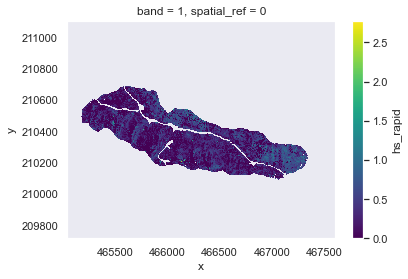

In [4]:
ds['hs_rapid'].plot()

## Constants and Calculations to Run before any other sections

In [5]:
colorpre='darkslategray'
colorpos='royalblue'
# colorpos='mediumvioletred'

colorsouth = 'darkorange'
colornorth = 'darkblue'

In [6]:
# First, just snow depth by DCE
# ds['hs_dce_ncalm_reclass_100'] = ds['hs_ncalm'].where(ds['dce_ncalm_reclass'] == 100) # forest
# ds['hs_dce_ncalm_reclass_200'] = ds['hs_ncalm'].where(ds['dce_ncalm_reclass'] == 200)
# ds['hs_dce_ncalm_reclass_300'] = ds['hs_ncalm'].where(ds['dce_ncalm_reclass'] == 300)
# ds['hs_dce_ncalm_reclass_400'] = ds['hs_ncalm'].where(ds['dce_ncalm_reclass'] == 400)
# ds['hs_dce_ncalm_reclass_500'] = ds['hs_ncalm'].where(ds['dce_ncalm_reclass'] == 500) # large gaps

ds['hs_dce_ncalm_reclass_100'] = ds['hs_ncalm'].where(ds['dce_snowoff_reclass'] == 100) # forest
ds['hs_dce_ncalm_reclass_200'] = ds['hs_ncalm'].where(ds['dce_snowoff_reclass'] == 200)
ds['hs_dce_ncalm_reclass_300'] = ds['hs_ncalm'].where(ds['dce_snowoff_reclass'] == 300)
ds['hs_dce_ncalm_reclass_400'] = ds['hs_ncalm'].where(ds['dce_snowoff_reclass'] == 400)
ds['hs_dce_ncalm_reclass_500'] = ds['hs_ncalm'].where(ds['dce_snowoff_reclass'] == 500) # large gaps

ds['hs_dce_rapid_reclass_100'] = ds['hs_rapid'].where(ds['dce_rapid_reclass'] == 100) # forest
ds['hs_dce_rapid_reclass_200'] = ds['hs_rapid'].where(ds['dce_rapid_reclass'] == 200)
ds['hs_dce_rapid_reclass_300'] = ds['hs_rapid'].where(ds['dce_rapid_reclass'] == 300)
ds['hs_dce_rapid_reclass_400'] = ds['hs_rapid'].where(ds['dce_rapid_reclass'] == 400)
ds['hs_dce_rapid_reclass_500'] = ds['hs_rapid'].where(ds['dce_rapid_reclass'] == 500) # large gaps

In [7]:
# First, just snow depth by DCE
ds['hs_giulia_dce_ncalm_reclass_100'] = ds['hs_ncalm'].where(ds['giulia_dce_snowoff_reclass'] == 100) # forest
ds['hs_giulia_dce_ncalm_reclass_200'] = ds['hs_ncalm'].where(ds['giulia_dce_snowoff_reclass'] == 200)
ds['hs_giulia_dce_ncalm_reclass_300'] = ds['hs_ncalm'].where(ds['giulia_dce_snowoff_reclass'] == 300)
ds['hs_giulia_dce_ncalm_reclass_400'] = ds['hs_ncalm'].where(ds['giulia_dce_snowoff_reclass'] == 400)
ds['hs_giulia_dce_ncalm_reclass_500'] = ds['hs_ncalm'].where(ds['giulia_dce_snowoff_reclass'] == 500) # large gaps

ds['hs_giulia_dce_rapid_reclass_100'] = ds['hs_rapid'].where(ds['giulia_dce_rapid_reclass'] == 100) # forest
ds['hs_giulia_dce_rapid_reclass_200'] = ds['hs_rapid'].where(ds['giulia_dce_rapid_reclass'] == 200)
ds['hs_giulia_dce_rapid_reclass_300'] = ds['hs_rapid'].where(ds['giulia_dce_rapid_reclass'] == 300)
ds['hs_giulia_dce_rapid_reclass_400'] = ds['hs_rapid'].where(ds['giulia_dce_rapid_reclass'] == 400)
ds['hs_giulia_dce_rapid_reclass_500'] = ds['hs_rapid'].where(ds['giulia_dce_rapid_reclass'] == 500) # large gaps

In [8]:
# and, the same thing, but by aspect (side of the ridge)
ds['hs_dce_rapid_reclass_100_n'] = ds['hs_dce_rapid_reclass_100'].where(ds['baf_ridge'] == -1)
ds['hs_dce_rapid_reclass_200_n'] = ds['hs_dce_rapid_reclass_200'].where(ds['baf_ridge'] == -1)
ds['hs_dce_rapid_reclass_300_n'] = ds['hs_dce_rapid_reclass_300'].where(ds['baf_ridge'] == -1)
ds['hs_dce_rapid_reclass_400_n'] = ds['hs_dce_rapid_reclass_400'].where(ds['baf_ridge'] == -1)
ds['hs_dce_rapid_reclass_500_n'] = ds['hs_dce_rapid_reclass_500'].where(ds['baf_ridge'] == -1)

ds['hs_dce_rapid_reclass_100_s'] = ds['hs_dce_rapid_reclass_100'].where(ds['baf_ridge'] ==  1)
ds['hs_dce_rapid_reclass_200_s'] = ds['hs_dce_rapid_reclass_200'].where(ds['baf_ridge'] ==  1)
ds['hs_dce_rapid_reclass_300_s'] = ds['hs_dce_rapid_reclass_300'].where(ds['baf_ridge'] ==  1)
ds['hs_dce_rapid_reclass_400_s'] = ds['hs_dce_rapid_reclass_400'].where(ds['baf_ridge'] ==  1)
ds['hs_dce_rapid_reclass_500_s'] = ds['hs_dce_rapid_reclass_500'].where(ds['baf_ridge'] ==  1)

# and, the same thing, but by aspect (determined by DAH)
ds['hs_dce_rapid_reclass_100_n_dah'] = ds['hs_dce_rapid_reclass_100'].where(ds['dah_binary'] == -1)
ds['hs_dce_rapid_reclass_200_n_dah'] = ds['hs_dce_rapid_reclass_200'].where(ds['dah_binary'] == -1)
ds['hs_dce_rapid_reclass_300_n_dah'] = ds['hs_dce_rapid_reclass_300'].where(ds['dah_binary'] == -1)
ds['hs_dce_rapid_reclass_400_n_dah'] = ds['hs_dce_rapid_reclass_400'].where(ds['dah_binary'] == -1)
ds['hs_dce_rapid_reclass_500_n_dah'] = ds['hs_dce_rapid_reclass_500'].where(ds['dah_binary'] == -1)

ds['hs_dce_rapid_reclass_100_s_dah'] = ds['hs_dce_rapid_reclass_100'].where(ds['dah_binary'] ==  1)
ds['hs_dce_rapid_reclass_200_s_dah'] = ds['hs_dce_rapid_reclass_200'].where(ds['dah_binary'] ==  1)
ds['hs_dce_rapid_reclass_300_s_dah'] = ds['hs_dce_rapid_reclass_300'].where(ds['dah_binary'] ==  1)
ds['hs_dce_rapid_reclass_400_s_dah'] = ds['hs_dce_rapid_reclass_400'].where(ds['dah_binary'] ==  1)
ds['hs_dce_rapid_reclass_500_s_dah'] = ds['hs_dce_rapid_reclass_500'].where(ds['dah_binary'] ==  1)

In [9]:
# and, the same thing, but by aspect (side of the ridge)
ds['hs_giulia_dce_rapid_reclass_100_n'] = ds['hs_giulia_dce_rapid_reclass_100'].where(ds['baf_ridge'] == -1)
ds['hs_giulia_dce_rapid_reclass_200_n'] = ds['hs_giulia_dce_rapid_reclass_200'].where(ds['baf_ridge'] == -1)
ds['hs_giulia_dce_rapid_reclass_300_n'] = ds['hs_giulia_dce_rapid_reclass_300'].where(ds['baf_ridge'] == -1)
ds['hs_giulia_dce_rapid_reclass_400_n'] = ds['hs_giulia_dce_rapid_reclass_400'].where(ds['baf_ridge'] == -1)
ds['hs_giulia_dce_rapid_reclass_500_n'] = ds['hs_giulia_dce_rapid_reclass_500'].where(ds['baf_ridge'] == -1)

ds['hs_giulia_dce_rapid_reclass_100_s'] = ds['hs_giulia_dce_rapid_reclass_100'].where(ds['baf_ridge'] ==  1)
ds['hs_giulia_dce_rapid_reclass_200_s'] = ds['hs_giulia_dce_rapid_reclass_200'].where(ds['baf_ridge'] ==  1)
ds['hs_giulia_dce_rapid_reclass_300_s'] = ds['hs_giulia_dce_rapid_reclass_300'].where(ds['baf_ridge'] ==  1)
ds['hs_giulia_dce_rapid_reclass_400_s'] = ds['hs_giulia_dce_rapid_reclass_400'].where(ds['baf_ridge'] ==  1)
ds['hs_giulia_dce_rapid_reclass_500_s'] = ds['hs_giulia_dce_rapid_reclass_500'].where(ds['baf_ridge'] ==  1)

# and, the same thing, but by aspect (determined by DAH)
ds['hs_giulia_dce_rapid_reclass_100_n_dah'] = ds['hs_giulia_dce_rapid_reclass_100'].where(ds['dah_binary'] == -1)
ds['hs_giulia_dce_rapid_reclass_200_n_dah'] = ds['hs_giulia_dce_rapid_reclass_200'].where(ds['dah_binary'] == -1)
ds['hs_giulia_dce_rapid_reclass_300_n_dah'] = ds['hs_giulia_dce_rapid_reclass_300'].where(ds['dah_binary'] == -1)
ds['hs_giulia_dce_rapid_reclass_400_n_dah'] = ds['hs_giulia_dce_rapid_reclass_400'].where(ds['dah_binary'] == -1)
ds['hs_giulia_dce_rapid_reclass_500_n_dah'] = ds['hs_giulia_dce_rapid_reclass_500'].where(ds['dah_binary'] == -1)

ds['hs_giulia_dce_rapid_reclass_100_s_dah'] = ds['hs_giulia_dce_rapid_reclass_100'].where(ds['dah_binary'] ==  1)
ds['hs_giulia_dce_rapid_reclass_200_s_dah'] = ds['hs_giulia_dce_rapid_reclass_200'].where(ds['dah_binary'] ==  1)
ds['hs_giulia_dce_rapid_reclass_300_s_dah'] = ds['hs_giulia_dce_rapid_reclass_300'].where(ds['dah_binary'] ==  1)
ds['hs_giulia_dce_rapid_reclass_400_s_dah'] = ds['hs_giulia_dce_rapid_reclass_400'].where(ds['dah_binary'] ==  1)
ds['hs_giulia_dce_rapid_reclass_500_s_dah'] = ds['hs_giulia_dce_rapid_reclass_500'].where(ds['dah_binary'] ==  1)

KeyboardInterrupt: 

## Side of ridge plots

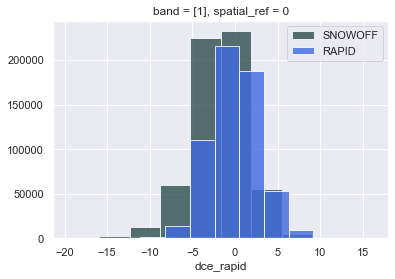

In [10]:
ds['dce_snowoff'].plot.hist(color=colorpre, alpha=0.8)
# ds['dce_ncalm'].plot.hist(color=colorpre, alpha=0.8)
ds['dce_rapid'].plot.hist(color=colorpos, alpha=0.8)
# plt.legend(['SNOWOFF','NCALM', 'RAPID'])
plt.legend(['SNOWOFF','RAPID'])
plt.show()

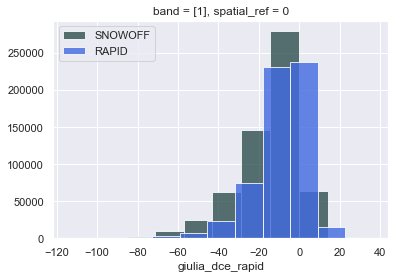

In [11]:
ds['giulia_dce_snowoff'].plot.hist(color=colorpre, alpha=0.8)
# ds['dce_ncalm'].plot.hist(color=colorpre, alpha=0.8)
ds['giulia_dce_rapid'].plot.hist(color=colorpos, alpha=0.8)
# plt.legend(['SNOWOFF','NCALM', 'RAPID'])
plt.legend(['SNOWOFF','RAPID'])
plt.show()

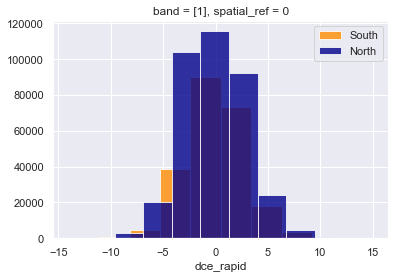

In [12]:
(ds['dce_rapid'].where(ds['baf_ridge'] == -1)).plot.hist(color=colorsouth, alpha=0.8)
(ds['dce_rapid'].where(ds['baf_ridge'] ==  1)).plot.hist(color=colornorth, alpha=0.8)
plt.legend(['South', 'North'])
plt.show()

Just put these two together in a nice plot to show in the powerpoint for later...

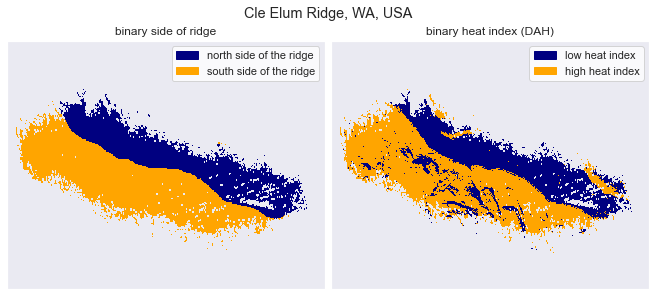

In [ ]:
# just to use later, which is labeled correctly 
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(9,4), constrained_layout = True)

fig.suptitle('Cle Elum Ridge, WA, USA')

# plot 1
ds['baf_ridge'].plot(ax=axes[0], vmin=0, vmax=1, cmap=ListedColormap(['navy','orange']), add_colorbar=False)  

# Add a legend for labels, to have different labels for each plot
legend_labels2 = {"navy": "north side of the ridge", 
                 "orange": "south side of the ridge"}                 

patches2 = [Patch(color=color, label=label)
           for color, label in legend_labels2.items()]

axes[0].legend(handles=patches2,
          bbox_to_anchor=(1, 1),
          facecolor="white")

# plot 2
ds['dah_binary'].plot(ax=axes[1], vmin=0, vmax=1, cmap=ListedColormap(['navy','orange']), add_colorbar=False)  

# Add a legend for labels, to have different labels for each plot
legend_labels2 = {"navy": "low heat index", 
                 "orange": "high heat index"}                 

patches2 = [Patch(color=color, label=label)
           for color, label in legend_labels2.items()]

axes[1].legend(handles=patches2,
          bbox_to_anchor=(1, 1),
          facecolor="white")

# labels
axes[0].set_title('binary side of ridge')
axes[1].set_title('binary heat index (DAH)')

axes[0].set_xlabel('');axes[0].set_ylabel('');axes[0].set_xticks([]);axes[0].set_yticks([])
axes[1].set_xlabel('');axes[1].set_ylabel('') ;axes[1].set_xticks([]);axes[1].set_yticks([])
plt.show()

## Snow Depth Box Plots, DCE Groups

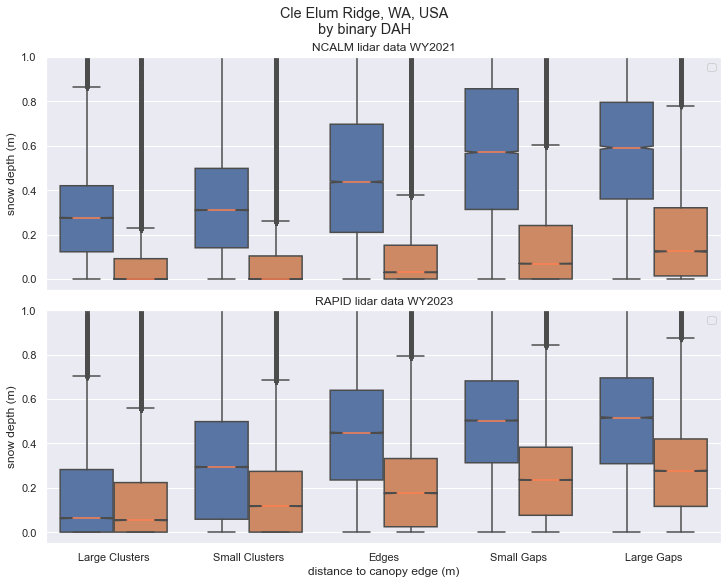

In [16]:
fig, axes = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(10,8), constrained_layout = True)

fig.suptitle('Cle Elum Ridge, WA, USA\nby binary DAH')

sns.boxplot(ax=axes[0], x=ds['dce_snowoff_reclass'].values.flatten(), y=ds['hs_ncalm'].values.flatten(), 
            hue=ds['dah_binary'].values.flatten(), notch=True, showcaps=True, medianprops={"color":"coral"})

sns.boxplot(ax=axes[1], x=ds['dce_rapid_reclass'].values.flatten(), y=ds['hs_rapid'].values.flatten(), 
            hue=ds['dah_binary'].values.flatten(), notch=True, showcaps=True, medianprops={"color":"coral"})

axes[1].set_xlabel('distance to canopy edge (m)')
axes[0].set_ylabel('snow depth (m)');axes[1].set_ylabel('snow depth (m)')
axes[0].set_title('NCALM lidar data WY2021')
axes[1].set_title('RAPID lidar data WY2023')
axes[0].set_xticks([0,1,2,3,4], ['Large Clusters','Small Clusters','Edges','Small Gaps', 'Large Gaps'])
axes[0].legend('')
axes[1].legend('')
# 100: large clusters, 200: small clusters, 300: edges, 400: small gaps, 500: large gaps 

# y limit 
# axes[0].set_ylim(-0.05, 1.5)
# axes[1].set_ylim(-0.05, 1.5)

axes[0].set_ylim(-0.05, 1)
axes[1].set_ylim(-0.05, 1)

plt.show()

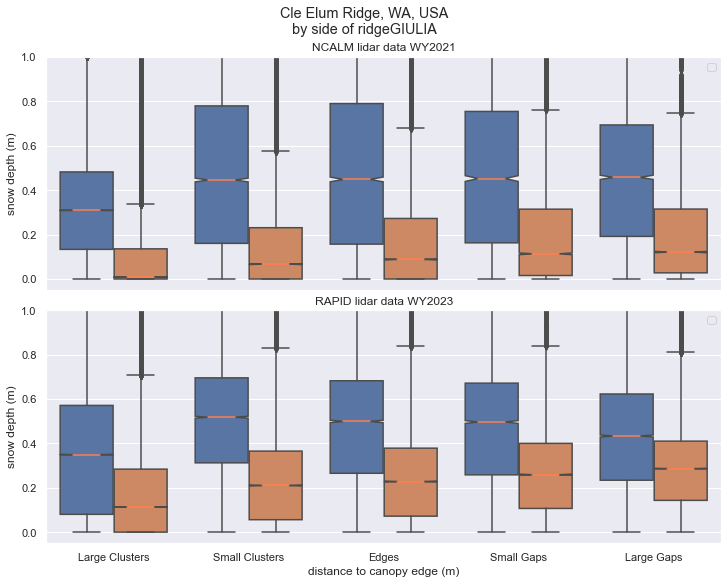

In [17]:
fig, axes = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(10,8), constrained_layout = True)

fig.suptitle('Cle Elum Ridge, WA, USA\nby side of ridge GIULIA')

sns.boxplot(ax=axes[0], x=ds['giulia_dce_snowoff_reclass'].values.flatten(), y=ds['hs_ncalm'].values.flatten(), 
            hue=ds['baf_ridge'].values.flatten(), notch=True, showcaps=True, medianprops={"color":"coral"})

sns.boxplot(ax=axes[1], x=ds['giulia_dce_rapid_reclass'].values.flatten(), y=ds['hs_rapid'].values.flatten(), 
            hue=ds['baf_ridge'].values.flatten(), notch=True, showcaps=True, medianprops={"color":"coral"})

axes[1].set_xlabel('distance to canopy edge (m)')
axes[0].set_ylabel('snow depth (m)');axes[1].set_ylabel('snow depth (m)')
axes[0].set_title('NCALM lidar data WY2021')
axes[1].set_title('RAPID lidar data WY2023')
axes[0].set_xticks([0,1,2,3,4], ['Large Clusters','Small Clusters','Edges','Small Gaps', 'Large Gaps'])
axes[0].legend('')
axes[1].legend('')
# 100: large clusters, 200: small clusters, 300: edges, 400: small gaps, 500: large gaps 

# y limit 
# axes[0].set_ylim(-0.05, 1.5)
# axes[1].set_ylim(-0.05, 1.5)

axes[0].set_ylim(-0.05, 1)
axes[1].set_ylim(-0.05, 1)

plt.show()

## Histograms before and after treatments DCE, and CHM

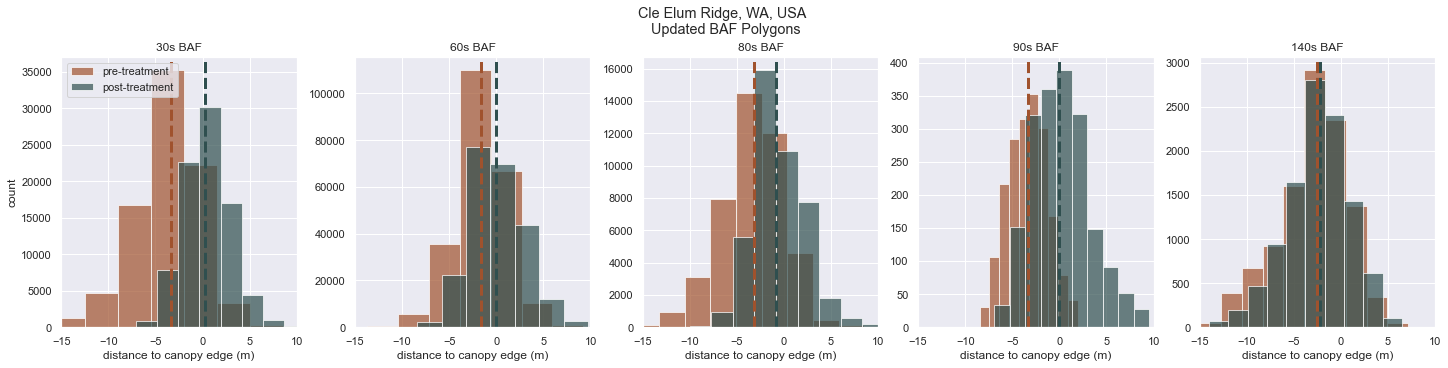

In [13]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(1, 5, sharex=True, sharey=False, figsize=(20,5), constrained_layout = True)
# colorpre='darkslategrey'
# colorpos='mediumaquamarine'
colorpre='sienna'
colorpos='darkslategrey'
alpha=0.7

# plots 
ds['dce_snowoff_baf_new_30s'].plot.hist(ax=axes[0],color=colorpre, label='pre-treatment', alpha=alpha)
ds['dce_rapid_baf_new_30s'].plot.hist(ax=axes[0],color=colorpos, label='post-treatment', alpha=alpha)

ds['dce_snowoff_baf_new_60s'].plot.hist(ax=axes[1],color=colorpre, alpha=alpha)
ds['dce_rapid_baf_new_60s'].plot.hist(ax=axes[1],color=colorpos, alpha=alpha)

ds['dce_snowoff_baf_new_80s'].plot.hist(ax=axes[2],color=colorpre, alpha=alpha)
ds['dce_rapid_baf_new_80s'].plot.hist(ax=axes[2],color=colorpos, alpha=alpha)

ds['dce_snowoff_baf_new_90s'].plot.hist(ax=axes[3],color=colorpre, alpha=alpha)
ds['dce_rapid_baf_new_90s'].plot.hist(ax=axes[3],color=colorpos, alpha=alpha)

ds['dce_snowoff_baf_new_100s'].plot.hist(ax=axes[4],color=colorpre, alpha=alpha)
ds['dce_rapid_baf_new_100s'].plot.hist(ax=axes[4],color=colorpos, alpha=alpha)

# plot the median line for each histogram 
axes[0].axvline(ds['dce_snowoff_baf_new_30s'].median(), color=colorpre, linestyle='dashed', linewidth=3)
axes[0].axvline(ds['dce_rapid_baf_new_30s'].median(), color=colorpos, linestyle='dashed', linewidth=3)

axes[1].axvline(ds['dce_snowoff_baf_new_60s'].median(), color=colorpre, linestyle='dashed', linewidth=3)
axes[1].axvline(ds['dce_rapid_baf_new_60s'].median(), color=colorpos, linestyle='dashed', linewidth=3)

axes[2].axvline(ds['dce_snowoff_baf_new_80s'].median(), color=colorpre, linestyle='dashed', linewidth=3)
axes[2].axvline(ds['dce_rapid_baf_new_80s'].median(), color=colorpos, linestyle='dashed', linewidth=3)

axes[3].axvline(ds['dce_snowoff_baf_new_90s'].median(), color=colorpre, linestyle='dashed', linewidth=3)
axes[3].axvline(ds['dce_rapid_baf_new_90s'].median(), color=colorpos, linestyle='dashed', linewidth=3)

axes[4].axvline(ds['dce_snowoff_baf_new_100s'].median(), color=colorpre, linestyle='dashed', linewidth=3)
axes[4].axvline(ds['dce_rapid_baf_new_100s'].median(), color=colorpos, linestyle='dashed', linewidth=3)

# labels
axes[0].set_title('30s BAF')
axes[1].set_title('60s BAF')
axes[2].set_title('80s BAF')
axes[3].set_title('90s BAF')
axes[4].set_title('140s BAF')

axes[0].set_xlabel('distance to canopy edge (m)')
axes[1].set_xlabel('distance to canopy edge (m)')
axes[2].set_xlabel('distance to canopy edge (m)')
axes[3].set_xlabel('distance to canopy edge (m)')
axes[4].set_xlabel('distance to canopy edge (m)')
axes[0].set_ylabel('count')
axes[1].set_ylabel('')
axes[2].set_ylabel('')
axes[3].set_ylabel('')
axes[4].set_ylabel('')

# adjust x limits
axes[0].set_xlim(-15,10)

plt.suptitle('Cle Elum Ridge, WA, USA \n Updated BAF Polygons')
axes[0].legend(loc='upper left')

plt.show()

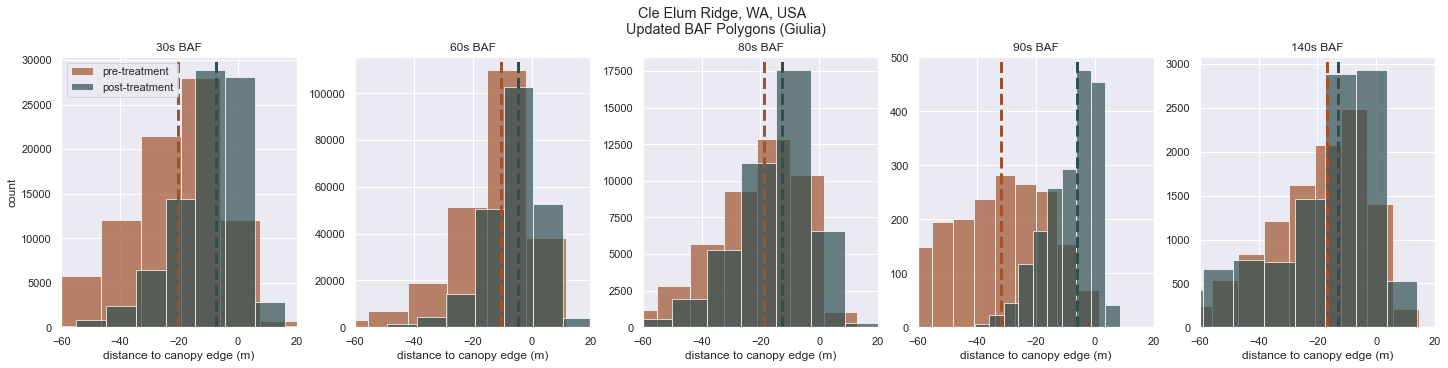

In [14]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(1, 5, sharex=True, sharey=False, figsize=(20,5), constrained_layout = True)
# colorpre='darkslategrey'
# colorpos='mediumaquamarine'
colorpre='sienna'
colorpos='darkslategrey'
alpha=0.7

# plots 
ds['giulia_dce_snowoff_baf_new_30s'].plot.hist(ax=axes[0],color=colorpre, label='pre-treatment', alpha=alpha)
ds['giulia_dce_rapid_baf_new_30s'].plot.hist(ax=axes[0],color=colorpos, label='post-treatment', alpha=alpha)

ds['giulia_dce_snowoff_baf_new_60s'].plot.hist(ax=axes[1],color=colorpre, alpha=alpha)
ds['giulia_dce_rapid_baf_new_60s'].plot.hist(ax=axes[1],color=colorpos, alpha=alpha)

ds['giulia_dce_snowoff_baf_new_80s'].plot.hist(ax=axes[2],color=colorpre, alpha=alpha)
ds['giulia_dce_rapid_baf_new_80s'].plot.hist(ax=axes[2],color=colorpos, alpha=alpha)

ds['giulia_dce_snowoff_baf_new_90s'].plot.hist(ax=axes[3],color=colorpre, alpha=alpha)
ds['giulia_dce_rapid_baf_new_90s'].plot.hist(ax=axes[3],color=colorpos, alpha=alpha)

ds['giulia_dce_snowoff_baf_new_100s'].plot.hist(ax=axes[4],color=colorpre, alpha=alpha)
ds['giulia_dce_rapid_baf_new_100s'].plot.hist(ax=axes[4],color=colorpos, alpha=alpha)

# plot the median line for each histogram 
axes[0].axvline(ds['giulia_dce_snowoff_baf_new_30s'].median(), color=colorpre, linestyle='dashed', linewidth=3)
axes[0].axvline(ds['giulia_dce_rapid_baf_new_30s'].median(), color=colorpos, linestyle='dashed', linewidth=3)

axes[1].axvline(ds['giulia_dce_snowoff_baf_new_60s'].median(), color=colorpre, linestyle='dashed', linewidth=3)
axes[1].axvline(ds['giulia_dce_rapid_baf_new_60s'].median(), color=colorpos, linestyle='dashed', linewidth=3)

axes[2].axvline(ds['giulia_dce_snowoff_baf_new_80s'].median(), color=colorpre, linestyle='dashed', linewidth=3)
axes[2].axvline(ds['giulia_dce_rapid_baf_new_80s'].median(), color=colorpos, linestyle='dashed', linewidth=3)

axes[3].axvline(ds['giulia_dce_snowoff_baf_new_90s'].median(), color=colorpre, linestyle='dashed', linewidth=3)
axes[3].axvline(ds['giulia_dce_rapid_baf_new_90s'].median(), color=colorpos, linestyle='dashed', linewidth=3)

axes[4].axvline(ds['giulia_dce_snowoff_baf_new_100s'].median(), color=colorpre, linestyle='dashed', linewidth=3)
axes[4].axvline(ds['giulia_dce_rapid_baf_new_100s'].median(), color=colorpos, linestyle='dashed', linewidth=3)

# labels
axes[0].set_title('30s BAF')
axes[1].set_title('60s BAF')
axes[2].set_title('80s BAF')
axes[3].set_title('90s BAF')
axes[4].set_title('140s BAF')

axes[0].set_xlabel('distance to canopy edge (m)')
axes[1].set_xlabel('distance to canopy edge (m)')
axes[2].set_xlabel('distance to canopy edge (m)')
axes[3].set_xlabel('distance to canopy edge (m)')
axes[4].set_xlabel('distance to canopy edge (m)')
axes[0].set_ylabel('count')
axes[1].set_ylabel('')
axes[2].set_ylabel('')
axes[3].set_ylabel('')
axes[4].set_ylabel('')

# adjust x limits
axes[0].set_xlim(-60,20)

plt.suptitle('Cle Elum Ridge, WA, USA \n Updated BAF Polygons (Giulia)')
axes[0].legend(loc='upper left')

plt.show()

Versions of the histograms that are binned by the DCE groups 

## Box Plots 

Text(0.5, 0, 'distance to canopy edge (m)')

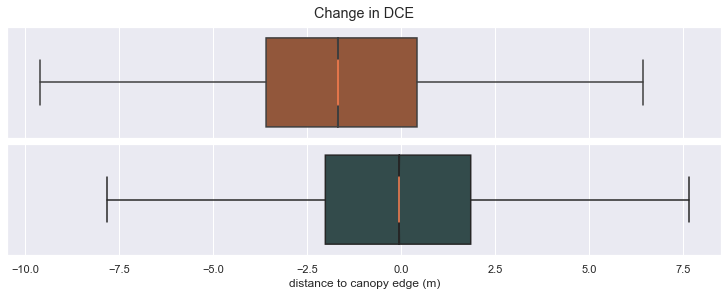

In [15]:
# adjust plot size 
fig, axes = plt.subplots(2, 1, sharex=True, sharey=False, figsize=(10,4), constrained_layout = True)
sns.boxplot(ax=axes[0], x = ds['dce_snowoff'].values.flatten(), color=colorpre, notch=True, showcaps=True, medianprops={"color":"coral"}, showfliers=False)
sns.boxplot(ax=axes[1], x = ds['dce_rapid'].values.flatten(), color=colorpos, notch=True, showcaps=True, medianprops={"color":"coral"}, showfliers=False)

plt.suptitle('Change in DCE')
# plt.ylabel('count')
plt.xlabel('distance to canopy edge (m)')

Text(0.5, 0, 'distance to canopy edge (m)')

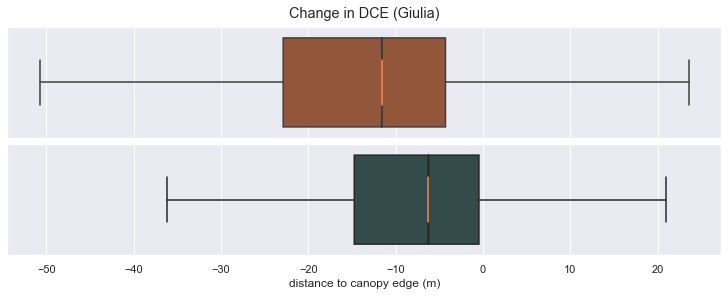

In [16]:
# adjust plot size 
fig, axes = plt.subplots(2, 1, sharex=True, sharey=False, figsize=(10,4), constrained_layout = True)
sns.boxplot(ax=axes[0], x = ds['giulia_dce_snowoff'].values.flatten(), color=colorpre, notch=True, showcaps=True, medianprops={"color":"coral"}, showfliers=False)
sns.boxplot(ax=axes[1], x = ds['giulia_dce_rapid'].values.flatten(), color=colorpos, notch=True, showcaps=True, medianprops={"color":"coral"}, showfliers=False)

plt.suptitle('Change in DCE (Giulia)')
# plt.ylabel('count')
plt.xlabel('distance to canopy edge (m)')

Text(0.5, 0, 'distance to canopy edge (m)')

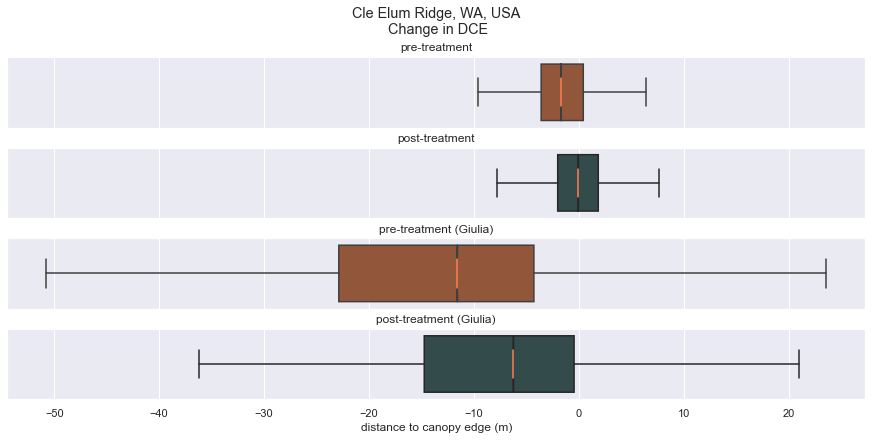

In [17]:
# adjust plot size 
fig, axes = plt.subplots(4, 1, sharex=True, sharey=False, figsize=(12,6), constrained_layout = True)
sns.boxplot(ax=axes[0], x = ds['dce_snowoff'].values.flatten(), color=colorpre, notch=True, showcaps=True, medianprops={"color":"coral"}, showfliers=False)
sns.boxplot(ax=axes[1], x = ds['dce_rapid'].values.flatten(), color=colorpos, notch=True, showcaps=True, medianprops={"color":"coral"}, showfliers=False)

sns.boxplot(ax=axes[2], x = ds['giulia_dce_snowoff'].values.flatten(), color=colorpre, notch=True, showcaps=True, medianprops={"color":"coral"}, showfliers=False)
sns.boxplot(ax=axes[3], x = ds['giulia_dce_rapid'].values.flatten(), color=colorpos, notch=True, showcaps=True, medianprops={"color":"coral"}, showfliers=False)

axes[0].set_title('pre-treatment')
axes[1].set_title('post-treatment')
axes[2].set_title('pre-treatment (Giulia)')
axes[3].set_title('post-treatment (Giulia)')

plt.suptitle('Cle Elum Ridge, WA, USA\n Change in DCE')
plt.xlabel('distance to canopy edge (m)')

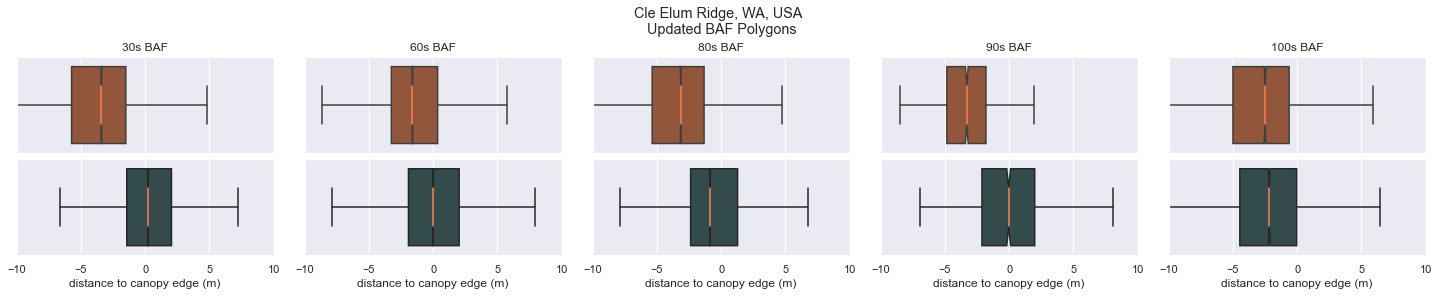

In [18]:
# plot of a histogram of all those variables 
fig, axes= plt.subplots(2, 5, sharex=True, sharey=True, figsize=(20,4), constrained_layout = True)
alpha=0.7

# plots 

sns.boxplot(ax=axes[0,0], x = ds['dce_snowoff_baf_new_30s'].values.flatten(), color=colorpre, notch=True, showcaps=True, medianprops={"color":"coral"}, fliersize=0)
sns.boxplot(ax=axes[1,0], x = ds['dce_rapid_baf_new_30s'].values.flatten(), color=colorpos, notch=True, showcaps=True, medianprops={"color":"coral"}, fliersize=0)

sns.boxplot(ax=axes[0,1], x = ds['dce_snowoff_baf_new_60s'].values.flatten(), color=colorpre, notch=True, showcaps=True, medianprops={"color":"coral"}, fliersize=0)
sns.boxplot(ax=axes[1,1], x = ds['dce_rapid_baf_new_60s'].values.flatten(), color=colorpos, notch=True, showcaps=True, medianprops={"color":"coral"}, fliersize=0)

sns.boxplot(ax=axes[0,2], x = ds['dce_snowoff_baf_new_80s'].values.flatten(), color=colorpre, notch=True, showcaps=True, medianprops={"color":"coral"}, fliersize=0)
sns.boxplot(ax=axes[1,2], x = ds['dce_rapid_baf_new_80s'].values.flatten(), color=colorpos, notch=True, showcaps=True, medianprops={"color":"coral"}, fliersize=0)

sns.boxplot(ax=axes[0,3], x = ds['dce_snowoff_baf_new_90s'].values.flatten(), color=colorpre, notch=True, showcaps=True, medianprops={"color":"coral"}, fliersize=0)
sns.boxplot(ax=axes[1,3], x = ds['dce_rapid_baf_new_90s'].values.flatten(), color=colorpos, notch=True, showcaps=True, medianprops={"color":"coral"}, fliersize=0)

sns.boxplot(ax=axes[0,4], x = ds['dce_snowoff_baf_new_100s'].values.flatten(), color=colorpre, notch=True, showcaps=True, medianprops={"color":"coral"}, fliersize=0)
sns.boxplot(ax=axes[1,4], x = ds['dce_rapid_baf_new_100s'].values.flatten(), color=colorpos, notch=True, showcaps=True, medianprops={"color":"coral"}, fliersize=0)

# labels
axes[0,0].set_title('30s BAF')
axes[0,1].set_title('60s BAF')
axes[0,2].set_title('80s BAF')
axes[0,3].set_title('90s BAF')
axes[0,4].set_title('100s BAF')

axes[1,0].set_xlabel('distance to canopy edge (m)')
axes[1,1].set_xlabel('distance to canopy edge (m)')
axes[1,2].set_xlabel('distance to canopy edge (m)')
axes[1,3].set_xlabel('distance to canopy edge (m)')
axes[1,4].set_xlabel('distance to canopy edge (m)')

# adjust x limits
axes[0,0].set_xlim(-10,10)

plt.suptitle('Cle Elum Ridge, WA, USA \n Updated BAF Polygons')
# axes[0,0].legend(loc='upper left')

plt.show()

Now, plot all the "post-treatment" BAF plots together to see how they compare 

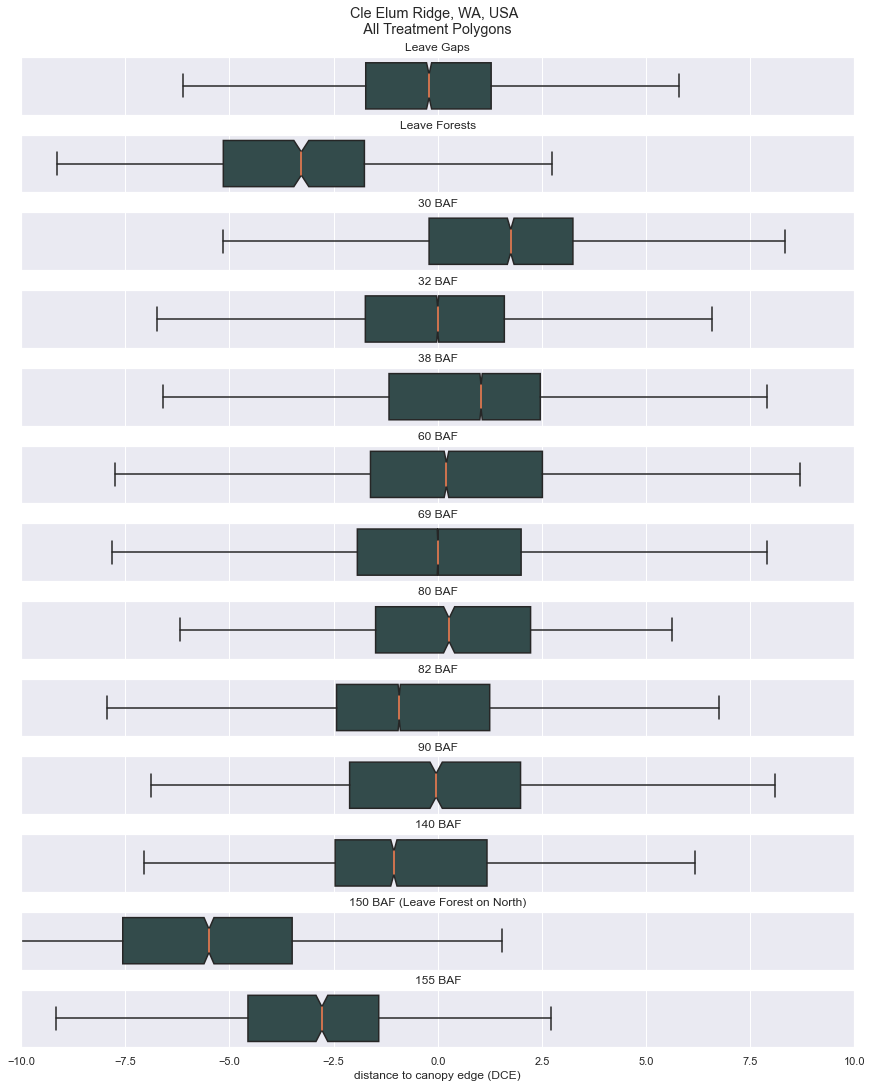

In [19]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(13, 1, sharex=True, sharey=False, figsize=(12,15), constrained_layout = True)
alpha=0.7

sns.boxplot(ax=axes[0], x = ds['dce_rapid_baf_new_1'].values.flatten(), color=colorpos, notch=True, showcaps=True, medianprops={"color":"coral"}, fliersize=0)
sns.boxplot(ax=axes[1], x = ds['dce_rapid_baf_new_2'].values.flatten(), color=colorpos, notch=True, showcaps=True, medianprops={"color":"coral"}, fliersize=0)
sns.boxplot(ax=axes[2], x = ds['dce_rapid_baf_new_30'].values.flatten(), color=colorpos, notch=True, showcaps=True, medianprops={"color":"coral"}, fliersize=0)

sns.boxplot(ax=axes[3], x = ds['dce_rapid_baf_new_32'].values.flatten(), color=colorpos, notch=True, showcaps=True, medianprops={"color":"coral"}, fliersize=0)
sns.boxplot(ax=axes[4], x = ds['dce_rapid_baf_new_38'].values.flatten(), color=colorpos, notch=True, showcaps=True, medianprops={"color":"coral"}, fliersize=0)

sns.boxplot(ax=axes[5], x = ds['dce_rapid_baf_new_60'].values.flatten(), color=colorpos, notch=True, showcaps=True, medianprops={"color":"coral"}, fliersize=0)
sns.boxplot(ax=axes[6], x = ds['dce_rapid_baf_new_69'].values.flatten(), color=colorpos, notch=True, showcaps=True, medianprops={"color":"coral"}, fliersize=0)
sns.boxplot(ax=axes[7], x = ds['dce_rapid_baf_new_80'].values.flatten(), color=colorpos, notch=True, showcaps=True, medianprops={"color":"coral"}, fliersize=0)
sns.boxplot(ax=axes[8], x = ds['dce_rapid_baf_new_82'].values.flatten(), color=colorpos, notch=True, showcaps=True, medianprops={"color":"coral"}, fliersize=0)

sns.boxplot(ax=axes[9], x = ds['dce_rapid_baf_new_90'].values.flatten(), color=colorpos, notch=True, showcaps=True, medianprops={"color":"coral"}, fliersize=0)
# sns.boxplot(ax=axes[10], x = ds['dce_rapid_baf_new_92'].values.flatten(), color=colorpos, notch=True, showcaps=True, medianprops={"color":"coral"}, fliersize=0)

sns.boxplot(ax=axes[10], x = ds['dce_rapid_baf_new_140'].values.flatten(), color=colorpos, notch=True, showcaps=True, medianprops={"color":"coral"}, fliersize=0)
sns.boxplot(ax=axes[11], x = ds['dce_rapid_baf_new_150'].values.flatten(), color=colorpos, notch=True, showcaps=True, medianprops={"color":"coral"}, fliersize=0)
sns.boxplot(ax=axes[12], x = ds['dce_rapid_baf_new_155'].values.flatten(), color=colorpos, notch=True, showcaps=True, medianprops={"color":"coral"}, fliersize=0)

# labels
axes[0].set_title('Leave Gaps')
axes[1].set_title('Leave Forests')
axes[2].set_title('30 BAF')
axes[3].set_title('32 BAF')
axes[4].set_title('38 BAF')
axes[5].set_title('60 BAF')
axes[6].set_title('69 BAF')
axes[7].set_title('80 BAF')
axes[8].set_title('82 BAF')
axes[9].set_title('90 BAF')
# axes[10].set_title('92 BAF')
axes[10].set_title('140 BAF')
axes[11].set_title('150 BAF (Leave Forest on North)')
axes[12].set_title('155 BAF')


axes[0].set_xlabel('')
axes[1].set_xlabel('')
axes[2].set_xlabel('')
axes[3].set_xlabel('')
axes[12].set_xlabel('distance to canopy edge (DCE)')

# adjust x limits
axes[0].set_xlim(-10,10)

plt.suptitle('Cle Elum Ridge, WA, USA \n All Treatment Polygons')

plt.show()

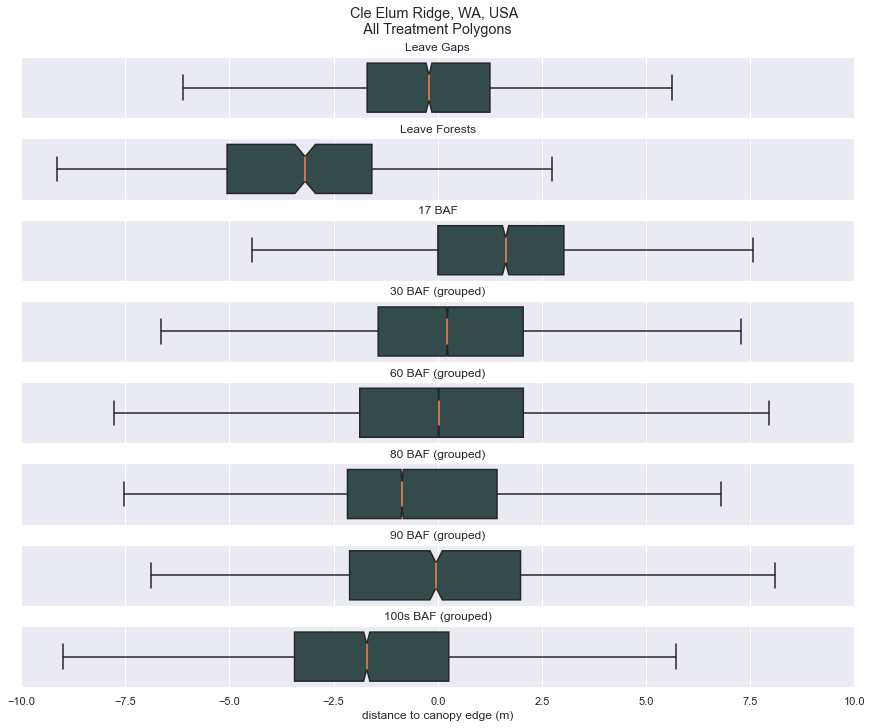

In [24]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(8, 1, sharex=True, sharey=False, figsize=(12,10), constrained_layout = True)
alpha=0.7

sns.boxplot(ax=axes[0], x = ds['dce_rapid_baf_new_1'].values.flatten(), color=colorpos, notch=True, showcaps=True, medianprops={"color":"coral"}, fliersize=0)
sns.boxplot(ax=axes[1], x = ds['dce_rapid_baf_new_2'].values.flatten(), color=colorpos, notch=True, showcaps=True, medianprops={"color":"coral"}, fliersize=0)
sns.boxplot(ax=axes[2], x = ds['dce_rapid_baf_new_17'].values.flatten(), color=colorpos, notch=True, showcaps=True, medianprops={"color":"coral"}, fliersize=0)
sns.boxplot(ax=axes[3], x = ds['dce_rapid_baf_new_30s'].values.flatten(), color=colorpos, notch=True, showcaps=True, medianprops={"color":"coral"}, fliersize=0)
sns.boxplot(ax=axes[4], x = ds['dce_rapid_baf_new_60s'].values.flatten(), color=colorpos, notch=True, showcaps=True, medianprops={"color":"coral"}, fliersize=0)
sns.boxplot(ax=axes[5], x = ds['dce_rapid_baf_new_80s'].values.flatten(), color=colorpos, notch=True, showcaps=True, medianprops={"color":"coral"}, fliersize=0)
sns.boxplot(ax=axes[6], x = ds['dce_rapid_baf_new_90s'].values.flatten(), color=colorpos, notch=True, showcaps=True, medianprops={"color":"coral"}, fliersize=0)
sns.boxplot(ax=axes[7], x = ds['dce_rapid_baf_new_100s'].values.flatten(), color=colorpos, notch=True, showcaps=True, medianprops={"color":"coral"}, fliersize=0)

# labels
axes[0].set_title('Leave Gaps')
axes[1].set_title('Leave Forests')
axes[2].set_title('17 BAF')
axes[3].set_title('30 BAF (grouped)')
axes[4].set_title('60 BAF (grouped)')
axes[5].set_title('80 BAF (grouped)')
axes[6].set_title('90 BAF (grouped)')
axes[7].set_title('100s BAF (grouped)')

axes[7].set_xlabel('distance to canopy edge (m)')

# adjust x limits
axes[0].set_xlim(-10,10)

plt.suptitle('Cle Elum Ridge, WA, USA \n All Treatment Polygons')

plt.show()

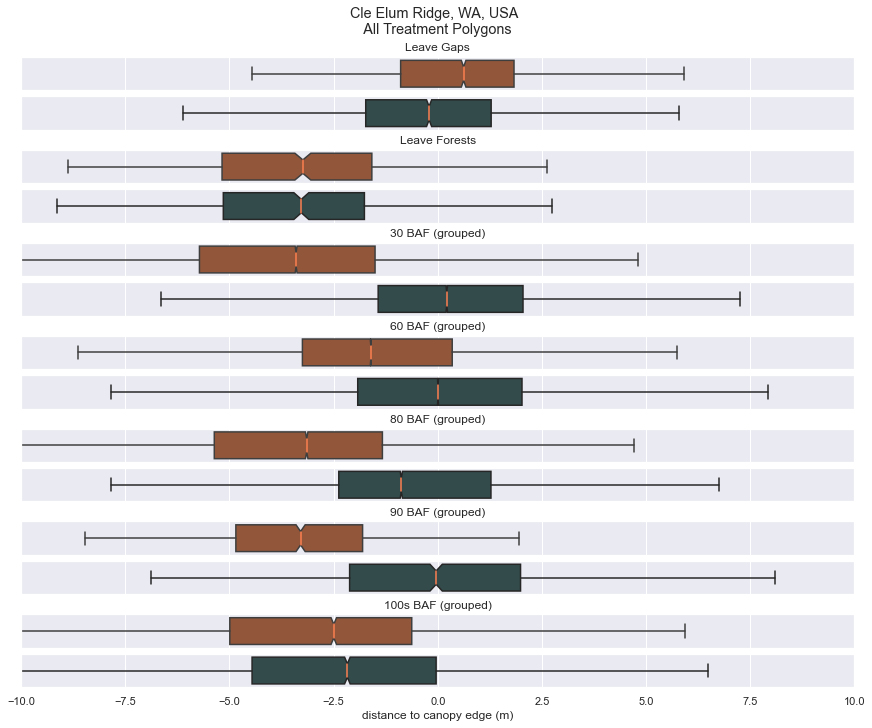

In [20]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(14, 1, sharex=True, sharey=False, figsize=(12,10), constrained_layout = True)
alpha=0.7

sns.boxplot(ax=axes[0], x = ds['dce_snowoff_baf_new_1'].values.flatten(), color=colorpre,  notch=True, showcaps=True, medianprops={"color":"coral"}, fliersize=0)
sns.boxplot(ax=axes[1], x = ds['dce_rapid_baf_new_1'].values.flatten(), color=colorpos,  notch=True, showcaps=True, medianprops={"color":"coral"}, fliersize=0)

sns.boxplot(ax=axes[2], x = ds['dce_snowoff_baf_new_2'].values.flatten(), color=colorpre,  notch=True, showcaps=True, medianprops={"color":"coral"}, fliersize=0)
sns.boxplot(ax=axes[3], x = ds['dce_rapid_baf_new_2'].values.flatten(), color=colorpos,  notch=True, showcaps=True, medianprops={"color":"coral"}, fliersize=0)

# sns.boxplot(ax=axes[2], x = ds['dce_rapid_baf_new_3'].values.flatten(), color=colorpos,  notch=True, showcaps=True, medianprops={"color":"coral"}, fliersize=0)
# sns.boxplot(ax=axes[2], x = ds['dce_rapid_baf_new_3'].values.flatten(), color=colorpos,  notch=True, showcaps=True, medianprops={"color":"coral"}, fliersize=0)

sns.boxplot(ax=axes[4], x = ds['dce_snowoff_baf_new_30s'].values.flatten(), color=colorpre,  notch=True, showcaps=True, medianprops={"color":"coral"}, fliersize=0)
sns.boxplot(ax=axes[5], x = ds['dce_rapid_baf_new_30s'].values.flatten(), color=colorpos,  notch=True, showcaps=True, medianprops={"color":"coral"}, fliersize=0)

sns.boxplot(ax=axes[6], x = ds['dce_snowoff_baf_new_60s'].values.flatten(), color=colorpre,  notch=True, showcaps=True, medianprops={"color":"coral"}, fliersize=0)
sns.boxplot(ax=axes[7], x = ds['dce_rapid_baf_new_60s'].values.flatten(), color=colorpos,  notch=True, showcaps=True, medianprops={"color":"coral"}, fliersize=0)

sns.boxplot(ax=axes[8], x = ds['dce_snowoff_baf_new_80s'].values.flatten(), color=colorpre,  notch=True, showcaps=True, medianprops={"color":"coral"}, fliersize=0)
sns.boxplot(ax=axes[9], x = ds['dce_rapid_baf_new_80s'].values.flatten(), color=colorpos,  notch=True, showcaps=True, medianprops={"color":"coral"}, fliersize=0)

sns.boxplot(ax=axes[10], x = ds['dce_snowoff_baf_new_90s'].values.flatten(), color=colorpre,  notch=True, showcaps=True, medianprops={"color":"coral"}, fliersize=0)
sns.boxplot(ax=axes[11], x = ds['dce_rapid_baf_new_90s'].values.flatten(), color=colorpos,  notch=True, showcaps=True, medianprops={"color":"coral"}, fliersize=0)

sns.boxplot(ax=axes[12], x = ds['dce_snowoff_baf_new_100s'].values.flatten(), color=colorpre,  notch=True, showcaps=True, medianprops={"color":"coral"}, fliersize=0)
sns.boxplot(ax=axes[13], x = ds['dce_rapid_baf_new_100s'].values.flatten(), color=colorpos,  notch=True, showcaps=True, medianprops={"color":"coral"}, fliersize=0)

# labels
axes[0].set_title('Leave Gaps')
axes[2].set_title('Leave Forests')
# axes[4].set_title('Beauty Cuts')
axes[4].set_title('30 BAF (grouped)')
axes[6].set_title('60 BAF (grouped)')
axes[8].set_title('80 BAF (grouped)')
axes[10].set_title('90 BAF (grouped)')
axes[12].set_title('100s BAF (grouped)')

axes[13].set_xlabel('distance to canopy edge (m)')

# adjust x limits
axes[0].set_xlim(-10,10)

plt.suptitle('Cle Elum Ridge, WA, USA \n All Treatment Polygons')

plt.show()

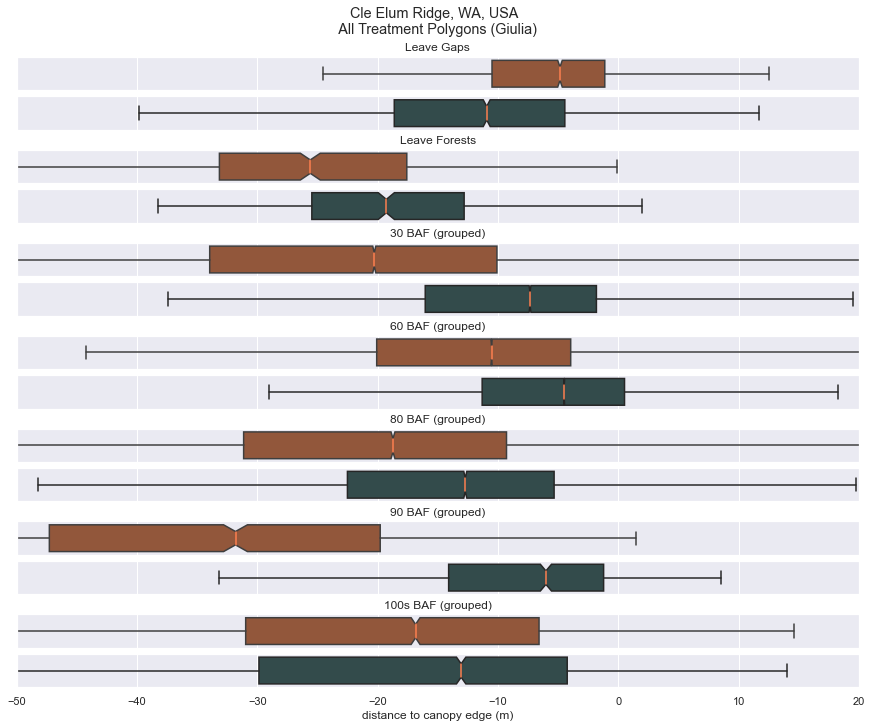

In [21]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(14, 1, sharex=True, sharey=False, figsize=(12,10), constrained_layout = True)
alpha=0.7

sns.boxplot(ax=axes[0], x = ds['giulia_dce_snowoff_baf_new_1'].values.flatten(), color=colorpre,  notch=True, showcaps=True, medianprops={"color":"coral"}, fliersize=0)
sns.boxplot(ax=axes[1], x = ds['giulia_dce_rapid_baf_new_1'].values.flatten(), color=colorpos,  notch=True, showcaps=True, medianprops={"color":"coral"}, fliersize=0)

sns.boxplot(ax=axes[2], x = ds['giulia_dce_snowoff_baf_new_2'].values.flatten(), color=colorpre,  notch=True, showcaps=True, medianprops={"color":"coral"}, fliersize=0)
sns.boxplot(ax=axes[3], x = ds['giulia_dce_rapid_baf_new_2'].values.flatten(), color=colorpos,  notch=True, showcaps=True, medianprops={"color":"coral"}, fliersize=0)

# sns.boxplot(ax=axes[2], x = ds['dce_rapid_baf_new_3'].values.flatten(), color=colorpos,  notch=True, showcaps=True, medianprops={"color":"coral"}, fliersize=0)
# sns.boxplot(ax=axes[2], x = ds['dce_rapid_baf_new_3'].values.flatten(), color=colorpos,  notch=True, showcaps=True, medianprops={"color":"coral"}, fliersize=0)

sns.boxplot(ax=axes[4], x = ds['giulia_dce_snowoff_baf_new_30s'].values.flatten(), color=colorpre,  notch=True, showcaps=True, medianprops={"color":"coral"}, fliersize=0)
sns.boxplot(ax=axes[5], x = ds['giulia_dce_rapid_baf_new_30s'].values.flatten(), color=colorpos,  notch=True, showcaps=True, medianprops={"color":"coral"}, fliersize=0)

sns.boxplot(ax=axes[6], x = ds['giulia_dce_snowoff_baf_new_60s'].values.flatten(), color=colorpre,  notch=True, showcaps=True, medianprops={"color":"coral"}, fliersize=0)
sns.boxplot(ax=axes[7], x = ds['giulia_dce_rapid_baf_new_60s'].values.flatten(), color=colorpos,  notch=True, showcaps=True, medianprops={"color":"coral"}, fliersize=0)

sns.boxplot(ax=axes[8], x = ds['giulia_dce_snowoff_baf_new_80s'].values.flatten(), color=colorpre,  notch=True, showcaps=True, medianprops={"color":"coral"}, fliersize=0)
sns.boxplot(ax=axes[9], x = ds['giulia_dce_rapid_baf_new_80s'].values.flatten(), color=colorpos,  notch=True, showcaps=True, medianprops={"color":"coral"}, fliersize=0)

sns.boxplot(ax=axes[10], x = ds['giulia_dce_snowoff_baf_new_90s'].values.flatten(), color=colorpre,  notch=True, showcaps=True, medianprops={"color":"coral"}, fliersize=0)
sns.boxplot(ax=axes[11], x = ds['giulia_dce_rapid_baf_new_90s'].values.flatten(), color=colorpos,  notch=True, showcaps=True, medianprops={"color":"coral"}, fliersize=0)

sns.boxplot(ax=axes[12], x = ds['giulia_dce_snowoff_baf_new_100s'].values.flatten(), color=colorpre,  notch=True, showcaps=True, medianprops={"color":"coral"}, fliersize=0)
sns.boxplot(ax=axes[13], x = ds['giulia_dce_rapid_baf_new_100s'].values.flatten(), color=colorpos,  notch=True, showcaps=True, medianprops={"color":"coral"}, fliersize=0)

# labels
axes[0].set_title('Leave Gaps')
axes[2].set_title('Leave Forests')
# axes[4].set_title('Beauty Cuts')
axes[4].set_title('30 BAF (grouped)')
axes[6].set_title('60 BAF (grouped)')
axes[8].set_title('80 BAF (grouped)')
axes[10].set_title('90 BAF (grouped)')
axes[12].set_title('100s BAF (grouped)')

axes[13].set_xlabel('distance to canopy edge (m)')

# adjust x limits
axes[0].set_xlim(-50,20)

plt.suptitle('Cle Elum Ridge, WA, USA \n All Treatment Polygons (Giulia)')

plt.show()

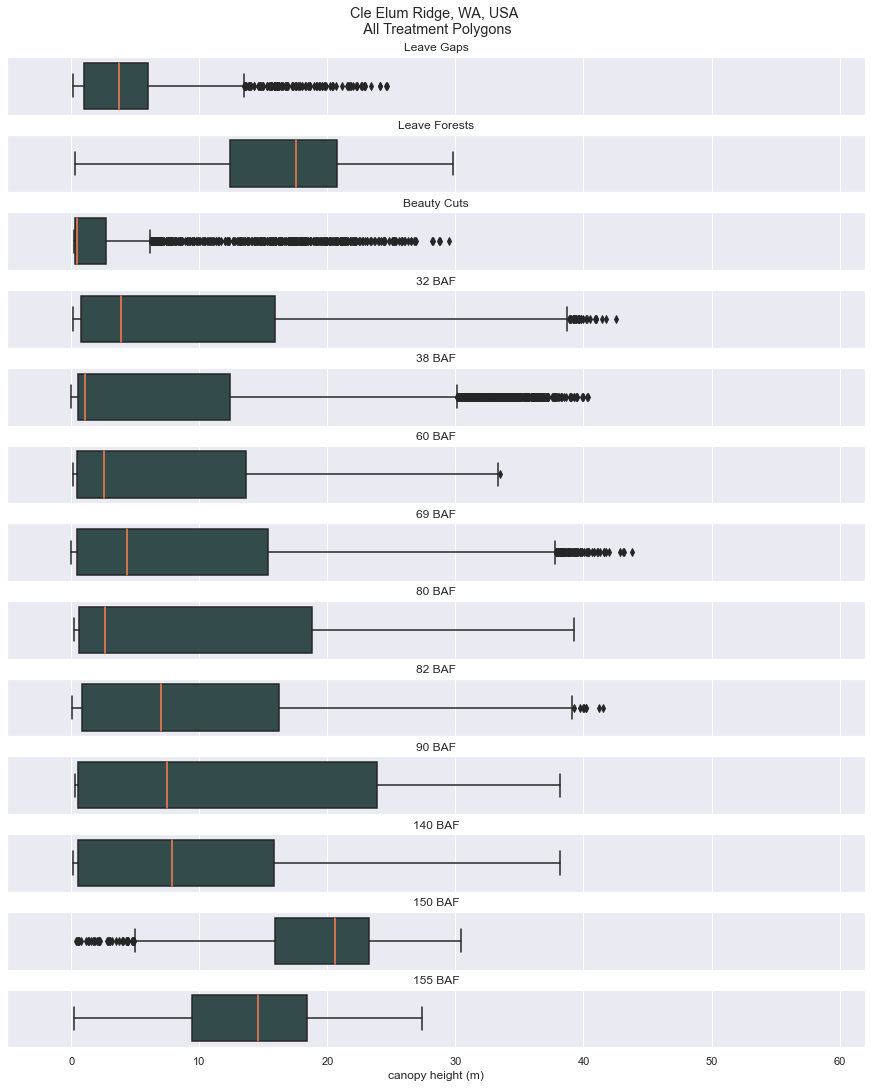

In [22]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(13, 1, sharex=True, sharey=False, figsize=(12,15), constrained_layout = True)
alpha=0.7

sns.boxplot(ax=axes[0], x = ds['chmws_rapid_baf_new_1'].values.flatten(), color=colorpos, medianprops={"color":"coral"})
sns.boxplot(ax=axes[1], x = ds['chmws_rapid_baf_new_2'].values.flatten(), color=colorpos, medianprops={"color":"coral"})
sns.boxplot(ax=axes[2], x = ds['chmws_rapid_baf_new_17'].values.flatten(), color=colorpos, medianprops={"color":"coral"})

sns.boxplot(ax=axes[3], x = ds['chmws_rapid_baf_new_32'].values.flatten(), color=colorpos, medianprops={"color":"coral"})
sns.boxplot(ax=axes[4], x = ds['chmws_rapid_baf_new_38'].values.flatten(), color=colorpos, medianprops={"color":"coral"})

sns.boxplot(ax=axes[5], x = ds['chmws_rapid_baf_new_60'].values.flatten(), color=colorpos, medianprops={"color":"coral"})
sns.boxplot(ax=axes[6], x = ds['chmws_rapid_baf_new_69'].values.flatten(), color=colorpos, medianprops={"color":"coral"})
sns.boxplot(ax=axes[7], x = ds['chmws_rapid_baf_new_80'].values.flatten(), color=colorpos, medianprops={"color":"coral"})
sns.boxplot(ax=axes[8], x = ds['chmws_rapid_baf_new_82'].values.flatten(), color=colorpos, medianprops={"color":"coral"})

sns.boxplot(ax=axes[9], x = ds['chmws_rapid_baf_new_90'].values.flatten(), color=colorpos, medianprops={"color":"coral"})
# sns.boxplot(ax=axes[10], x = ds['chmws_rapid_baf_new_92'].values.flatten(), color=colorpos, medianprops={"color":"coral"})

sns.boxplot(ax=axes[10], x = ds['chmws_rapid_baf_new_140'].values.flatten(), color=colorpos, medianprops={"color":"coral"})
sns.boxplot(ax=axes[11], x = ds['chmws_rapid_baf_new_150'].values.flatten(), color=colorpos, medianprops={"color":"coral"})
sns.boxplot(ax=axes[12], x = ds['chmws_rapid_baf_new_155'].values.flatten(), color=colorpos, medianprops={"color":"coral"})

# labels
axes[0].set_title('Leave Gaps')
axes[1].set_title('Leave Forests')
axes[2].set_title('Beauty Cuts')
axes[3].set_title('32 BAF')
axes[4].set_title('38 BAF')
axes[5].set_title('60 BAF')
axes[6].set_title('69 BAF')
axes[7].set_title('80 BAF')
axes[8].set_title('82 BAF')
axes[9].set_title('90 BAF')
# axes[10].set_title('92 BAF')
axes[10].set_title('140 BAF')
axes[11].set_title('150 BAF')
axes[12].set_title('155 BAF')


axes[0].set_xlabel('')
axes[1].set_xlabel('')
axes[2].set_xlabel('')
axes[3].set_xlabel('')
axes[12].set_xlabel('canopy height (m)')

# adjust x limits
axes[0].set_xlim(-5,62)

plt.suptitle('Cle Elum Ridge, WA, USA \n All Treatment Polygons')

plt.show()

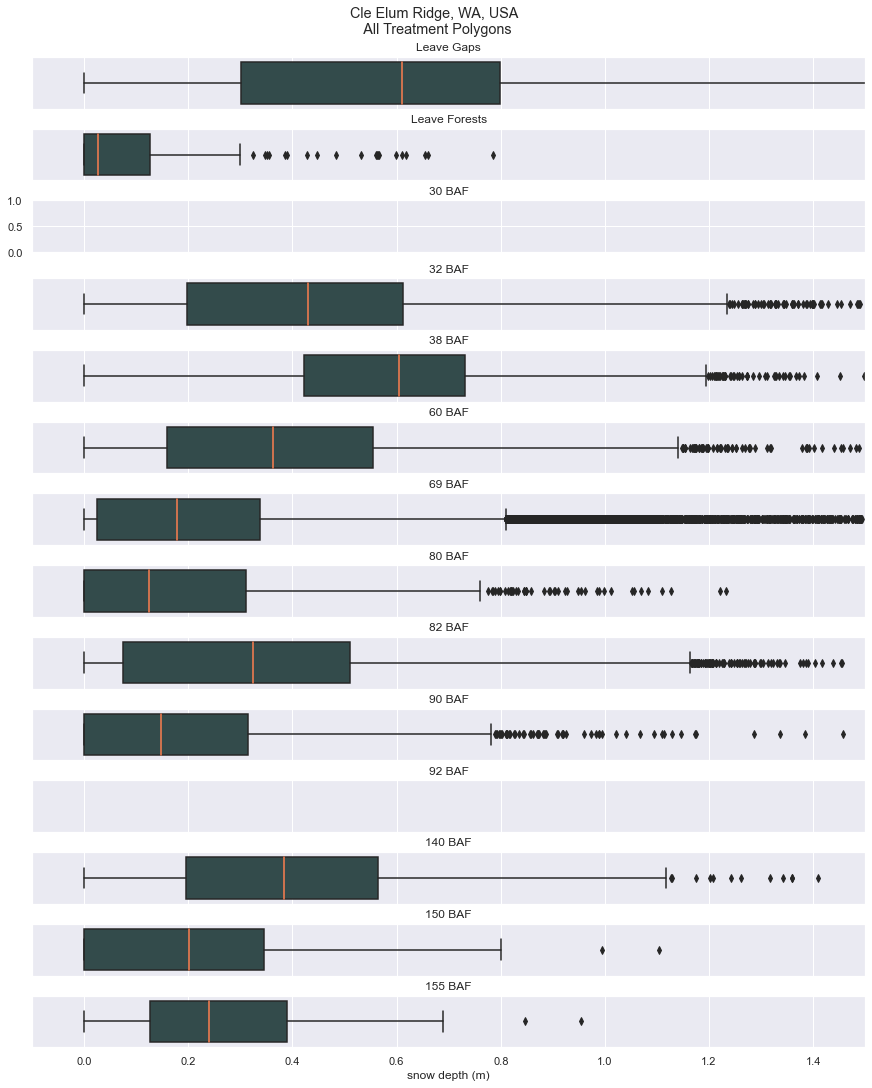

In [30]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(14, 1, sharex=True, sharey=False, figsize=(12,15), constrained_layout = True)
alpha=0.7

sns.boxplot(ax=axes[0], x = ds['hs_rapid_baf_new_1'].values.flatten(), color=colorpos, medianprops={"color":"coral"})
sns.boxplot(ax=axes[1], x = ds['hs_rapid_baf_new_2'].values.flatten(), color=colorpos, medianprops={"color":"coral"})
# sns.boxplot(ax=axes[2], x = ds['hs_rapid_baf_new_30'].values.flatten(), color=colorpos, medianprops={"color":"coral"})

sns.boxplot(ax=axes[3], x = ds['hs_rapid_baf_new_32'].values.flatten(), color=colorpos, medianprops={"color":"coral"})
sns.boxplot(ax=axes[4], x = ds['hs_rapid_baf_new_38'].values.flatten(), color=colorpos, medianprops={"color":"coral"})

sns.boxplot(ax=axes[5], x = ds['hs_rapid_baf_new_60'].values.flatten(), color=colorpos, medianprops={"color":"coral"})
sns.boxplot(ax=axes[6], x = ds['hs_rapid_baf_new_69'].values.flatten(), color=colorpos, medianprops={"color":"coral"})
sns.boxplot(ax=axes[7], x = ds['hs_rapid_baf_new_80'].values.flatten(), color=colorpos, medianprops={"color":"coral"})
sns.boxplot(ax=axes[8], x = ds['hs_rapid_baf_new_82'].values.flatten(), color=colorpos, medianprops={"color":"coral"})

sns.boxplot(ax=axes[9], x = ds['hs_rapid_baf_new_90'].values.flatten(), color=colorpos, medianprops={"color":"coral"})
sns.boxplot(ax=axes[10], x = ds['hs_rapid_baf_new_92'].values.flatten(), color=colorpos, medianprops={"color":"coral"})

sns.boxplot(ax=axes[11], x = ds['hs_rapid_baf_new_140'].values.flatten(), color=colorpos, medianprops={"color":"coral"})
sns.boxplot(ax=axes[12], x = ds['hs_rapid_baf_new_150'].values.flatten(), color=colorpos, medianprops={"color":"coral"})
sns.boxplot(ax=axes[13], x = ds['hs_rapid_baf_new_155'].values.flatten(), color=colorpos, medianprops={"color":"coral"})

# labels
axes[0].set_title('Leave Gaps')
axes[1].set_title('Leave Forests')
axes[2].set_title('30 BAF')
axes[3].set_title('32 BAF')
axes[4].set_title('38 BAF')
axes[5].set_title('60 BAF')
axes[6].set_title('69 BAF')
axes[7].set_title('80 BAF')
axes[8].set_title('82 BAF')
axes[9].set_title('90 BAF')
axes[10].set_title('92 BAF')
axes[11].set_title('140 BAF')
axes[12].set_title('150 BAF')
axes[13].set_title('155 BAF')


axes[0].set_xlabel('')
axes[1].set_xlabel('')
axes[2].set_xlabel('')
axes[3].set_xlabel('')
axes[13].set_xlabel('snow depth (m)')

# adjust x limits
axes[0].set_xlim(-0.1,1.5)

plt.suptitle('Cle Elum Ridge, WA, USA \n All Treatment Polygons')

plt.show()

Same thing, but by north and south aspects too...

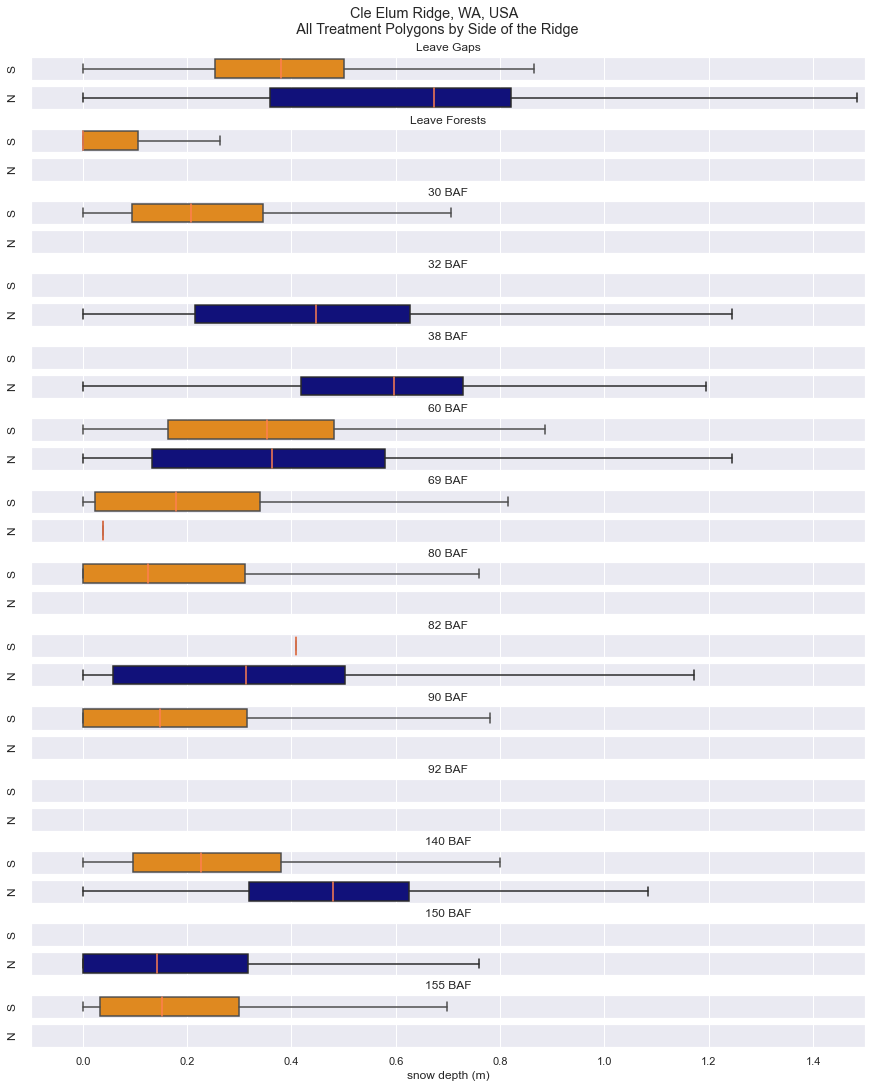

In [23]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(28, 1, sharex=True, sharey=False, figsize=(12,15), constrained_layout = True)
alpha=0.7

sns.boxplot(ax=axes[0], x = ds['hs_rapid_baf_new_1_s'].values.flatten(), color=colorsouth, medianprops={"color":"coral"}, fliersize=0)
sns.boxplot(ax=axes[1], x = ds['hs_rapid_baf_new_1_n'].values.flatten(), color=colornorth, medianprops={"color":"coral"}, fliersize=0)

sns.boxplot(ax=axes[2], x = ds['hs_rapid_baf_new_2_s'].values.flatten(), color=colorsouth, medianprops={"color":"coral"}, fliersize=0)
sns.boxplot(ax=axes[3], x = ds['hs_rapid_baf_new_2_n'].values.flatten(), color=colornorth, medianprops={"color":"coral"}, fliersize=0)

sns.boxplot(ax=axes[4], x = ds['hs_rapid_baf_new_30_s'].values.flatten(), color=colorsouth, medianprops={"color":"coral"}, fliersize=0)
sns.boxplot(ax=axes[5], x = ds['hs_rapid_baf_new_30_n'].values.flatten(), color=colornorth, medianprops={"color":"coral"}, fliersize=0)

sns.boxplot(ax=axes[6], x = ds['hs_rapid_baf_new_32_s'].values.flatten(), color=colorsouth, medianprops={"color":"coral"}, fliersize=0)
sns.boxplot(ax=axes[7], x = ds['hs_rapid_baf_new_32_n'].values.flatten(), color=colornorth, medianprops={"color":"coral"}, fliersize=0)

sns.boxplot(ax=axes[8], x = ds['hs_rapid_baf_new_38_s'].values.flatten(), color=colorsouth, medianprops={"color":"coral"}, fliersize=0)
sns.boxplot(ax=axes[9], x = ds['hs_rapid_baf_new_38_n'].values.flatten(), color=colornorth, medianprops={"color":"coral"}, fliersize=0)

sns.boxplot(ax=axes[10], x = ds['hs_rapid_baf_new_60_s'].values.flatten(), color=colorsouth, medianprops={"color":"coral"}, fliersize=0)
sns.boxplot(ax=axes[11], x = ds['hs_rapid_baf_new_60_n'].values.flatten(), color=colornorth, medianprops={"color":"coral"}, fliersize=0)

sns.boxplot(ax=axes[12], x = ds['hs_rapid_baf_new_69_s'].values.flatten(), color=colorsouth, medianprops={"color":"coral"}, fliersize=0)
sns.boxplot(ax=axes[13], x = ds['hs_rapid_baf_new_69_n'].values.flatten(), color=colornorth, medianprops={"color":"coral"}, fliersize=0)

sns.boxplot(ax=axes[14], x = ds['hs_rapid_baf_new_80_s'].values.flatten(), color=colorsouth, medianprops={"color":"coral"}, fliersize=0)
sns.boxplot(ax=axes[15], x = ds['hs_rapid_baf_new_80_n'].values.flatten(), color=colornorth, medianprops={"color":"coral"}, fliersize=0)

sns.boxplot(ax=axes[16], x = ds['hs_rapid_baf_new_82_s'].values.flatten(), color=colorsouth, medianprops={"color":"coral"}, fliersize=0)
sns.boxplot(ax=axes[17], x = ds['hs_rapid_baf_new_82_n'].values.flatten(), color=colornorth, medianprops={"color":"coral"}, fliersize=0)

sns.boxplot(ax=axes[18], x = ds['hs_rapid_baf_new_90_s'].values.flatten(), color=colorsouth, medianprops={"color":"coral"}, fliersize=0)
sns.boxplot(ax=axes[19], x = ds['hs_rapid_baf_new_90_n'].values.flatten(), color=colornorth, medianprops={"color":"coral"}, fliersize=0)

sns.boxplot(ax=axes[20], x = ds['hs_rapid_baf_new_92_s'].values.flatten(), color=colorsouth, medianprops={"color":"coral"}, fliersize=0)
sns.boxplot(ax=axes[21], x = ds['hs_rapid_baf_new_92_n'].values.flatten(), color=colornorth, medianprops={"color":"coral"}, fliersize=0)

sns.boxplot(ax=axes[22], x = ds['hs_rapid_baf_new_140_s'].values.flatten(), color=colorsouth, medianprops={"color":"coral"}, fliersize=0)
sns.boxplot(ax=axes[23], x = ds['hs_rapid_baf_new_140_n'].values.flatten(), color=colornorth, medianprops={"color":"coral"}, fliersize=0)

sns.boxplot(ax=axes[24], x = ds['hs_rapid_baf_new_150_s'].values.flatten(), color=colorsouth, medianprops={"color":"coral"}, fliersize=0)
sns.boxplot(ax=axes[25], x = ds['hs_rapid_baf_new_150_n'].values.flatten(), color=colornorth, medianprops={"color":"coral"}, fliersize=0)

sns.boxplot(ax=axes[26], x = ds['hs_rapid_baf_new_155_s'].values.flatten(), color=colorsouth, medianprops={"color":"coral"}, fliersize=0)
sns.boxplot(ax=axes[27], x = ds['hs_rapid_baf_new_155_n'].values.flatten(), color=colornorth, medianprops={"color":"coral"}, fliersize=0)

# labels
axes[0].set_title('Leave Gaps')
axes[2].set_title('Leave Forests')
axes[4].set_title('30 BAF')
axes[6].set_title('32 BAF')
axes[8].set_title('38 BAF')
axes[10].set_title('60 BAF')
axes[12].set_title('69 BAF')
axes[14].set_title('80 BAF')
axes[16].set_title('82 BAF')
axes[18].set_title('90 BAF')
axes[20].set_title('92 BAF')
axes[22].set_title('140 BAF')
axes[24].set_title('150 BAF')
axes[26].set_title('155 BAF')

axes[27].set_xlabel('snow depth (m)')

[axes[i].set_ylabel('S') for i in [0,2,4,6,8,10,12,14,16,18,20,22,24,26]]
[axes[i].set_ylabel('N') for i in [1,3,5,7,9,11,13,15,17,19,21,23,25,27]]

# adjust x limits
axes[0].set_xlim(-0.1,1.5)

plt.suptitle('Cle Elum Ridge, WA, USA \n All Treatment Polygons by Side of the Ridge')

plt.show()

Clean that up, removing the 92, and putting the 150 with the leave forest 

KeyError: 'hs_rapid_baf_new_3_s'

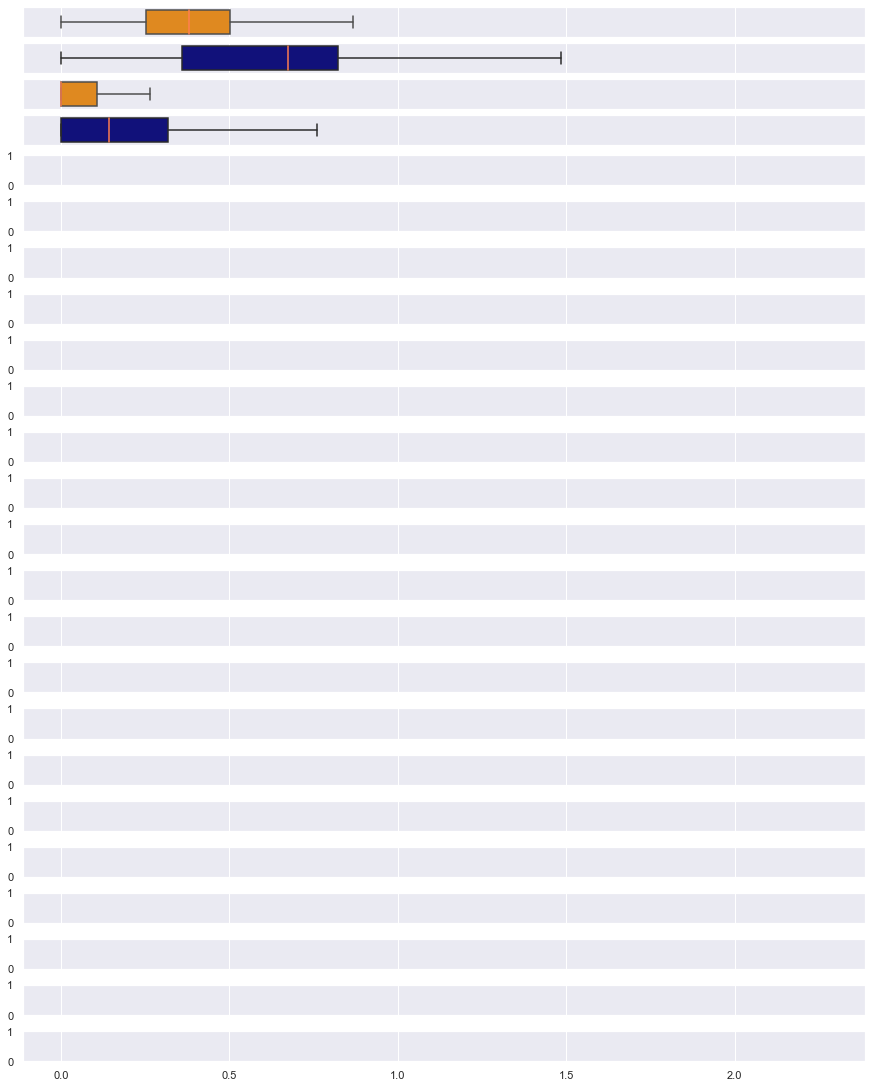

In [24]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(24, 1, sharex=True, sharey=False, figsize=(12,15), constrained_layout = True)
alpha=0.7

sns.boxplot(ax=axes[0], x = ds['hs_rapid_baf_new_1_s'].values.flatten(), color=colorsouth, medianprops={"color":"coral"}, fliersize=0)
sns.boxplot(ax=axes[1], x = ds['hs_rapid_baf_new_1_n'].values.flatten(), color=colornorth, medianprops={"color":"coral"}, fliersize=0)

# putting the leave forest and the 150 together here
sns.boxplot(ax=axes[2], x = ds['hs_rapid_baf_new_2_s'].values.flatten(), color=colorsouth, medianprops={"color":"coral"}, fliersize=0)
sns.boxplot(ax=axes[3], x = ds['hs_rapid_baf_new_2_n'].values.flatten(), color=colornorth, medianprops={"color":"coral"}, fliersize=0)

sns.boxplot(ax=axes[2], x = ds['hs_rapid_baf_new_150_s'].values.flatten(), color=colorsouth, medianprops={"color":"coral"}, fliersize=0)
sns.boxplot(ax=axes[3], x = ds['hs_rapid_baf_new_150_n'].values.flatten(), color=colornorth, medianprops={"color":"coral"}, fliersize=0)


sns.boxplot(ax=axes[4], x = ds['hs_rapid_baf_new_3_s'].values.flatten(), color=colorsouth, medianprops={"color":"coral"}, fliersize=0)
sns.boxplot(ax=axes[5], x = ds['hs_rapid_baf_new_3_n'].values.flatten(), color=colornorth, medianprops={"color":"coral"}, fliersize=0)

sns.boxplot(ax=axes[6], x = ds['hs_rapid_baf_new_32_s'].values.flatten(), color=colorsouth, medianprops={"color":"coral"}, fliersize=0)
sns.boxplot(ax=axes[7], x = ds['hs_rapid_baf_new_32_n'].values.flatten(), color=colornorth, medianprops={"color":"coral"}, fliersize=0)

sns.boxplot(ax=axes[8], x = ds['hs_rapid_baf_new_38_s'].values.flatten(), color=colorsouth, medianprops={"color":"coral"}, fliersize=0)
sns.boxplot(ax=axes[9], x = ds['hs_rapid_baf_new_38_n'].values.flatten(), color=colornorth, medianprops={"color":"coral"}, fliersize=0)

sns.boxplot(ax=axes[10], x = ds['hs_rapid_baf_new_60_s'].values.flatten(), color=colorsouth, medianprops={"color":"coral"}, fliersize=0)
sns.boxplot(ax=axes[11], x = ds['hs_rapid_baf_new_60_n'].values.flatten(), color=colornorth, medianprops={"color":"coral"}, fliersize=0)

sns.boxplot(ax=axes[12], x = ds['hs_rapid_baf_new_69_s'].values.flatten(), color=colorsouth, medianprops={"color":"coral"}, fliersize=0)
sns.boxplot(ax=axes[13], x = ds['hs_rapid_baf_new_69_n'].values.flatten(), color=colornorth, medianprops={"color":"coral"}, fliersize=0)

sns.boxplot(ax=axes[14], x = ds['hs_rapid_baf_new_80_s'].values.flatten(), color=colorsouth, medianprops={"color":"coral"}, fliersize=0)
sns.boxplot(ax=axes[15], x = ds['hs_rapid_baf_new_80_n'].values.flatten(), color=colornorth, medianprops={"color":"coral"}, fliersize=0)

sns.boxplot(ax=axes[16], x = ds['hs_rapid_baf_new_82_s'].values.flatten(), color=colorsouth, medianprops={"color":"coral"}, fliersize=0)
sns.boxplot(ax=axes[17], x = ds['hs_rapid_baf_new_82_n'].values.flatten(), color=colornorth, medianprops={"color":"coral"}, fliersize=0)

sns.boxplot(ax=axes[18], x = ds['hs_rapid_baf_new_90_s'].values.flatten(), color=colorsouth, medianprops={"color":"coral"}, fliersize=0)
sns.boxplot(ax=axes[19], x = ds['hs_rapid_baf_new_90_n'].values.flatten(), color=colornorth, medianprops={"color":"coral"}, fliersize=0)

# sns.boxplot(ax=axes[20], x = ds['hs_rapid_baf_new_92_s'].values.flatten(), color=colorsouth, medianprops={"color":"coral"}, fliersize=0)
# sns.boxplot(ax=axes[21], x = ds['hs_rapid_baf_new_92_n'].values.flatten(), color=colornorth, medianprops={"color":"coral"}, fliersize=0)

sns.boxplot(ax=axes[20], x = ds['hs_rapid_baf_new_140_s'].values.flatten(), color=colorsouth, medianprops={"color":"coral"}, fliersize=0)
sns.boxplot(ax=axes[21], x = ds['hs_rapid_baf_new_140_n'].values.flatten(), color=colornorth, medianprops={"color":"coral"}, fliersize=0)

# sns.boxplot(ax=axes[22], x = ds['hs_rapid_baf_new_150_s'].values.flatten(), color=colorsouth, medianprops={"color":"coral"}, fliersize=0)
# sns.boxplot(ax=axes[23], x = ds['hs_rapid_baf_new_150_n'].values.flatten(), color=colornorth, medianprops={"color":"coral"}, fliersize=0)

sns.boxplot(ax=axes[22], x = ds['hs_rapid_baf_new_155_s'].values.flatten(), color=colorsouth, medianprops={"color":"coral"}, fliersize=0)
sns.boxplot(ax=axes[23], x = ds['hs_rapid_baf_new_155_n'].values.flatten(), color=colornorth, medianprops={"color":"coral"}, fliersize=0)

# labels
axes[0].set_title('Leave Gaps')
axes[2].set_title('Leave Forests (150 on north side)')
axes[4].set_title('Beauty Cuts')
axes[6].set_title('32 BAF')
axes[8].set_title('38 BAF')
axes[10].set_title('60 BAF')
axes[12].set_title('69 BAF')
axes[14].set_title('80 BAF')
axes[16].set_title('82 BAF')
axes[18].set_title('90 BAF')
# axes[20].set_title('92 BAF')
axes[20].set_title('140 BAF')
# axes[22].set_title('150 BAF')
axes[22].set_title('155 BAF')

axes[23].set_xlabel('snow depth (m)')

[axes[i].set_ylabel('S') for i in [0,2,4,6,8,10,12,14,16,18,20,22,]]
[axes[i].set_ylabel('N') for i in [1,3,5,7,9,11,13,15,17,19,21,23,]]

# adjust x limits
axes[0].set_xlim(-0.1,1.5)

plt.suptitle('Cle Elum Ridge, WA, USA \n All Treatment Polygons by Side of the Ridge')

plt.show()

Lets look at this a different way....\
put all the south together and all the north together... 

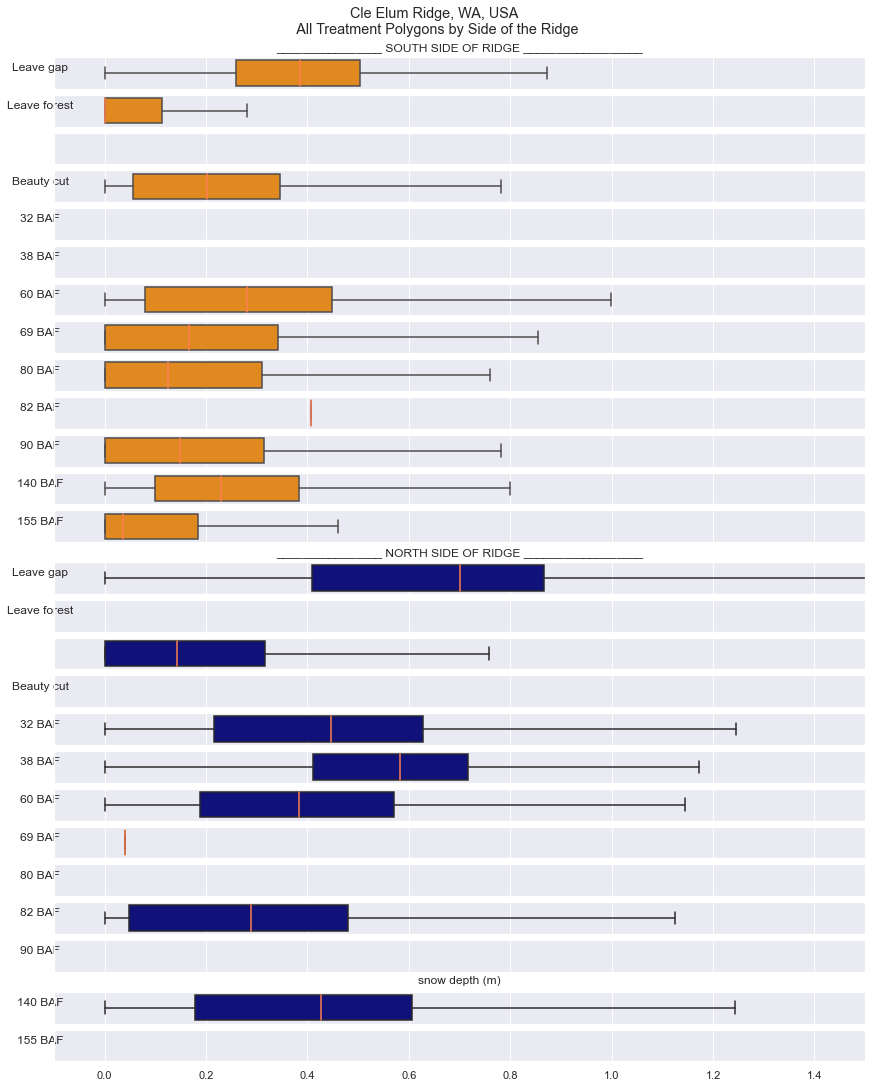

In [ ]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(26, 1, sharex=True, sharey=False, figsize=(12,15), constrained_layout = True)
alpha=0.7

# south side 
sns.boxplot(ax=axes[0], x = ds['hs_rapid_baf_new_1_s'].values.flatten(), color=colorsouth, medianprops={"color":"coral"}, fliersize=0)
sns.boxplot(ax=axes[1], x = ds['hs_rapid_baf_new_2_s'].values.flatten(), color=colorsouth, medianprops={"color":"coral"}, fliersize=0)
sns.boxplot(ax=axes[2], x = ds['hs_rapid_baf_new_150_s'].values.flatten(), color=colorsouth, medianprops={"color":"coral"}, fliersize=0) # leave forest north side
sns.boxplot(ax=axes[3], x = ds['hs_rapid_baf_new_3_s'].values.flatten(), color=colorsouth, medianprops={"color":"coral"}, fliersize=0)
sns.boxplot(ax=axes[4], x = ds['hs_rapid_baf_new_32_s'].values.flatten(), color=colorsouth, medianprops={"color":"coral"}, fliersize=0)
sns.boxplot(ax=axes[5], x = ds['hs_rapid_baf_new_38_s'].values.flatten(), color=colorsouth, medianprops={"color":"coral"}, fliersize=0)
sns.boxplot(ax=axes[6], x = ds['hs_rapid_baf_new_60_s'].values.flatten(), color=colorsouth, medianprops={"color":"coral"}, fliersize=0)
sns.boxplot(ax=axes[7], x = ds['hs_rapid_baf_new_69_s'].values.flatten(), color=colorsouth, medianprops={"color":"coral"}, fliersize=0)
sns.boxplot(ax=axes[8], x = ds['hs_rapid_baf_new_80_s'].values.flatten(), color=colorsouth, medianprops={"color":"coral"}, fliersize=0)
sns.boxplot(ax=axes[9], x = ds['hs_rapid_baf_new_82_s'].values.flatten(), color=colorsouth, medianprops={"color":"coral"}, fliersize=0)
sns.boxplot(ax=axes[10], x = ds['hs_rapid_baf_new_90_s'].values.flatten(), color=colorsouth, medianprops={"color":"coral"}, fliersize=0)
sns.boxplot(ax=axes[11], x = ds['hs_rapid_baf_new_140_s'].values.flatten(), color=colorsouth, medianprops={"color":"coral"}, fliersize=0)
sns.boxplot(ax=axes[12], x = ds['hs_rapid_baf_new_155_s'].values.flatten(), color=colorsouth, medianprops={"color":"coral"}, fliersize=0)

# north side 
sns.boxplot(ax=axes[13], x = ds['hs_rapid_baf_new_1_n'].values.flatten(), color=colornorth, medianprops={"color":"coral"}, fliersize=0)
sns.boxplot(ax=axes[14], x = ds['hs_rapid_baf_new_2_n'].values.flatten(), color=colornorth, medianprops={"color":"coral"}, fliersize=0)
sns.boxplot(ax=axes[15], x = ds['hs_rapid_baf_new_150_n'].values.flatten(), color=colornorth, medianprops={"color":"coral"}, fliersize=0)
sns.boxplot(ax=axes[16], x = ds['hs_rapid_baf_new_3_n'].values.flatten(), color=colornorth, medianprops={"color":"coral"}, fliersize=0)

sns.boxplot(ax=axes[17], x = ds['hs_rapid_baf_new_32_n'].values.flatten(), color=colornorth, medianprops={"color":"coral"}, fliersize=0)
sns.boxplot(ax=axes[18], x = ds['hs_rapid_baf_new_38_n'].values.flatten(), color=colornorth, medianprops={"color":"coral"}, fliersize=0)
sns.boxplot(ax=axes[19], x = ds['hs_rapid_baf_new_60_n'].values.flatten(), color=colornorth, medianprops={"color":"coral"}, fliersize=0)
sns.boxplot(ax=axes[20], x = ds['hs_rapid_baf_new_69_n'].values.flatten(), color=colornorth, medianprops={"color":"coral"}, fliersize=0)
sns.boxplot(ax=axes[21], x = ds['hs_rapid_baf_new_80_n'].values.flatten(), color=colornorth, medianprops={"color":"coral"}, fliersize=0)
sns.boxplot(ax=axes[22], x = ds['hs_rapid_baf_new_82_n'].values.flatten(), color=colornorth, medianprops={"color":"coral"}, fliersize=0)
sns.boxplot(ax=axes[23], x = ds['hs_rapid_baf_new_90_n'].values.flatten(), color=colornorth, medianprops={"color":"coral"}, fliersize=0)
sns.boxplot(ax=axes[24], x = ds['hs_rapid_baf_new_140_n'].values.flatten(), color=colornorth, medianprops={"color":"coral"}, fliersize=0)
sns.boxplot(ax=axes[25], x = ds['hs_rapid_baf_new_155_n'].values.flatten(), color=colornorth, medianprops={"color":"coral"}, fliersize=0)

# sns.boxplot(ax=axes[20], x = ds['hs_rapid_baf_new_92_s'].values.flatten(), color=colorsouth, medianprops={"color":"coral"}, fliersize=0)
# sns.boxplot(ax=axes[21], x = ds['hs_rapid_baf_new_92_n'].values.flatten(), color=colornorth, medianprops={"color":"coral"}, fliersize=0)

# sns.boxplot(ax=axes[22], x = ds['hs_rapid_baf_new_150_s'].values.flatten(), color=colorsouth, medianprops={"color":"coral"}, fliersize=0)
# sns.boxplot(ax=axes[23], x = ds['hs_rapid_baf_new_150_n'].values.flatten(), color=colornorth, medianprops={"color":"coral"}, fliersize=0)


# # labels
axes[0].set_title('________________ SOUTH SIDE OF RIDGE __________________')
axes[13].set_title('________________ NORTH SIDE OF RIDGE __________________')

axes[23].set_xlabel('snow depth (m)')

axes[0].set_ylabel('Leave gap', rotation=360)
axes[1].set_ylabel('Leave forest', rotation=360)
axes[3].set_ylabel('Beauty cut', rotation=360)
axes[4].set_ylabel('32 BAF', rotation=360)
axes[5].set_ylabel('38 BAF', rotation=360)
axes[6].set_ylabel('60 BAF', rotation=360)
axes[7].set_ylabel('69 BAF', rotation=360)
axes[8].set_ylabel('80 BAF', rotation=360)
axes[9].set_ylabel('82 BAF', rotation=360)
axes[10].set_ylabel('90 BAF', rotation=360)
axes[11].set_ylabel('140 BAF', rotation=360)
axes[12].set_ylabel('155 BAF', rotation=360)

axes[13].set_ylabel('Leave gap', rotation=360)
axes[14].set_ylabel('Leave forest', rotation=360)
axes[16].set_ylabel('Beauty cut', rotation=360)
axes[17].set_ylabel('32 BAF', rotation=360)
axes[18].set_ylabel('38 BAF', rotation=360)
axes[19].set_ylabel('60 BAF', rotation=360)
axes[20].set_ylabel('69 BAF', rotation=360)
axes[21].set_ylabel('80 BAF', rotation=360)
axes[22].set_ylabel('82 BAF', rotation=360)
axes[23].set_ylabel('90 BAF', rotation=360)
axes[24].set_ylabel('140 BAF', rotation=360)
axes[25].set_ylabel('155 BAF', rotation=360)


# adjust x limits
axes[0].set_xlim(-0.1,1.5)

plt.suptitle('Cle Elum Ridge, WA, USA \n All Treatment Polygons by Side of the Ridge')

plt.show()

Now, just remove everything that does not have a value to tidy it up...

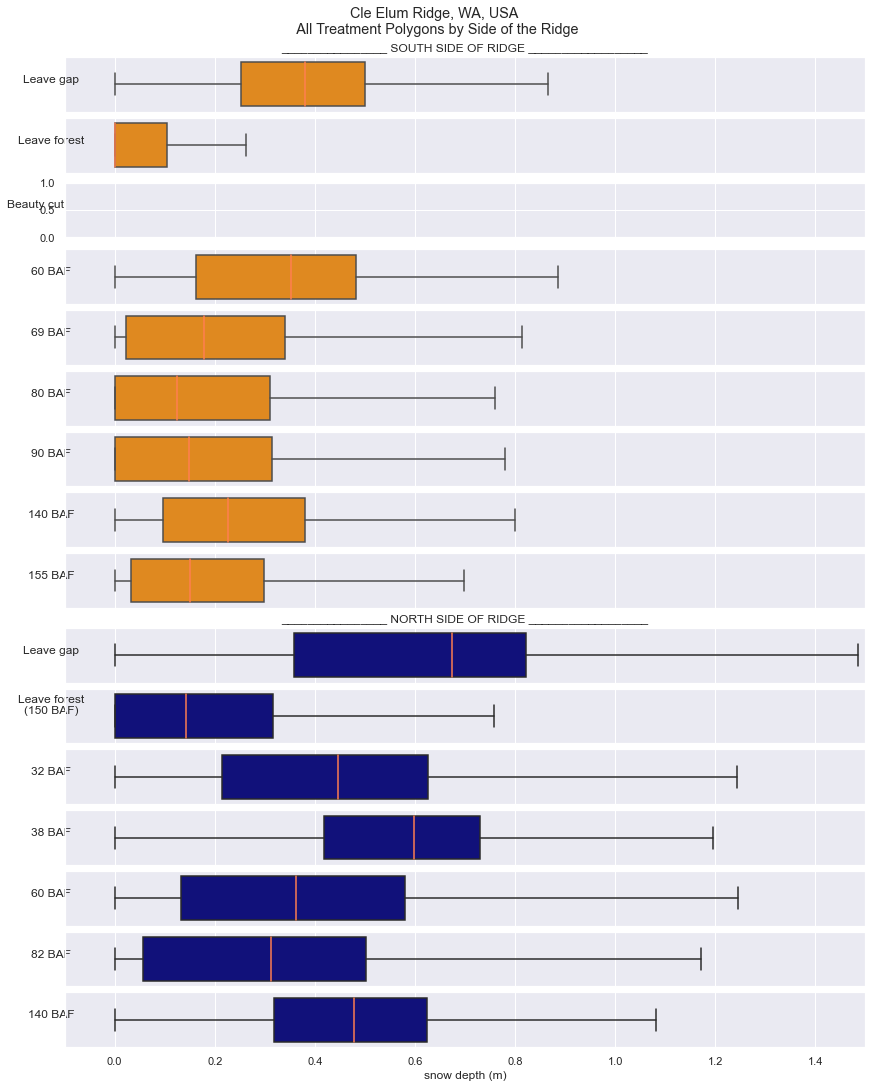

In [26]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(16, 1, sharex=True, sharey=False, figsize=(12,15), constrained_layout = True)
alpha=0.7

# south side 
sns.boxplot(ax=axes[0], x = ds['hs_rapid_baf_new_1_s'].values.flatten(), color=colorsouth, medianprops={"color":"coral"}, fliersize=0)
sns.boxplot(ax=axes[1], x = ds['hs_rapid_baf_new_2_s'].values.flatten(), color=colorsouth, medianprops={"color":"coral"}, fliersize=0)
# sns.boxplot(ax=axes[2], x = ds['hs_rapid_baf_new_150_s'].values.flatten(), color=colorsouth, medianprops={"color":"coral"}, fliersize=0) # leave forest north side
# sns.boxplot(ax=axes[2], x = ds['hs_rapid_baf_new_3_s'].values.flatten(), color=colorsouth, medianprops={"color":"coral"}, fliersize=0)
# sns.boxplot(ax=axes[3], x = ds['hs_rapid_baf_new_32_s'].values.flatten(), color=colorsouth, medianprops={"color":"coral"}, fliersize=0)
# sns.boxplot(ax=axes[4], x = ds['hs_rapid_baf_new_38_s'].values.flatten(), color=colorsouth, medianprops={"color":"coral"}, fliersize=0)
sns.boxplot(ax=axes[3], x = ds['hs_rapid_baf_new_60_s'].values.flatten(), color=colorsouth, medianprops={"color":"coral"}, fliersize=0)
sns.boxplot(ax=axes[4], x = ds['hs_rapid_baf_new_69_s'].values.flatten(), color=colorsouth, medianprops={"color":"coral"}, fliersize=0)
sns.boxplot(ax=axes[5], x = ds['hs_rapid_baf_new_80_s'].values.flatten(), color=colorsouth, medianprops={"color":"coral"}, fliersize=0)
# sns.boxplot(ax=axes[9], x = ds['hs_rapid_baf_new_82_s'].values.flatten(), color=colorsouth, medianprops={"color":"coral"}, fliersize=0)
sns.boxplot(ax=axes[6], x = ds['hs_rapid_baf_new_90_s'].values.flatten(), color=colorsouth, medianprops={"color":"coral"}, fliersize=0)
sns.boxplot(ax=axes[7], x = ds['hs_rapid_baf_new_140_s'].values.flatten(), color=colorsouth, medianprops={"color":"coral"}, fliersize=0)
sns.boxplot(ax=axes[8], x = ds['hs_rapid_baf_new_155_s'].values.flatten(), color=colorsouth, medianprops={"color":"coral"}, fliersize=0)

# north side 
sns.boxplot(ax=axes[9], x = ds['hs_rapid_baf_new_1_n'].values.flatten(), color=colornorth, medianprops={"color":"coral"}, fliersize=0)
# sns.boxplot(ax=axes[14], x = ds['hs_rapid_baf_new_2_n'].values.flatten(), color=colornorth, medianprops={"color":"coral"}, fliersize=0)
sns.boxplot(ax=axes[10], x = ds['hs_rapid_baf_new_150_n'].values.flatten(), color=colornorth, medianprops={"color":"coral"}, fliersize=0)
# sns.boxplot(ax=axes[13], x = ds['hs_rapid_baf_new_3_n'].values.flatten(), color=colornorth, medianprops={"color":"coral"}, fliersize=0)

sns.boxplot(ax=axes[11], x = ds['hs_rapid_baf_new_32_n'].values.flatten(), color=colornorth, medianprops={"color":"coral"}, fliersize=0)
sns.boxplot(ax=axes[12], x = ds['hs_rapid_baf_new_38_n'].values.flatten(), color=colornorth, medianprops={"color":"coral"}, fliersize=0)
sns.boxplot(ax=axes[13], x = ds['hs_rapid_baf_new_60_n'].values.flatten(), color=colornorth, medianprops={"color":"coral"}, fliersize=0)
# sns.boxplot(ax=axes[20], x = ds['hs_rapid_baf_new_69_n'].values.flatten(), color=colornorth, medianprops={"color":"coral"}, fliersize=0)
# sns.boxplot(ax=axes[21], x = ds['hs_rapid_baf_new_80_n'].values.flatten(), color=colornorth, medianprops={"color":"coral"}, fliersize=0)
sns.boxplot(ax=axes[14], x = ds['hs_rapid_baf_new_82_n'].values.flatten(), color=colornorth, medianprops={"color":"coral"}, fliersize=0)
# sns.boxplot(ax=axes[23], x = ds['hs_rapid_baf_new_90_n'].values.flatten(), color=colornorth, medianprops={"color":"coral"}, fliersize=0)
sns.boxplot(ax=axes[15], x = ds['hs_rapid_baf_new_140_n'].values.flatten(), color=colornorth, medianprops={"color":"coral"}, fliersize=0)
# sns.boxplot(ax=axes[25], x = ds['hs_rapid_baf_new_155_n'].values.flatten(), color=colornorth, medianprops={"color":"coral"}, fliersize=0)


# # labels
axes[0].set_title('________________ SOUTH SIDE OF RIDGE __________________')
axes[9].set_title('________________ NORTH SIDE OF RIDGE __________________')
axes[15].set_xlabel('snow depth (m)')

axes[0].set_ylabel('Leave gap', rotation=360)
axes[1].set_ylabel('Leave forest', rotation=360)
axes[2].set_ylabel('Beauty cut', rotation=360)
# axes[3].set_ylabel('32 BAF', rotation=360)
# axes[5].set_ylabel('38 BAF', rotation=360)
axes[3].set_ylabel('60 BAF', rotation=360)
axes[4].set_ylabel('69 BAF', rotation=360)
axes[5].set_ylabel('80 BAF', rotation=360)
# axes[6].set_ylabel('82 BAF', rotation=360)
axes[6].set_ylabel('90 BAF', rotation=360)
axes[7].set_ylabel('140 BAF', rotation=360)
axes[8].set_ylabel('155 BAF', rotation=360)

axes[9].set_ylabel('Leave gap', rotation=360)
axes[10].set_ylabel('Leave forest\n(150 BAF)', rotation=360)
# axes[16].set_ylabel('Beauty cut', rotation=360)
axes[11].set_ylabel('32 BAF', rotation=360)
axes[12].set_ylabel('38 BAF', rotation=360)
axes[13].set_ylabel('60 BAF', rotation=360)
# axes[20].set_ylabel('69 BAF', rotation=360)
# axes[21].set_ylabel('80 BAF', rotation=360)
axes[14].set_ylabel('82 BAF', rotation=360)
# axes[23].set_ylabel('90 BAF', rotation=360)
axes[15].set_ylabel('140 BAF', rotation=360)
# axes[25].set_ylabel('155 BAF', rotation=360)


# adjust x limits
axes[0].set_xlim(-0.1,1.5)

plt.suptitle('Cle Elum Ridge, WA, USA \n All Treatment Polygons by Side of the Ridge')

plt.show()

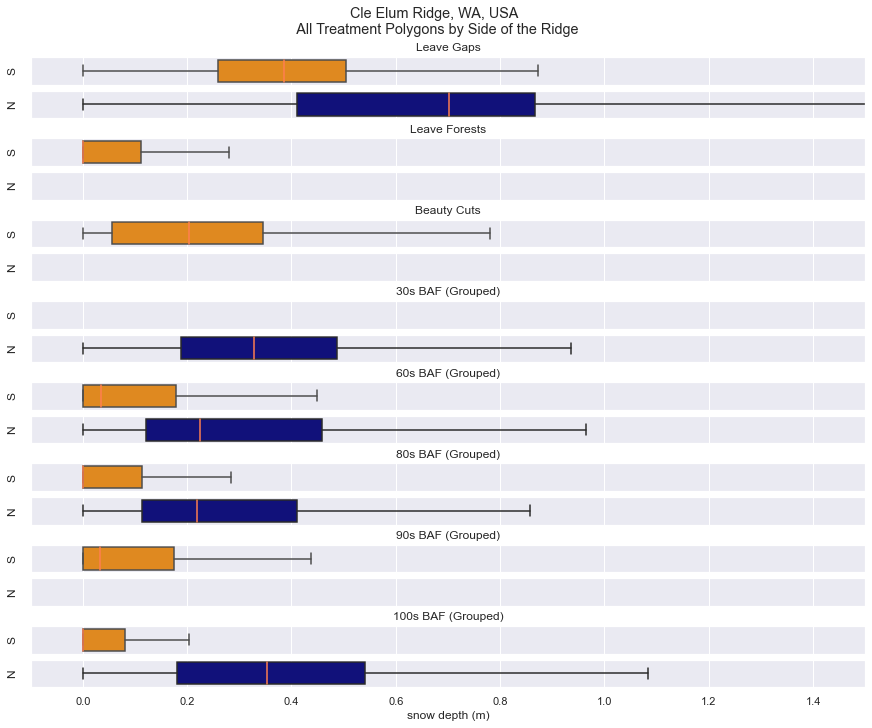

In [36]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(16, 1, sharex=True, sharey=False, figsize=(12,10), constrained_layout = True)
alpha=0.7

sns.boxplot(ax=axes[0], x = ds['hs_rapid_baf_new_1_s'].values.flatten(), color=colorsouth, medianprops={"color":"coral"}, fliersize=0)
sns.boxplot(ax=axes[1], x = ds['hs_rapid_baf_new_1_n'].values.flatten(), color=colornorth, medianprops={"color":"coral"}, fliersize=0)

sns.boxplot(ax=axes[2], x = ds['hs_rapid_baf_new_2_s'].values.flatten(), color=colorsouth, medianprops={"color":"coral"}, fliersize=0)
sns.boxplot(ax=axes[3], x = ds['hs_rapid_baf_new_2_n'].values.flatten(), color=colornorth, medianprops={"color":"coral"}, fliersize=0)

sns.boxplot(ax=axes[4], x = ds['hs_rapid_baf_new_3_s'].values.flatten(), color=colorsouth, medianprops={"color":"coral"}, fliersize=0)
sns.boxplot(ax=axes[5], x = ds['hs_rapid_baf_new_3_n'].values.flatten(), color=colornorth, medianprops={"color":"coral"}, fliersize=0)

sns.boxplot(ax=axes[6], x = ds['hs_rapid_baf_new_30s_s'].values.flatten(), color=colorsouth, medianprops={"color":"coral"}, fliersize=0)
sns.boxplot(ax=axes[7], x = ds['hs_rapid_baf_new_30s_n'].values.flatten(), color=colornorth, medianprops={"color":"coral"}, fliersize=0)

sns.boxplot(ax=axes[8], x = ds['hs_rapid_baf_new_60s_s'].values.flatten(), color=colorsouth, medianprops={"color":"coral"}, fliersize=0)
sns.boxplot(ax=axes[9], x = ds['hs_rapid_baf_new_60s_n'].values.flatten(), color=colornorth, medianprops={"color":"coral"}, fliersize=0)

sns.boxplot(ax=axes[10], x = ds['hs_rapid_baf_new_80s_s'].values.flatten(), color=colorsouth, medianprops={"color":"coral"}, fliersize=0)
sns.boxplot(ax=axes[11], x = ds['hs_rapid_baf_new_80s_n'].values.flatten(), color=colornorth, medianprops={"color":"coral"}, fliersize=0)

sns.boxplot(ax=axes[12], x = ds['hs_rapid_baf_new_90s_s'].values.flatten(), color=colorsouth, medianprops={"color":"coral"}, fliersize=0)
sns.boxplot(ax=axes[13], x = ds['hs_rapid_baf_new_90s_n'].values.flatten(), color=colornorth, medianprops={"color":"coral"}, fliersize=0)

sns.boxplot(ax=axes[14], x = ds['hs_rapid_baf_new_100s_s'].values.flatten(), color=colorsouth, medianprops={"color":"coral"}, fliersize=0)
sns.boxplot(ax=axes[15], x = ds['hs_rapid_baf_new_100s_n'].values.flatten(), color=colornorth, medianprops={"color":"coral"}, fliersize=0)


# labels
axes[0].set_title('Leave Gaps')
axes[2].set_title('Leave Forests')
axes[4].set_title('Beauty Cuts')
axes[6].set_title('30s BAF (Grouped)')
axes[8].set_title('60s BAF (Grouped)')
axes[10].set_title('80s BAF (Grouped)')
axes[12].set_title('90s BAF (Grouped)')
axes[14].set_title('100s BAF (Grouped)')

axes[15].set_xlabel('snow depth (m)')

[axes[i].set_ylabel('S') for i in [0,2,4,6,8,10,12,14]]
[axes[i].set_ylabel('N') for i in [1,3,5,7,9,11,13,15]]

# adjust x limits
axes[0].set_xlim(-0.1,1.5)

plt.suptitle('Cle Elum Ridge, WA, USA \n All Treatment Polygons by Side of the Ridge')

plt.show()

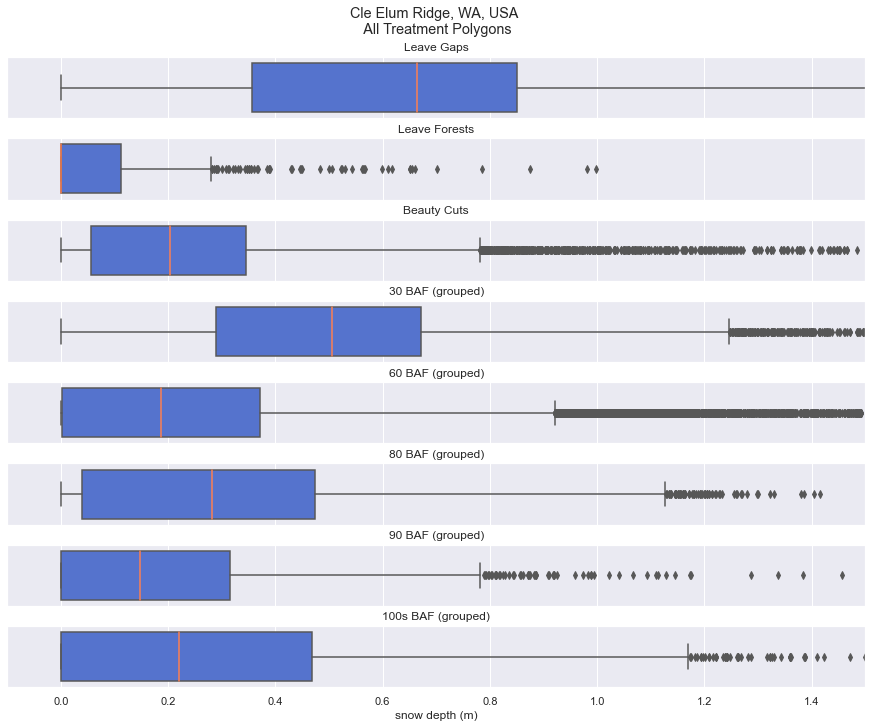

In [52]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(8, 1, sharex=True, sharey=False, figsize=(12,10), constrained_layout = True)
alpha=0.7

sns.boxplot(ax=axes[0], x = ds['hs_rapid_baf_new_1'].values.flatten(), color=colorpos, medianprops={"color":"coral"})
sns.boxplot(ax=axes[1], x = ds['hs_rapid_baf_new_2'].values.flatten(), color=colorpos, medianprops={"color":"coral"})
sns.boxplot(ax=axes[2], x = ds['hs_rapid_baf_new_3'].values.flatten(), color=colorpos, medianprops={"color":"coral"})
sns.boxplot(ax=axes[3], x = ds['hs_rapid_baf_new_30s'].values.flatten(), color=colorpos, medianprops={"color":"coral"})
sns.boxplot(ax=axes[4], x = ds['hs_rapid_baf_new_60s'].values.flatten(), color=colorpos, medianprops={"color":"coral"})
sns.boxplot(ax=axes[5], x = ds['hs_rapid_baf_new_80s'].values.flatten(), color=colorpos, medianprops={"color":"coral"})
sns.boxplot(ax=axes[6], x = ds['hs_rapid_baf_new_90s'].values.flatten(), color=colorpos, medianprops={"color":"coral"})
sns.boxplot(ax=axes[7], x = ds['hs_rapid_baf_new_100s'].values.flatten(), color=colorpos, medianprops={"color":"coral"})

# labels
axes[0].set_title('Leave Gaps')
axes[1].set_title('Leave Forests')
axes[2].set_title('Beauty Cuts')
axes[3].set_title('30 BAF (grouped)')
axes[4].set_title('60 BAF (grouped)')
axes[5].set_title('80 BAF (grouped)')
axes[6].set_title('90 BAF (grouped)')
axes[7].set_title('100s BAF (grouped)')

axes[0].set_xlabel('')
axes[1].set_xlabel('')
axes[2].set_xlabel('')
axes[3].set_xlabel('')
axes[7].set_xlabel('snow depth (m)')

# adjust x limits
axes[0].set_xlim(-0.1,1.5)

plt.suptitle('Cle Elum Ridge, WA, USA \n All Treatment Polygons')

plt.show()

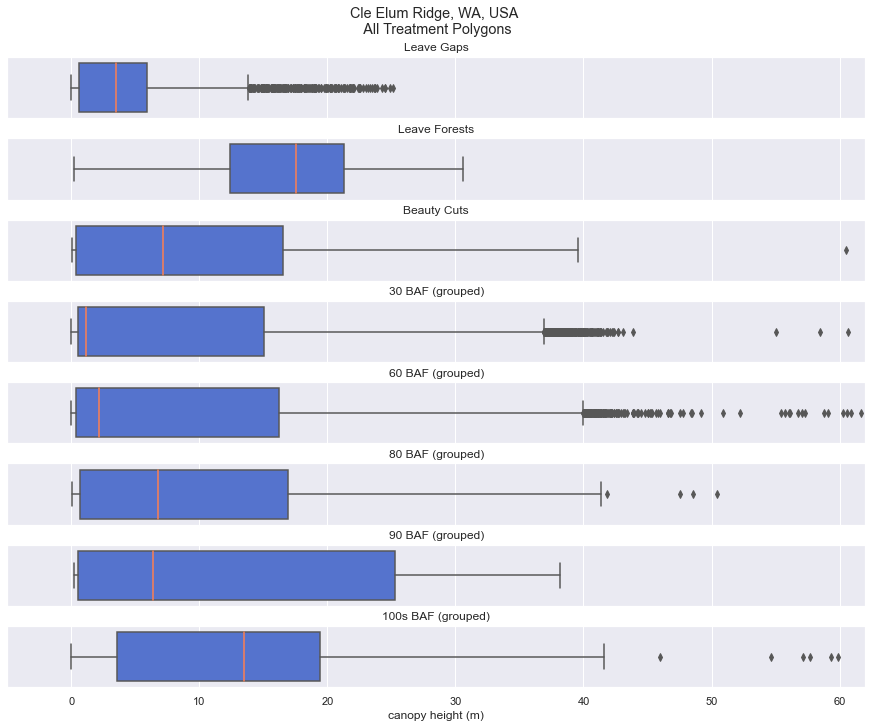

In [53]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(8, 1, sharex=True, sharey=False, figsize=(12,10), constrained_layout = True)
alpha=0.7

sns.boxplot(ax=axes[0], x = ds['chmws_rapid_baf_new_1'].values.flatten(), color=colorpos, medianprops={"color":"coral"})
sns.boxplot(ax=axes[1], x = ds['chmws_rapid_baf_new_2'].values.flatten(), color=colorpos, medianprops={"color":"coral"})
sns.boxplot(ax=axes[2], x = ds['chmws_rapid_baf_new_3'].values.flatten(), color=colorpos, medianprops={"color":"coral"})
sns.boxplot(ax=axes[3], x = ds['chmws_rapid_baf_new_30s'].values.flatten(), color=colorpos, medianprops={"color":"coral"})
sns.boxplot(ax=axes[4], x = ds['chmws_rapid_baf_new_60s'].values.flatten(), color=colorpos, medianprops={"color":"coral"})
sns.boxplot(ax=axes[5], x = ds['chmws_rapid_baf_new_80s'].values.flatten(), color=colorpos, medianprops={"color":"coral"})
sns.boxplot(ax=axes[6], x = ds['chmws_rapid_baf_new_90s'].values.flatten(), color=colorpos, medianprops={"color":"coral"})
sns.boxplot(ax=axes[7], x = ds['chmws_rapid_baf_new_100s'].values.flatten(), color=colorpos, medianprops={"color":"coral"})

# labels
axes[0].set_title('Leave Gaps')
axes[1].set_title('Leave Forests')
axes[2].set_title('Beauty Cuts')
axes[3].set_title('30 BAF (grouped)')
axes[4].set_title('60 BAF (grouped)')
axes[5].set_title('80 BAF (grouped)')
axes[6].set_title('90 BAF (grouped)')
axes[7].set_title('100s BAF (grouped)')

axes[0].set_xlabel('')
axes[1].set_xlabel('')
axes[2].set_xlabel('')
axes[3].set_xlabel('')
axes[7].set_xlabel('canopy height (m)')

# adjust x limits
axes[0].set_xlim(-5,62)

plt.suptitle('Cle Elum Ridge, WA, USA \n All Treatment Polygons')

plt.show()

## CDF Distributions

#### Distance to canopy edge CDFs

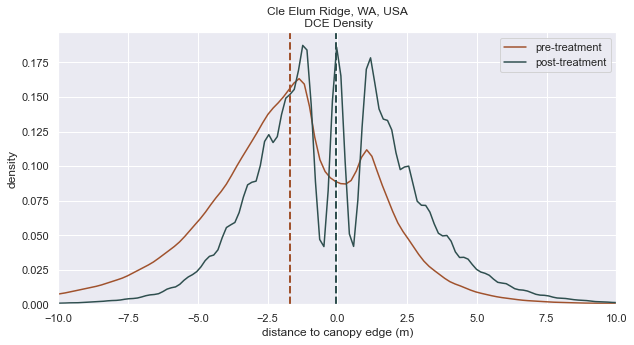

In [27]:
# adjust plot size 
fig, ax = plt.subplots(figsize=(10,5))
sns.kdeplot(ds['dce_snowoff'].values.flatten(), color=colorpre, label='pre-treatment')
sns.kdeplot(ds['dce_rapid'].values.flatten(), color=colorpos, label='post-treatment')

# plot the medians
ax.axvline(ds['dce_snowoff'].median(), color=colorpre, linestyle='dashed', linewidth=2)
ax.axvline(ds['dce_rapid'].median(), color=colorpos, linestyle='dashed', linewidth=2)

plt.title('Cle Elum Ridge, WA, USA\n DCE Density')
plt.ylabel('density')
plt.xlabel('distance to canopy edge (m)')
plt.xlim(-10,10)
plt.legend()

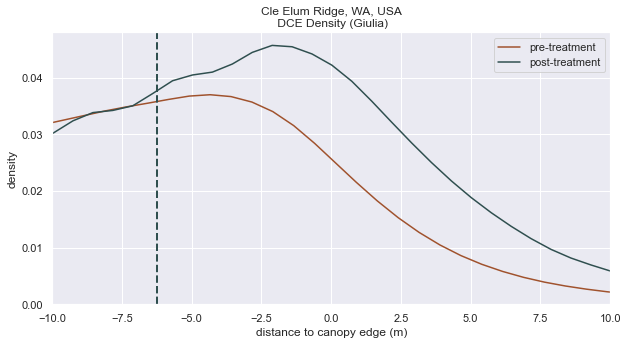

In [28]:
# adjust plot size 
fig, ax = plt.subplots(figsize=(10,5))
sns.kdeplot(ds['giulia_dce_snowoff'].values.flatten(), color=colorpre, label='pre-treatment')
sns.kdeplot(ds['giulia_dce_rapid'].values.flatten(), color=colorpos, label='post-treatment')

# plot the medians
ax.axvline(ds['giulia_dce_snowoff'].median(), color=colorpre, linestyle='dashed', linewidth=2)
ax.axvline(ds['giulia_dce_rapid'].median(), color=colorpos, linestyle='dashed', linewidth=2)

plt.title('Cle Elum Ridge, WA, USA\n DCE Density (Giulia)')
plt.ylabel('density')
plt.xlabel('distance to canopy edge (m)')
plt.xlim(-10,10)
plt.legend()

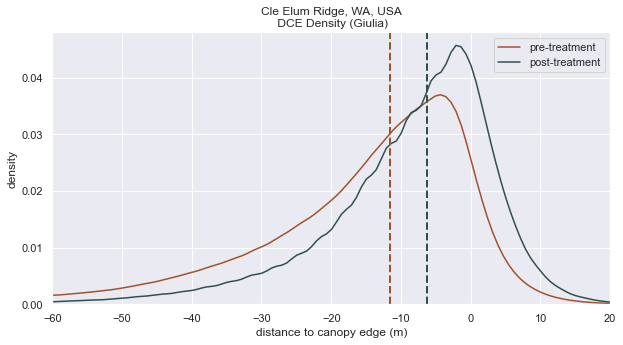

In [29]:
# adjust plot size 
fig, ax = plt.subplots(figsize=(10,5))
sns.kdeplot(ds['giulia_dce_snowoff'].values.flatten(), color=colorpre, label='pre-treatment')
sns.kdeplot(ds['giulia_dce_rapid'].values.flatten(), color=colorpos, label='post-treatment')

# plot the medians
ax.axvline(ds['giulia_dce_snowoff'].median(), color=colorpre, linestyle='dashed', linewidth=2)
ax.axvline(ds['giulia_dce_rapid'].median(), color=colorpos, linestyle='dashed', linewidth=2)

plt.title('Cle Elum Ridge, WA, USA\n DCE Density (Giulia)')
plt.ylabel('density')
plt.xlabel('distance to canopy edge (m)')
plt.xlim(-60,20)
plt.legend()

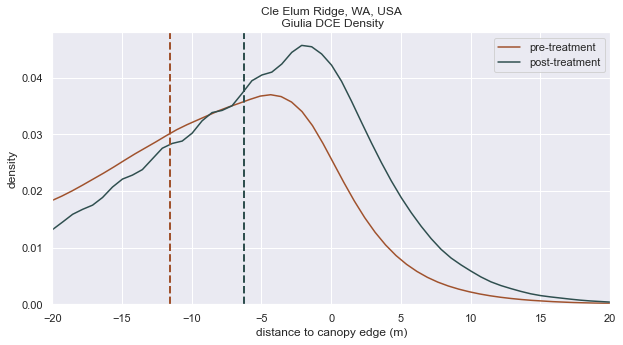

In [30]:
# adjust plot size 
fig, ax = plt.subplots(figsize=(10,5))
sns.kdeplot(ds['giulia_dce_snowoff'].values.flatten(), color=colorpre, label='pre-treatment')
sns.kdeplot(ds['giulia_dce_rapid'].values.flatten(), color=colorpos, label='post-treatment')

# plot the medians
ax.axvline(ds['giulia_dce_snowoff'].median(), color=colorpre, linestyle='dashed', linewidth=2)
ax.axvline(ds['giulia_dce_rapid'].median(), color=colorpos, linestyle='dashed', linewidth=2)

plt.title('Cle Elum Ridge, WA, USA\n Giulia DCE Density')
plt.ylabel('density')
plt.xlabel('distance to canopy edge (m)')
plt.xlim(-20,20)
plt.legend()

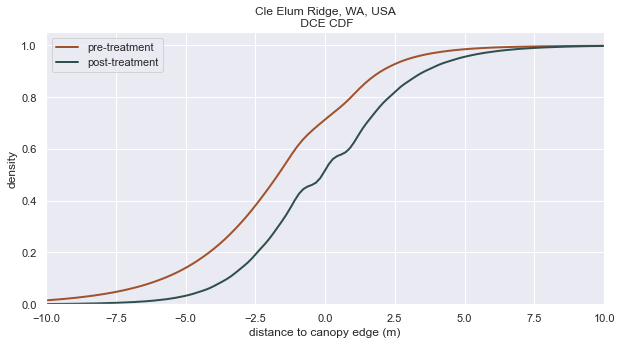

In [31]:
# adjust plot size 
fig, ax = plt.subplots(figsize=(10,5))
sns.kdeplot(ds['dce_snowoff'].values.flatten(), color=colorpre, label='pre-treatment', cumulative=True, linewidth=2)
sns.kdeplot(ds['dce_rapid'].values.flatten(), color=colorpos, label='post-treatment', cumulative=True, linewidth=2)

plt.title('Cle Elum Ridge, WA, USA\n DCE CDF')
plt.ylabel('density')
plt.xlabel('distance to canopy edge (m)')
plt.xlim(-10,10)
plt.legend()

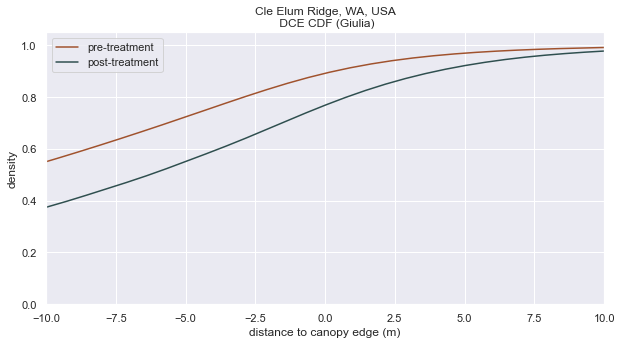

In [32]:
# adjust plot size 
fig, ax = plt.subplots(figsize=(10,5))
sns.kdeplot(ds['giulia_dce_snowoff'].values.flatten(), color=colorpre, label='pre-treatment', cumulative=True)
sns.kdeplot(ds['giulia_dce_rapid'].values.flatten(), color=colorpos, label='post-treatment', cumulative=True)

plt.title('Cle Elum Ridge, WA, USA\n DCE CDF (Giulia)')
plt.ylabel('density')
plt.xlabel('distance to canopy edge (m)')
plt.xlim(-10,10)
plt.legend()

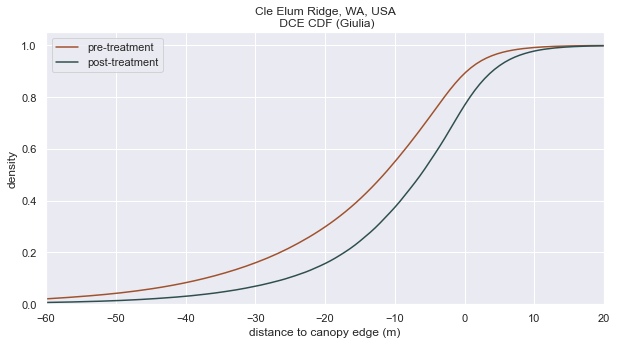

In [33]:
# adjust plot size 
fig, ax = plt.subplots(figsize=(10,5))
sns.kdeplot(ds['giulia_dce_snowoff'].values.flatten(), color=colorpre, label='pre-treatment', cumulative=True)
sns.kdeplot(ds['giulia_dce_rapid'].values.flatten(), color=colorpos, label='post-treatment', cumulative=True)

plt.title('Cle Elum Ridge, WA, USA\n DCE CDF (Giulia)')
plt.ylabel('density')
plt.xlabel('distance to canopy edge (m)')
plt.xlim(-60,20)
plt.legend()

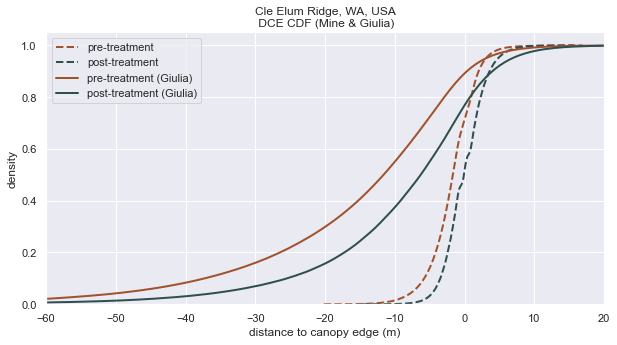

In [34]:
# adjust plot size 
fig, ax = plt.subplots(figsize=(10,5))
sns.kdeplot(ds['dce_snowoff'].values.flatten(), color=colorpre, label='pre-treatment', cumulative=True, linewidth=2, linestyle='dashed')
sns.kdeplot(ds['dce_rapid'].values.flatten(), color=colorpos, label='post-treatment', cumulative=True, linewidth=2, linestyle='dashed')

sns.kdeplot(ds['giulia_dce_snowoff'].values.flatten(), color=colorpre, label='pre-treatment (Giulia)', cumulative=True, linewidth=2)
sns.kdeplot(ds['giulia_dce_rapid'].values.flatten(), color=colorpos, label='post-treatment (Giulia)', cumulative=True, linewidth=2)

plt.title('Cle Elum Ridge, WA, USA\n DCE CDF (Mine & Giulia)')
plt.ylabel('density')
plt.xlabel('distance to canopy edge (m)')
plt.xlim(-60,20)
plt.legend()

Now, CDF inside each treatment 

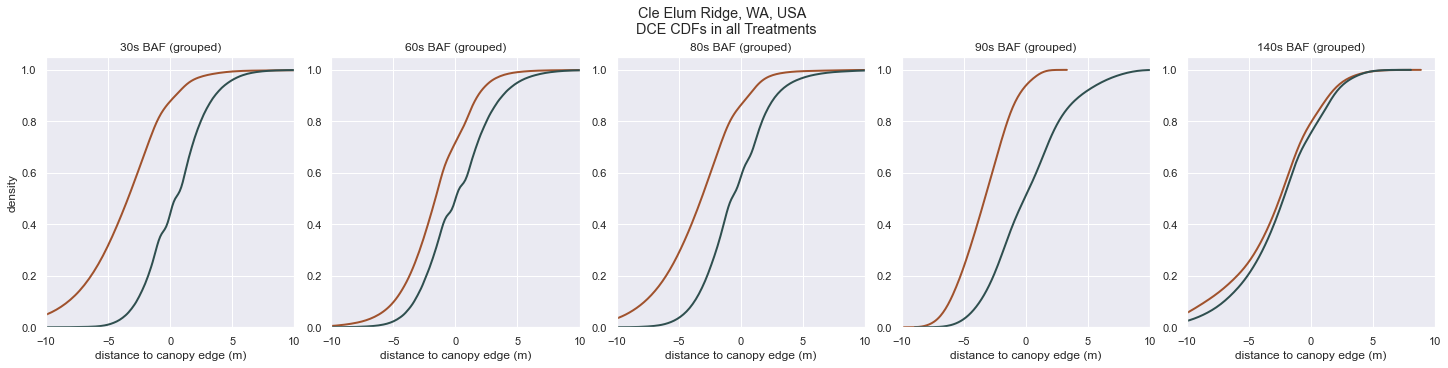

In [35]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(1, 5, sharex=True, sharey=False, figsize=(20,5), constrained_layout = True)
# colorpre='darkslategrey'
# colorpos='mediumaquamarine'
colorpre='sienna'
colorpos='darkslategrey'
alpha=0.7

# plots 

# adjust plot size 
sns.kdeplot(ds['dce_snowoff_baf_new_30s'].values.flatten(), ax=axes[0], color=colorpre, label='pre-treatment', cumulative=True, linewidth=2)
sns.kdeplot(ds['dce_rapid_baf_new_30s'].values.flatten(), ax=axes[0], color=colorpos, label='post-treatment', cumulative=True, linewidth=2)

sns.kdeplot(ds['dce_snowoff_baf_new_60s'].values.flatten(), ax=axes[1], color=colorpre, label='pre-treatment', cumulative=True, linewidth=2)
sns.kdeplot(ds['dce_rapid_baf_new_60s'].values.flatten(), ax=axes[1], color=colorpos, label='post-treatment', cumulative=True, linewidth=2)

sns.kdeplot(ds['dce_snowoff_baf_new_80s'].values.flatten(), ax=axes[2], color=colorpre, label='pre-treatment', cumulative=True, linewidth=2)
sns.kdeplot(ds['dce_rapid_baf_new_80s'].values.flatten(), ax=axes[2], color=colorpos, label='post-treatment', cumulative=True, linewidth=2)

sns.kdeplot(ds['dce_snowoff_baf_new_90s'].values.flatten(), ax=axes[3], color=colorpre, label='pre-treatment', cumulative=True, linewidth=2)
sns.kdeplot(ds['dce_rapid_baf_new_90s'].values.flatten(), ax=axes[3], color=colorpos, label='post-treatment', cumulative=True, linewidth=2)

sns.kdeplot(ds['dce_snowoff_baf_new_100s'].values.flatten(), ax=axes[4], color=colorpre, label='pre-treatment', cumulative=True, linewidth=2)
sns.kdeplot(ds['dce_rapid_baf_new_100s'].values.flatten(), ax=axes[4], color=colorpos, label='post-treatment', cumulative=True, linewidth=2)


# labels
axes[0].set_title('30s BAF (grouped)')
axes[1].set_title('60s BAF (grouped)')
axes[2].set_title('80s BAF (grouped)')
axes[3].set_title('90s BAF (grouped)')
axes[4].set_title('140s BAF (grouped)')

axes[0].set_xlabel('distance to canopy edge (m)')
axes[1].set_xlabel('distance to canopy edge (m)')
axes[2].set_xlabel('distance to canopy edge (m)')
axes[3].set_xlabel('distance to canopy edge (m)')
axes[4].set_xlabel('distance to canopy edge (m)')
axes[0].set_ylabel('density')
axes[1].set_ylabel('')
axes[2].set_ylabel('')
axes[3].set_ylabel('')
axes[4].set_ylabel('')

# adjust x limits
axes[0].set_xlim(-10,10)

plt.suptitle('Cle Elum Ridge, WA, USA \n DCE CDFs in all Treatments')

plt.show()

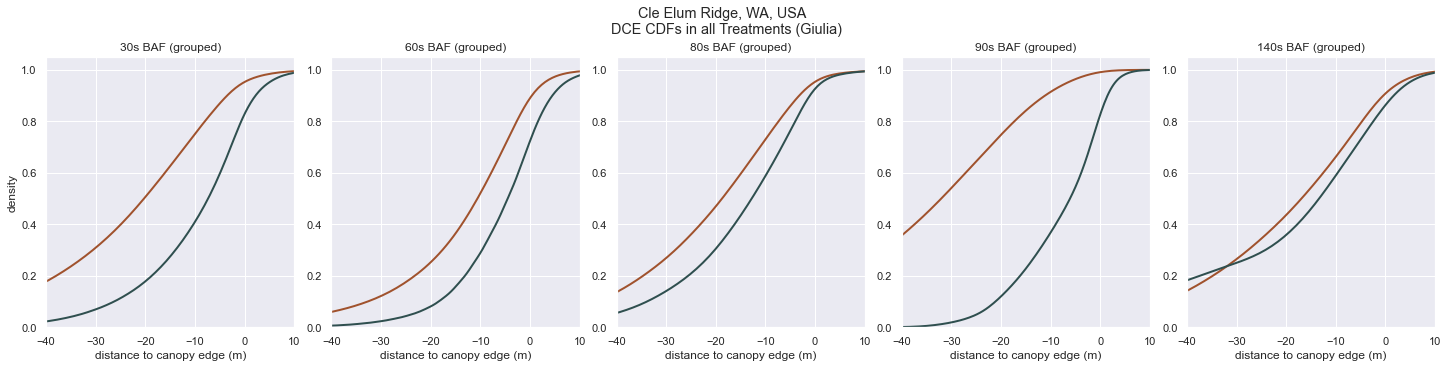

In [36]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(1, 5, sharex=True, sharey=False, figsize=(20,5), constrained_layout = True)
# colorpre='darkslategrey'
# colorpos='mediumaquamarine'
colorpre='sienna'
colorpos='darkslategrey'
alpha=0.7

# plots 

# adjust plot size 
sns.kdeplot(ds['giulia_dce_snowoff_baf_new_30s'].values.flatten(), ax=axes[0], color=colorpre, label='pre-treatment', cumulative=True, linewidth=2)
sns.kdeplot(ds['giulia_dce_rapid_baf_new_30s'].values.flatten(), ax=axes[0], color=colorpos, label='post-treatment', cumulative=True, linewidth=2)

sns.kdeplot(ds['giulia_dce_snowoff_baf_new_60s'].values.flatten(), ax=axes[1], color=colorpre, label='pre-treatment', cumulative=True, linewidth=2)
sns.kdeplot(ds['giulia_dce_rapid_baf_new_60s'].values.flatten(), ax=axes[1], color=colorpos, label='post-treatment', cumulative=True, linewidth=2)

sns.kdeplot(ds['giulia_dce_snowoff_baf_new_80s'].values.flatten(), ax=axes[2], color=colorpre, label='pre-treatment', cumulative=True, linewidth=2)
sns.kdeplot(ds['giulia_dce_rapid_baf_new_80s'].values.flatten(), ax=axes[2], color=colorpos, label='post-treatment', cumulative=True, linewidth=2)

sns.kdeplot(ds['giulia_dce_snowoff_baf_new_90s'].values.flatten(), ax=axes[3], color=colorpre, label='pre-treatment', cumulative=True, linewidth=2)
sns.kdeplot(ds['giulia_dce_rapid_baf_new_90s'].values.flatten(), ax=axes[3], color=colorpos, label='post-treatment', cumulative=True, linewidth=2)

sns.kdeplot(ds['giulia_dce_snowoff_baf_new_100s'].values.flatten(), ax=axes[4], color=colorpre, label='pre-treatment', cumulative=True, linewidth=2)
sns.kdeplot(ds['giulia_dce_rapid_baf_new_100s'].values.flatten(), ax=axes[4], color=colorpos, label='post-treatment', cumulative=True, linewidth=2)


# labels
axes[0].set_title('30s BAF (grouped)')
axes[1].set_title('60s BAF (grouped)')
axes[2].set_title('80s BAF (grouped)')
axes[3].set_title('90s BAF (grouped)')
axes[4].set_title('140s BAF (grouped)')

axes[0].set_xlabel('distance to canopy edge (m)')
axes[1].set_xlabel('distance to canopy edge (m)')
axes[2].set_xlabel('distance to canopy edge (m)')
axes[3].set_xlabel('distance to canopy edge (m)')
axes[4].set_xlabel('distance to canopy edge (m)')
axes[0].set_ylabel('density')
axes[1].set_ylabel('')
axes[2].set_ylabel('')
axes[3].set_ylabel('')
axes[4].set_ylabel('')

# adjust x limits
axes[0].set_xlim(-40,10)

plt.suptitle('Cle Elum Ridge, WA, USA \n DCE CDFs in all Treatments (Giulia)')

plt.show()

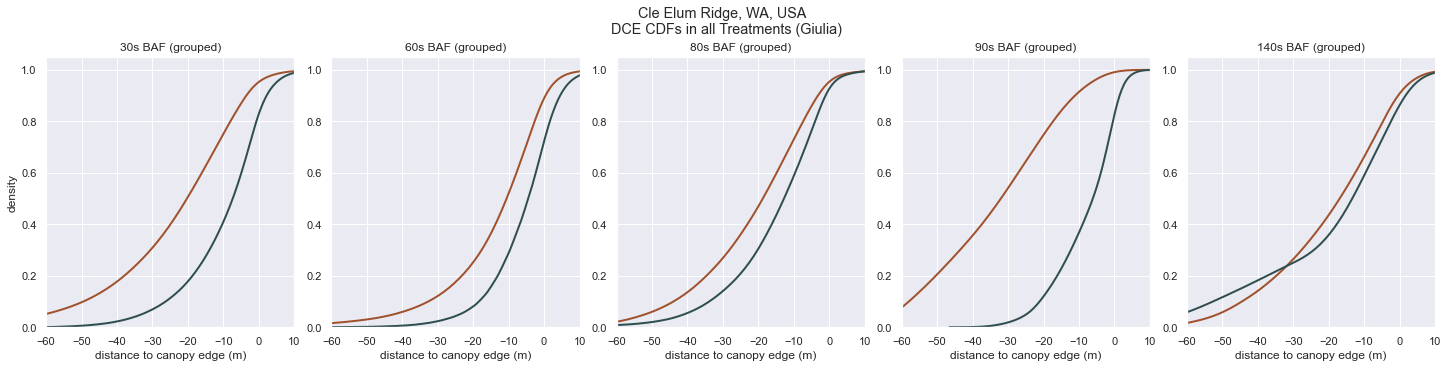

In [37]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(1, 5, sharex=True, sharey=False, figsize=(20,5), constrained_layout = True)
# colorpre='darkslategrey'
# colorpos='mediumaquamarine'
colorpre='sienna'
colorpos='darkslategrey'
alpha=0.7

# plots 

# adjust plot size 
sns.kdeplot(ds['giulia_dce_snowoff_baf_new_30s'].values.flatten(), ax=axes[0], color=colorpre, label='pre-treatment', cumulative=True, linewidth=2)
sns.kdeplot(ds['giulia_dce_rapid_baf_new_30s'].values.flatten(), ax=axes[0], color=colorpos, label='post-treatment', cumulative=True, linewidth=2)

sns.kdeplot(ds['giulia_dce_snowoff_baf_new_60s'].values.flatten(), ax=axes[1], color=colorpre, label='pre-treatment', cumulative=True, linewidth=2)
sns.kdeplot(ds['giulia_dce_rapid_baf_new_60s'].values.flatten(), ax=axes[1], color=colorpos, label='post-treatment', cumulative=True, linewidth=2)

sns.kdeplot(ds['giulia_dce_snowoff_baf_new_80s'].values.flatten(), ax=axes[2], color=colorpre, label='pre-treatment', cumulative=True, linewidth=2)
sns.kdeplot(ds['giulia_dce_rapid_baf_new_80s'].values.flatten(), ax=axes[2], color=colorpos, label='post-treatment', cumulative=True, linewidth=2)

sns.kdeplot(ds['giulia_dce_snowoff_baf_new_90s'].values.flatten(), ax=axes[3], color=colorpre, label='pre-treatment', cumulative=True, linewidth=2)
sns.kdeplot(ds['giulia_dce_rapid_baf_new_90s'].values.flatten(), ax=axes[3], color=colorpos, label='post-treatment', cumulative=True, linewidth=2)

sns.kdeplot(ds['giulia_dce_snowoff_baf_new_100s'].values.flatten(), ax=axes[4], color=colorpre, label='pre-treatment', cumulative=True, linewidth=2)
sns.kdeplot(ds['giulia_dce_rapid_baf_new_100s'].values.flatten(), ax=axes[4], color=colorpos, label='post-treatment', cumulative=True, linewidth=2)


# labels
axes[0].set_title('30s BAF (grouped)')
axes[1].set_title('60s BAF (grouped)')
axes[2].set_title('80s BAF (grouped)')
axes[3].set_title('90s BAF (grouped)')
axes[4].set_title('140s BAF (grouped)')

axes[0].set_xlabel('distance to canopy edge (m)')
axes[1].set_xlabel('distance to canopy edge (m)')
axes[2].set_xlabel('distance to canopy edge (m)')
axes[3].set_xlabel('distance to canopy edge (m)')
axes[4].set_xlabel('distance to canopy edge (m)')
axes[0].set_ylabel('density')
axes[1].set_ylabel('')
axes[2].set_ylabel('')
axes[3].set_ylabel('')
axes[4].set_ylabel('')

# adjust x limits
axes[0].set_xlim(-60,10)

plt.suptitle('Cle Elum Ridge, WA, USA \n DCE CDFs in all Treatments (Giulia)')

plt.show()

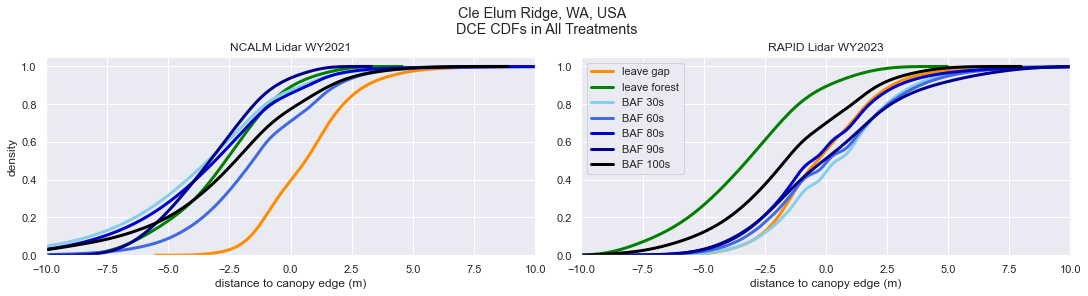

In [42]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(1, 2, sharex=True, sharey=False, figsize=(15,4), constrained_layout = True)
alpha=0.7

# plots 

# adjust plot size 
sns.kdeplot(ds['dce_snowoff_baf_new_1'].values.flatten(), ax=axes[0], color='darkorange', label='leave gap', cumulative=True, linewidth=3)
sns.kdeplot(ds['dce_rapid_baf_new_1'].values.flatten(), ax=axes[1], color='darkorange', label='leave gap', cumulative=True, linewidth=3)

sns.kdeplot(ds['dce_snowoff_baf_new_2'].values.flatten(), ax=axes[0], color='green', label='leave forest', cumulative=True, linewidth=3)
sns.kdeplot(ds['dce_rapid_baf_new_2'].values.flatten(), ax=axes[1], color='green', label='leave forest', cumulative=True, linewidth=3)

sns.kdeplot(ds['dce_snowoff_baf_new_30s'].values.flatten(), ax=axes[0], color='skyblue', label='BAF 30s', cumulative=True, linewidth=3)
sns.kdeplot(ds['dce_rapid_baf_new_30s'].values.flatten(), ax=axes[1], color='skyblue', label='BAF 30s', cumulative=True, linewidth=3)

sns.kdeplot(ds['dce_snowoff_baf_new_60s'].values.flatten(), ax=axes[0], color='royalblue', label='BAF 60s', cumulative=True, linewidth=3)
sns.kdeplot(ds['dce_rapid_baf_new_60s'].values.flatten(), ax=axes[1], color='royalblue', label='BAF 60s', cumulative=True, linewidth=3)

sns.kdeplot(ds['dce_snowoff_baf_new_80s'].values.flatten(), ax=axes[0], color='mediumblue', label='BAF 80s', cumulative=True, linewidth=3)
sns.kdeplot(ds['dce_rapid_baf_new_80s'].values.flatten(), ax=axes[1], color='mediumblue', label='BAF 80s', cumulative=True, linewidth=3)

sns.kdeplot(ds['dce_snowoff_baf_new_90s'].values.flatten(), ax=axes[0], color='darkblue', label='BAF 90s', cumulative=True, linewidth=3)
sns.kdeplot(ds['dce_rapid_baf_new_90s'].values.flatten(), ax=axes[1], color='darkblue', label='BAF 90s', cumulative=True, linewidth=3)

sns.kdeplot(ds['dce_snowoff_baf_new_100s'].values.flatten(), ax=axes[0], color='black', label='BAF 100s', cumulative=True, linewidth=3)
sns.kdeplot(ds['dce_rapid_baf_new_100s'].values.flatten(), ax=axes[1], color='black', label='BAF 100s', cumulative=True, linewidth=3)


# labels
axes[0].set_title('NCALM Lidar WY2021')
axes[1].set_title('RAPID Lidar WY2023')

axes[0].set_xlabel('distance to canopy edge (m)')
axes[1].set_xlabel('distance to canopy edge (m)')

axes[0].set_ylabel('density')
axes[1].set_ylabel('')


# adjust x limits
axes[0].set_xlim(-10,10)

plt.suptitle('Cle Elum Ridge, WA, USA \n DCE CDFs in All Treatments')
plt.legend()
plt.show()

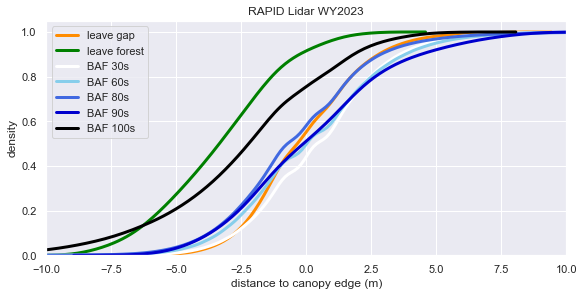

In [38]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(sharex=True, sharey=False, figsize=(8,4), constrained_layout = True)

# plots 

# adjust plot size 
sns.kdeplot(ds['dce_rapid_baf_new_1'].values.flatten(), color='darkorange', label='leave gap', cumulative=True, linewidth=3)

sns.kdeplot(ds['dce_rapid_baf_new_2'].values.flatten(), color='green', label='leave forest', cumulative=True, linewidth=3)

sns.kdeplot(ds['dce_rapid_baf_new_30s'].values.flatten(), color='white', label='BAF 30s', cumulative=True, linewidth=3)

sns.kdeplot(ds['dce_rapid_baf_new_60s'].values.flatten(), color='skyblue', label='BAF 60s', cumulative=True, linewidth=3)

sns.kdeplot(ds['dce_rapid_baf_new_80s'].values.flatten(), color='royalblue', label='BAF 80s', cumulative=True, linewidth=3)

sns.kdeplot(ds['dce_rapid_baf_new_90s'].values.flatten(), color='mediumblue', label='BAF 90s', cumulative=True, linewidth=3)

sns.kdeplot(ds['dce_rapid_baf_new_100s'].values.flatten(), color='black', label='BAF 100s', cumulative=True, linewidth=3)


# labels
plt.title('RAPID Lidar WY2023')
plt.xlabel('distance to canopy edge (m)')
plt.ylabel('density')
plt.xlim(-10,10)

plt.legend()
plt.show()

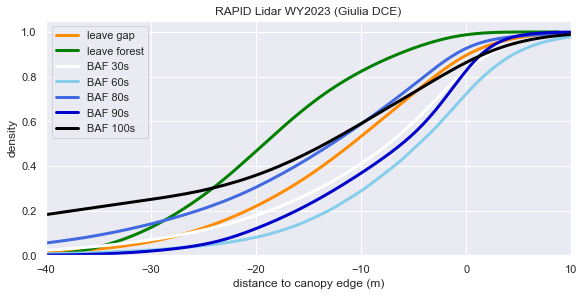

In [39]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(sharex=True, sharey=False, figsize=(8,4), constrained_layout = True)

# plots 

# adjust plot size 
sns.kdeplot(ds['giulia_dce_rapid_baf_new_1'].values.flatten(), color='darkorange', label='leave gap', cumulative=True, linewidth=3)

sns.kdeplot(ds['giulia_dce_rapid_baf_new_2'].values.flatten(), color='green', label='leave forest', cumulative=True, linewidth=3)

sns.kdeplot(ds['giulia_dce_rapid_baf_new_30s'].values.flatten(), color='white', label='BAF 30s', cumulative=True, linewidth=3)

sns.kdeplot(ds['giulia_dce_rapid_baf_new_60s'].values.flatten(), color='skyblue', label='BAF 60s', cumulative=True, linewidth=3)

sns.kdeplot(ds['giulia_dce_rapid_baf_new_80s'].values.flatten(), color='royalblue', label='BAF 80s', cumulative=True, linewidth=3)

sns.kdeplot(ds['giulia_dce_rapid_baf_new_90s'].values.flatten(), color='mediumblue', label='BAF 90s', cumulative=True, linewidth=3)

sns.kdeplot(ds['giulia_dce_rapid_baf_new_100s'].values.flatten(), color='black', label='BAF 100s', cumulative=True, linewidth=3)


# labels
plt.title('RAPID Lidar WY2023 (Giulia DCE)')
plt.xlabel('distance to canopy edge (m)')
plt.ylabel('density')
plt.xlim(-40,10)

plt.legend()
plt.show()

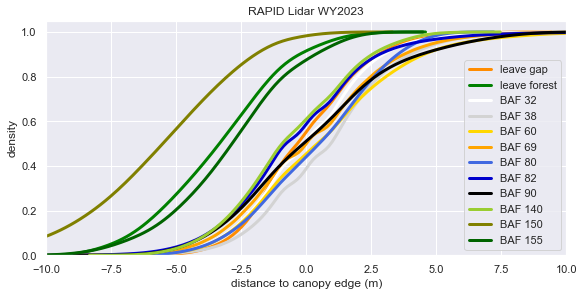

In [40]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(sharex=True, sharey=False, figsize=(8,4), constrained_layout = True)

# plots 

# adjust plot size 
sns.kdeplot(ds['dce_rapid_baf_new_1'].values.flatten(), color='darkorange', label='leave gap', cumulative=True, linewidth=3)
sns.kdeplot(ds['dce_rapid_baf_new_2'].values.flatten(), color='green', label='leave forest', cumulative=True, linewidth=3)

sns.kdeplot(ds['dce_rapid_baf_new_32'].values.flatten(), color='white', label='BAF 32', cumulative=True, linewidth=3)
sns.kdeplot(ds['dce_rapid_baf_new_38'].values.flatten(), color='lightgrey', label='BAF 38', cumulative=True, linewidth=3)

sns.kdeplot(ds['dce_rapid_baf_new_60'].values.flatten(), color='gold', label='BAF 60', cumulative=True, linewidth=3)
sns.kdeplot(ds['dce_rapid_baf_new_69'].values.flatten(), color='orange', label='BAF 69', cumulative=True, linewidth=3)

sns.kdeplot(ds['dce_rapid_baf_new_80'].values.flatten(), color='royalblue', label='BAF 80', cumulative=True, linewidth=3)
sns.kdeplot(ds['dce_rapid_baf_new_82'].values.flatten(), color='mediumblue', label='BAF 82', cumulative=True, linewidth=3)

sns.kdeplot(ds['dce_rapid_baf_new_90'].values.flatten(), color='black', label='BAF 90', cumulative=True, linewidth=3)
# sns.kdeplot(ds['dce_rapid_baf_new_92'].values.flatten(), color='mediumblue', label='BAF 90s', cumulative=True, linewidth=3)

sns.kdeplot(ds['dce_rapid_baf_new_140'].values.flatten(), color='yellowgreen', label='BAF 140', cumulative=True, linewidth=3)
sns.kdeplot(ds['dce_rapid_baf_new_150'].values.flatten(), color='olive', label='BAF 150', cumulative=True, linewidth=3)
sns.kdeplot(ds['dce_rapid_baf_new_155'].values.flatten(), color='darkgreen', label='BAF 155', cumulative=True, linewidth=3)


# labels
plt.title('RAPID Lidar WY2023')
plt.xlabel('distance to canopy edge (m)')
plt.ylabel('density')
plt.xlim(-10,10)

plt.legend()
plt.show()

#### Snow depth CDFs 

In [41]:
ds['hs_ncalm_baf_new_17'] = ds['hs_ncalm'].where(ds['baf_new'] == 17)
ds['hs_ncalm_baf_new_30'] = ds['hs_ncalm'].where(ds['baf_new'] == 30)

ds['hs_rapid_baf_new_17'] = ds['hs_rapid'].where(ds['baf_new'] == 17)
ds['hs_rapid_baf_new_30'] = ds['hs_rapid'].where(ds['baf_new'] == 30)

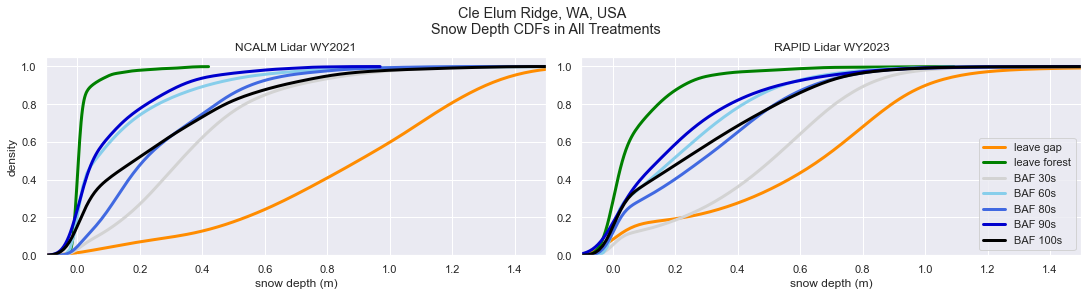

In [63]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(1, 2, sharex=True, sharey=False, figsize=(15,4), constrained_layout = True)
alpha=0.7

# plots 

# adjust plot size 
sns.kdeplot(ds['hs_ncalm_baf_new_1'].values.flatten(), ax=axes[0], color='darkorange', label='leave gap', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_rapid_baf_new_1'].values.flatten(), ax=axes[1], color='darkorange', label='leave gap', cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_ncalm_baf_new_2'].values.flatten(), ax=axes[0], color='green', label='leave forest', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_rapid_baf_new_2'].values.flatten(), ax=axes[1], color='green', label='leave forest', cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_ncalm_baf_new_30s'].values.flatten(), ax=axes[0], color='lightgrey', label='BAF 30s', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_rapid_baf_new_30s'].values.flatten(), ax=axes[1], color='lightgrey', label='BAF 30s', cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_ncalm_baf_new_60s'].values.flatten(), ax=axes[0], color='skyblue', label='BAF 60s', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_rapid_baf_new_60s'].values.flatten(), ax=axes[1], color='skyblue', label='BAF 60s', cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_ncalm_baf_new_80s'].values.flatten(), ax=axes[0], color='royalblue', label='BAF 80s', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_rapid_baf_new_80s'].values.flatten(), ax=axes[1], color='royalblue', label='BAF 80s', cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_ncalm_baf_new_90s'].values.flatten(), ax=axes[0], color='mediumblue', label='BAF 90s', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_rapid_baf_new_90s'].values.flatten(), ax=axes[1], color='mediumblue', label='BAF 90s', cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_ncalm_baf_new_100s'].values.flatten(), ax=axes[0], color='black', label='BAF 100s', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_rapid_baf_new_100s'].values.flatten(), ax=axes[1], color='black', label='BAF 100s', cumulative=True, linewidth=3)


# labels
axes[0].set_title('NCALM Lidar WY2021')
axes[1].set_title('RAPID Lidar WY2023')

axes[0].set_xlabel('snow depth (m)')
axes[1].set_xlabel('snow depth (m)')

axes[0].set_ylabel('density')
axes[1].set_ylabel('')

axes[0].set_xlim(-0.1,1.5)

plt.suptitle('Cle Elum Ridge, WA, USA \n Snow Depth CDFs in All Treatments')
plt.legend()
plt.show()

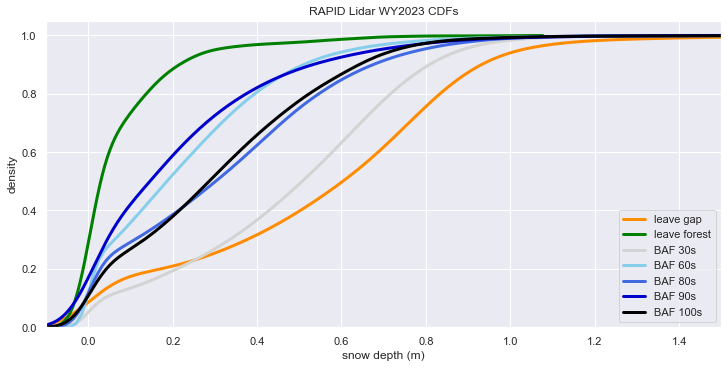

In [96]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(sharex=True, sharey=False, figsize=(10,5), constrained_layout = True)

# plots
sns.kdeplot(ds['hs_rapid_baf_new_1'].values.flatten(), color='darkorange', label='leave gap', cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_rapid_baf_new_2'].values.flatten(), color='green', label='leave forest', cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_rapid_baf_new_30s'].values.flatten(), color='lightgrey', label='BAF 30s', cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_rapid_baf_new_60s'].values.flatten(), color='skyblue', label='BAF 60s', cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_rapid_baf_new_80s'].values.flatten(), color='royalblue', label='BAF 80s', cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_rapid_baf_new_90s'].values.flatten(), color='mediumblue', label='BAF 90s', cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_rapid_baf_new_100s'].values.flatten(), color='black', label='BAF 100s', cumulative=True, linewidth=3)


# labels
plt.title('RAPID Lidar WY2023 CDFs')
plt.xlabel('snow depth (m)')
plt.ylabel('density')
plt.xlim(-0.1,1.5)
# plt.xlim(-0.1,1.2)

plt.legend()
plt.show()

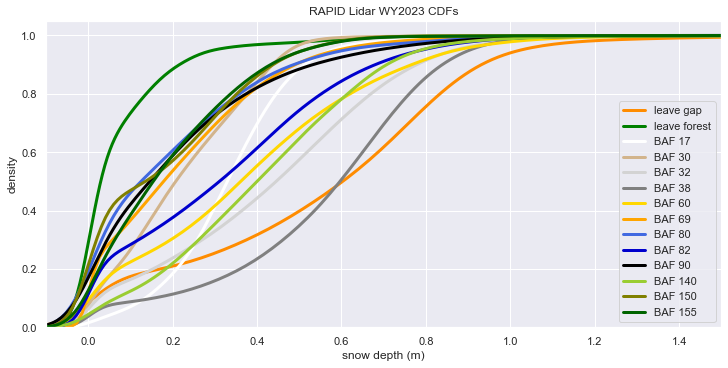

In [91]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(sharex=True, sharey=False, figsize=(10,5), constrained_layout = True)

# plots 
sns.kdeplot(ds['hs_rapid_baf_new_1'].values.flatten(), color='darkorange', label='leave gap', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_rapid_baf_new_2'].values.flatten(), color='green', label='leave forest', cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_rapid_baf_new_17'].values.flatten(), color='white', label='BAF 17', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_rapid_baf_new_30'].values.flatten(), color='tan', label='BAF 30', cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_rapid_baf_new_32'].values.flatten(), color='lightgrey', label='BAF 32', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_rapid_baf_new_38'].values.flatten(), color='grey', label='BAF 38', cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_rapid_baf_new_60'].values.flatten(), color='gold', label='BAF 60', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_rapid_baf_new_69'].values.flatten(), color='orange', label='BAF 69', cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_rapid_baf_new_80'].values.flatten(), color='royalblue', label='BAF 80', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_rapid_baf_new_82'].values.flatten(), color='mediumblue', label='BAF 82', cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_rapid_baf_new_90'].values.flatten(), color='black', label='BAF 90', cumulative=True, linewidth=3)
# sns.kdeplot(ds['hs_rapid_baf_new_92'].values.flatten(), color='mediumblue', label='BAF 90s', cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_rapid_baf_new_140'].values.flatten(), color='yellowgreen', label='BAF 140', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_rapid_baf_new_150'].values.flatten(), color='olive', label='BAF 150', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_rapid_baf_new_155'].values.flatten(), color='darkgreen', label='BAF 155', cumulative=True, linewidth=3)


# labels
plt.title('RAPID Lidar WY2023 CDFs')
plt.xlabel('snow depth (m)')
plt.ylabel('density')
plt.xlim(-0.1,1.5)

plt.legend()
plt.show()

In [92]:
ds['hs_rapid_baf_new_17_n'] = ds['hs_rapid_baf_new_17'].where(ds['baf_ridge'] == -1)
ds['hs_rapid_baf_new_30_n'] = ds['hs_rapid_baf_new_30'].where(ds['baf_ridge'] == -1)

ds['hs_rapid_baf_new_17_s'] = ds['hs_rapid_baf_new_17'].where(ds['baf_ridge'] == 1)
ds['hs_rapid_baf_new_30_s'] = ds['hs_rapid_baf_new_30'].where(ds['baf_ridge'] == 1)

Now, do this but break this up by side of the ridge 
* the variables for this are created in `1_update_netcdf.ipynb`

c:\Users\Lumbr\miniconda3\envs\raster\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
c:\Users\Lumbr\miniconda3\envs\raster\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


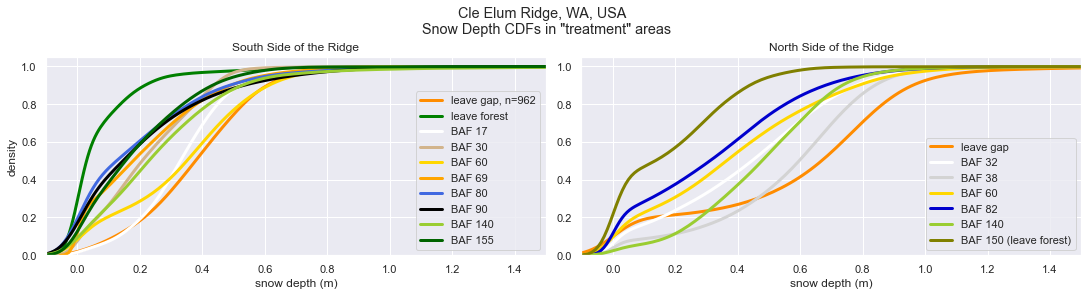

In [95]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(1, 2, sharex=True, sharey=False, figsize=(15,4), constrained_layout = True)
alpha=0.7

# plots
# SOUTH
sns.kdeplot(ds['hs_rapid_baf_new_1_s'].values.flatten(), ax=axes[0], color='darkorange', label=f'leave gap, n={np.unique(ds["hs_rapid_baf_new_1_s"]).size}', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_2_s'].values.flatten(), ax=axes[0], color='green', label='leave forest', cumulative=True, linewidth=3, linestyle='solid')

sns.kdeplot(ds['hs_rapid_baf_new_17_s'].values.flatten(), ax=axes[0], color='white', label='BAF 17', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_30_s'].values.flatten(), ax=axes[0], color='tan', label='BAF 30', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_32_s'].values.flatten(), ax=axes[0], color='white', label='BAF 32', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_38_s'].values.flatten(), ax=axes[0], color='lightgrey', label='BAF 38', cumulative=True, linewidth=3, linestyle='solid')

sns.kdeplot(ds['hs_rapid_baf_new_60_s'].values.flatten(), ax=axes[0], color='gold', label='BAF 60', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_69_s'].values.flatten(), ax=axes[0], color='orange', label='BAF 69', cumulative=True, linewidth=3, linestyle='solid')

sns.kdeplot(ds['hs_rapid_baf_new_80_s'].values.flatten(), ax=axes[0], color='royalblue', label='BAF 80', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_82_s'].values.flatten(), ax=axes[0], color='mediumblue', label='BAF 82', cumulative=True, linewidth=3, linestyle='solid')

sns.kdeplot(ds['hs_rapid_baf_new_90_s'].values.flatten(), ax=axes[0], color='black', label='BAF 90', cumulative=True, linewidth=3, linestyle='solid')
# sns.kdeplot(ds['hs_rapid_baf_new_92_s'].values.flatten(), ax=axes[0], color='mediumblue', label='BAF 90s', cumulative=True, linewidth=3, linestyle='solid')

sns.kdeplot(ds['hs_rapid_baf_new_140_s'].values.flatten(), ax=axes[0], color='yellowgreen', label='BAF 140', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_150_s'].values.flatten(), ax=axes[0], color='olive', label='BAF 150', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_155_s'].values.flatten(), ax=axes[0], color='darkgreen', label='BAF 155', cumulative=True, linewidth=3, linestyle='solid')

# NORTH
sns.kdeplot(ds['hs_rapid_baf_new_1_n'].values.flatten(), ax=axes[1], color='darkorange', label='leave gap', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_2_n'].values.flatten(), ax=axes[1], color='green', label='leave forest', cumulative=True, linewidth=3, linestyle='solid')

sns.kdeplot(ds['hs_rapid_baf_new_32_n'].values.flatten(), ax=axes[1], color='white', label='BAF 32', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_38_n'].values.flatten(), ax=axes[1], color='lightgrey', label='BAF 38', cumulative=True, linewidth=3, linestyle='solid')

sns.kdeplot(ds['hs_rapid_baf_new_60_n'].values.flatten(), ax=axes[1], color='gold', label='BAF 60', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_69_n'].values.flatten(), ax=axes[1], color='orange', label='BAF 69', cumulative=True, linewidth=3, linestyle='solid')

sns.kdeplot(ds['hs_rapid_baf_new_80_n'].values.flatten(), ax=axes[1], color='royalblue', label='BAF 80', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_82_n'].values.flatten(), ax=axes[1], color='mediumblue', label='BAF 82', cumulative=True, linewidth=3, linestyle='solid')

sns.kdeplot(ds['hs_rapid_baf_new_90_n'].values.flatten(), ax=axes[1], color='black', label='BAF 90', cumulative=True, linewidth=3, linestyle='solid')
# sns.kdeplot(ds['hs_rapid_baf_new_92_n'].values.flatten(), ax=axes[1], color='mediumblue', label='BAF 90s', cumulative=True, linewidth=3, linestyle='solid')

sns.kdeplot(ds['hs_rapid_baf_new_140_n'].values.flatten(), ax=axes[1], color='yellowgreen', label='BAF 140', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_150_n'].values.flatten(), ax=axes[1], color='olive', label='BAF 150 (leave forest)', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_155_n'].values.flatten(), ax=axes[1], color='darkgreen', label='BAF 155', cumulative=True, linewidth=3, linestyle='solid')


# labels
axes[0].set_title('South Side of the Ridge')
axes[1].set_title('North Side of the Ridge')

axes[0].set_xlabel('snow depth (m)')
axes[1].set_xlabel('snow depth (m)')

axes[0].set_ylabel('density')
axes[1].set_ylabel('')

axes[0].set_xlim(-0.1,1.5)

plt.suptitle('Cle Elum Ridge, WA, USA \n Snow Depth CDFs in "treatment" areas')
axes[0].legend()
axes[1].legend()

plt.show()

Now, check this for the sensitivity for each side of the ridge 

c:\Users\Lumbr\miniconda3\envs\raster\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


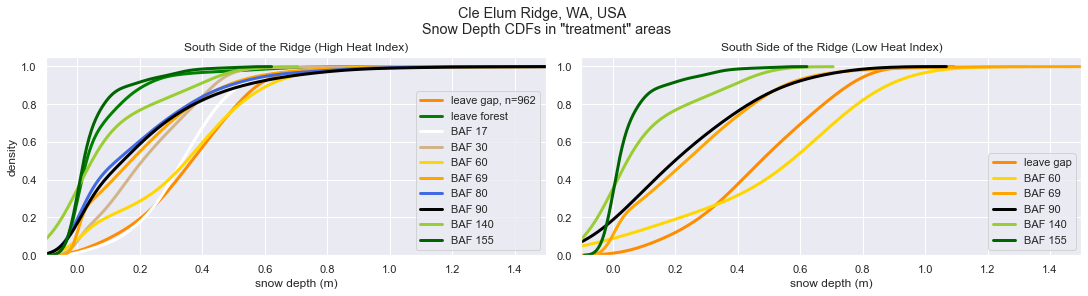

In [97]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(1, 2, sharex=True, sharey=False, figsize=(15,4), constrained_layout = True)
alpha=0.7

number1 = 1 #high heat index
number2 = -1 #low heat index

# plots
# SOUTH
sns.kdeplot(ds['hs_rapid_baf_new_1_s'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], color='darkorange', label=f'leave gap, n={np.unique(ds["hs_rapid_baf_new_1_s"]).size}', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_2_s'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], color='green', label='leave forest', cumulative=True, linewidth=3, linestyle='solid')

sns.kdeplot(ds['hs_rapid_baf_new_17_s'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], color='white', label='BAF 17', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_30_s'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], color='tan', label='BAF 30', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_32_s'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], color='white', label='BAF 32', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_38_s'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], color='lightgrey', label='BAF 38', cumulative=True, linewidth=3, linestyle='solid')

sns.kdeplot(ds['hs_rapid_baf_new_60_s'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], color='gold', label='BAF 60', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_69_s'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], color='orange', label='BAF 69', cumulative=True, linewidth=3, linestyle='solid')

sns.kdeplot(ds['hs_rapid_baf_new_80_s'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], color='royalblue', label='BAF 80', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_82_s'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], color='mediumblue', label='BAF 82', cumulative=True, linewidth=3, linestyle='solid')

sns.kdeplot(ds['hs_rapid_baf_new_90_s'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], color='black', label='BAF 90', cumulative=True, linewidth=3, linestyle='solid')
# sns.kdeplot(ds['hs_rapid_baf_new_92_s'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], color='mediumblue', label='BAF 90s', cumulative=True, linewidth=3, linestyle='solid')

sns.kdeplot(ds['hs_rapid_baf_new_140_s'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[0], color='yellowgreen', label='BAF 140', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_150_s'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[0], color='olive', label='BAF 150', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_155_s'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[0], color='darkgreen', label='BAF 155', cumulative=True, linewidth=3, linestyle='solid')

# NORTH
sns.kdeplot(ds['hs_rapid_baf_new_1_s'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], color='darkorange', label='leave gap', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_2_s'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], color='green', label='leave forest', cumulative=True, linewidth=3, linestyle='solid')

sns.kdeplot(ds['hs_rapid_baf_new_32_s'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], color='white', label='BAF 32', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_38_s'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], color='lightgrey', label='BAF 38', cumulative=True, linewidth=3, linestyle='solid')

sns.kdeplot(ds['hs_rapid_baf_new_60_s'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], color='gold', label='BAF 60', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_69_s'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], color='orange', label='BAF 69', cumulative=True, linewidth=3, linestyle='solid')

sns.kdeplot(ds['hs_rapid_baf_new_80_s'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], color='royalblue', label='BAF 80', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_82_s'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], color='mediumblue', label='BAF 82', cumulative=True, linewidth=3, linestyle='solid')

sns.kdeplot(ds['hs_rapid_baf_new_90_s'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], color='black', label='BAF 90', cumulative=True, linewidth=3, linestyle='solid')
# sns.kdeplot(ds['hs_rapid_baf_new_92_s'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], color='mediumblue', label='BAF 90s', cumulative=True, linewidth=3, linestyle='solid')

sns.kdeplot(ds['hs_rapid_baf_new_140_s'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], color='yellowgreen', label='BAF 140', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_150_s'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], color='olive', label='BAF 150 (leave forest)', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_155_s'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], color='darkgreen', label='BAF 155', cumulative=True, linewidth=3, linestyle='solid')


# labels
axes[0].set_title('South Side of the Ridge (High Heat Index)')
axes[1].set_title('South Side of the Ridge (Low Heat Index)')

axes[0].set_xlabel('snow depth (m)')
axes[1].set_xlabel('snow depth (m)')

axes[0].set_ylabel('density')
axes[1].set_ylabel('')

axes[0].set_xlim(-0.1,1.5)

plt.suptitle('Cle Elum Ridge, WA, USA \n Snow Depth CDFs in "treatment" areas')
axes[0].legend()
axes[1].legend()

plt.show()

c:\Users\Lumbr\miniconda3\envs\raster\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


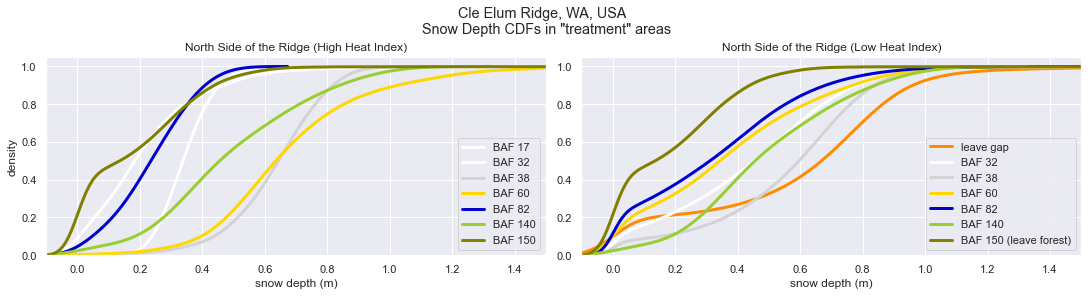

In [98]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(1, 2, sharex=True, sharey=False, figsize=(15,4), constrained_layout = True)
alpha=0.7

number1 = 1 #high heat index
number2 = -1 #low heat index

# plots
# SOUTH
sns.kdeplot(ds['hs_rapid_baf_new_1_n'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], color='darkorange', label=f'leave gap, n={np.unique(ds["hs_rapid_baf_new_1_s"]).size}', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_2_n'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], color='green', label='leave forest', cumulative=True, linewidth=3, linestyle='solid')

sns.kdeplot(ds['hs_rapid_baf_new_17_n'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], color='white', label='BAF 17', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_30_n'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], color='tan', label='BAF 30', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_32_n'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], color='white', label='BAF 32', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_38_n'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], color='lightgrey', label='BAF 38', cumulative=True, linewidth=3, linestyle='solid')

sns.kdeplot(ds['hs_rapid_baf_new_60_n'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], color='gold', label='BAF 60', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_69_n'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], color='orange', label='BAF 69', cumulative=True, linewidth=3, linestyle='solid')

sns.kdeplot(ds['hs_rapid_baf_new_80_n'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], color='royalblue', label='BAF 80', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_82_n'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], color='mediumblue', label='BAF 82', cumulative=True, linewidth=3, linestyle='solid')

sns.kdeplot(ds['hs_rapid_baf_new_90_n'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], color='black', label='BAF 90', cumulative=True, linewidth=3, linestyle='solid')
# sns.kdeplot(ds['hs_rapid_baf_new_92_n'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], color='mediumblue', label='BAF 90s', cumulative=True, linewidth=3, linestyle='solid')

sns.kdeplot(ds['hs_rapid_baf_new_140_n'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[0], color='yellowgreen', label='BAF 140', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_150_n'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[0], color='olive', label='BAF 150', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_155_n'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[0], color='darkgreen', label='BAF 155', cumulative=True, linewidth=3, linestyle='solid')

# NORTH
sns.kdeplot(ds['hs_rapid_baf_new_1_n'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], color='darkorange', label='leave gap', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_2_n'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], color='green', label='leave forest', cumulative=True, linewidth=3, linestyle='solid')

sns.kdeplot(ds['hs_rapid_baf_new_32_n'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], color='white', label='BAF 32', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_38_n'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], color='lightgrey', label='BAF 38', cumulative=True, linewidth=3, linestyle='solid')

sns.kdeplot(ds['hs_rapid_baf_new_60_n'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], color='gold', label='BAF 60', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_69_n'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], color='orange', label='BAF 69', cumulative=True, linewidth=3, linestyle='solid')

sns.kdeplot(ds['hs_rapid_baf_new_80_n'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], color='royalblue', label='BAF 80', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_82_n'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], color='mediumblue', label='BAF 82', cumulative=True, linewidth=3, linestyle='solid')

sns.kdeplot(ds['hs_rapid_baf_new_90_n'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], color='black', label='BAF 90', cumulative=True, linewidth=3, linestyle='solid')
# sns.kdeplot(ds['hs_rapid_baf_new_92_n'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], color='mediumblue', label='BAF 90s', cumulative=True, linewidth=3, linestyle='solid')

sns.kdeplot(ds['hs_rapid_baf_new_140_n'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], color='yellowgreen', label='BAF 140', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_150_n'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], color='olive', label='BAF 150 (leave forest)', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_155_n'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], color='darkgreen', label='BAF 155', cumulative=True, linewidth=3, linestyle='solid')


# labels
axes[0].set_title('North Side of the Ridge (High Heat Index)')
axes[1].set_title('North Side of the Ridge (Low Heat Index)')

axes[0].set_xlabel('snow depth (m)')
axes[1].set_xlabel('snow depth (m)')

axes[0].set_ylabel('density')
axes[1].set_ylabel('')

axes[0].set_xlim(-0.1,1.5)

plt.suptitle('Cle Elum Ridge, WA, USA \n Snow Depth CDFs in "treatment" areas')
axes[0].legend()
axes[1].legend()

plt.show()

I want to, randomly now, look at the low heat index areas of the south side of the ridge...

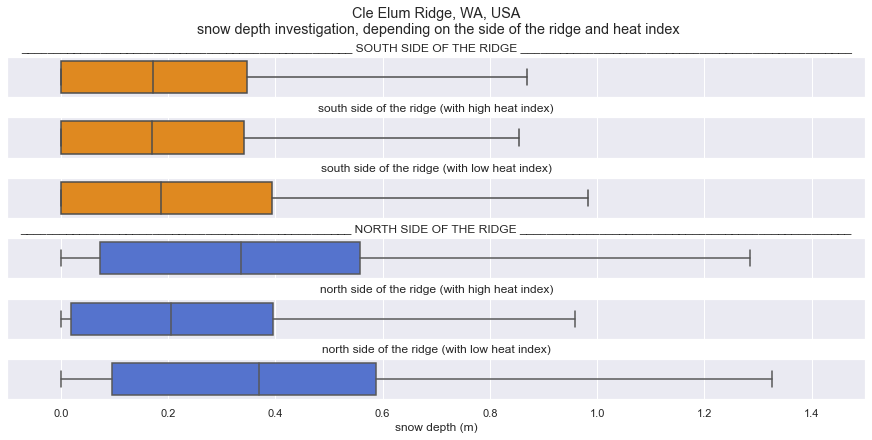

In [32]:
# adjust plot size 
fig, axes = plt.subplots(6, 1, sharex=True, sharey=False, figsize=(12,6), constrained_layout = True)
# south 
sns.boxplot(ax=axes[0], x = (ds['hs_rapid'].where(ds['baf_ridge'] ==  1)).values.flatten(), color=colorsouth, showfliers=False)
sns.boxplot(ax=axes[1], x = (ds['hs_rapid'].where((ds['baf_ridge'] ==  1) & (ds['dah_binary'] ==  1))).values.flatten(), color=colorsouth, showfliers=False)
sns.boxplot(ax=axes[2], x = (ds['hs_rapid'].where((ds['baf_ridge'] ==  1) & (ds['dah_binary'] == -1))).values.flatten(), color=colorsouth, showfliers=False)

# north 
sns.boxplot(ax=axes[3], x = (ds['hs_rapid'].where(ds['baf_ridge'] == -1)).values.flatten(), color='royalblue', showfliers=False)
sns.boxplot(ax=axes[4], x = (ds['hs_rapid'].where((ds['baf_ridge'] == -1) & (ds['dah_binary'] ==  1))).values.flatten(), color='royalblue', showfliers=False)
sns.boxplot(ax=axes[5], x = (ds['hs_rapid'].where((ds['baf_ridge'] == -1) & (ds['dah_binary'] == -1))).values.flatten(), color='royalblue', showfliers=False)


axes[0].set_title('__________________________________________________ SOUTH SIDE OF THE RIDGE __________________________________________________')

axes[1].set_title('south side of the ridge (with high heat index)')
axes[2].set_title('south side of the ridge (with low heat index)')

axes[3].set_title('__________________________________________________ NORTH SIDE OF THE RIDGE __________________________________________________')
axes[4].set_title('north side of the ridge (with high heat index)')
axes[5].set_title('north side of the ridge (with low heat index)')

plt.suptitle('Cle Elum Ridge, WA, USA\n snow depth investigation, depending on the side of the ridge and heat index')
plt.xlim(-0.1,1.5)
plt.xlabel('snow depth (m)')
plt.show()

## Plot Requested- 
Looking at is DCE represents the BAF well... 

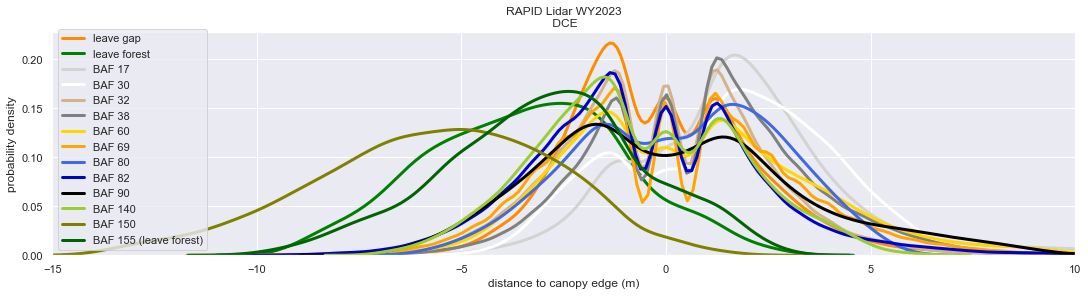

In [46]:
# we want to create a plot with DCE on the x axis, and count on the y axis, for each BAF treatment
# plot of a histogram of all those variables
fig, axes = plt.subplots(1, 1, sharex=True, sharey=False, figsize=(15,4), constrained_layout = True)
alpha=0.7

# plots
sns.kdeplot(ds['dce_rapid_baf_new_1'].values.flatten(), color='darkorange', label='leave gap', cumulative=False, linewidth=3)
sns.kdeplot(ds['dce_rapid_baf_new_2'].values.flatten(), color='green', label='leave forest', cumulative=False, linewidth=3)
sns.kdeplot(ds['dce_rapid_baf_new_17'].values.flatten(), color='lightgrey', label='BAF 17', cumulative=False, linewidth=3)
sns.kdeplot(ds['dce_rapid_baf_new_30'].values.flatten(), color='white', label='BAF 30', cumulative=False, linewidth=3)
sns.kdeplot(ds['dce_rapid_baf_new_32'].values.flatten(), color='tan', label='BAF 32', cumulative=False, linewidth=3)
sns.kdeplot(ds['dce_rapid_baf_new_38'].values.flatten(), color='grey', label='BAF 38', cumulative=False, linewidth=3)
sns.kdeplot(ds['dce_rapid_baf_new_60'].values.flatten(), color='gold', label='BAF 60', cumulative=False, linewidth=3)
sns.kdeplot(ds['dce_rapid_baf_new_69'].values.flatten(), color='orange', label='BAF 69', cumulative=False, linewidth=3)
sns.kdeplot(ds['dce_rapid_baf_new_80'].values.flatten(), color='royalblue', label='BAF 80', cumulative=False, linewidth=3)
sns.kdeplot(ds['dce_rapid_baf_new_82'].values.flatten(), color='mediumblue', label='BAF 82', cumulative=False, linewidth=3)
sns.kdeplot(ds['dce_rapid_baf_new_90'].values.flatten(), color='black', label='BAF 90', cumulative=False, linewidth=3)
sns.kdeplot(ds['dce_rapid_baf_new_140'].values.flatten(), color='yellowgreen', label='BAF 140', cumulative=False, linewidth=3)
sns.kdeplot(ds['dce_rapid_baf_new_150'].values.flatten(), color='olive', label='BAF 150', cumulative=False, linewidth=3)
sns.kdeplot(ds['dce_rapid_baf_new_155'].values.flatten(), color='darkgreen', label='BAF 155 (leave forest)', cumulative=False, linewidth=3)

# labels
plt.title('RAPID Lidar WY2023\n DCE')
plt.xlabel('distance to canopy edge (m)')
plt.ylabel('probability density')
plt.xlim(-15,10)

plt.legend()
plt.show()

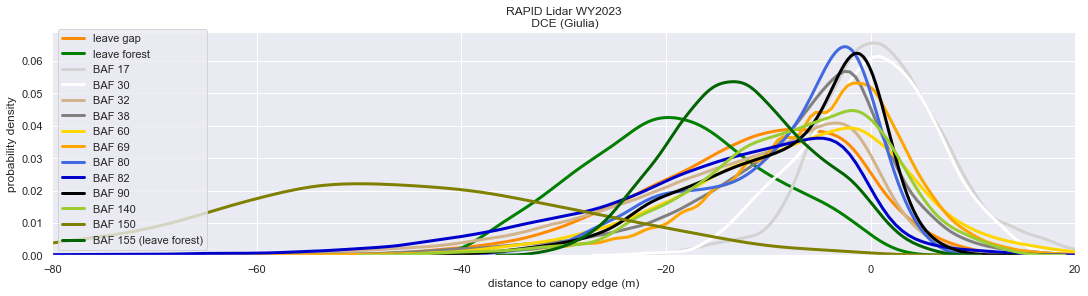

In [47]:
# we want to create a plot with DCE on the x axis, and count on the y axis, for each BAF treatment
# plot of a histogram of all those variables
fig, axes = plt.subplots(1, 1, sharex=True, sharey=False, figsize=(15,4), constrained_layout = True)
alpha=0.7

# plots
sns.kdeplot(ds['giulia_dce_rapid_baf_new_1'].values.flatten(), color='darkorange', label='leave gap', cumulative=False, linewidth=3)
sns.kdeplot(ds['giulia_dce_rapid_baf_new_2'].values.flatten(), color='green', label='leave forest', cumulative=False, linewidth=3)
sns.kdeplot(ds['giulia_dce_rapid_baf_new_17'].values.flatten(), color='lightgrey', label='BAF 17', cumulative=False, linewidth=3)
sns.kdeplot(ds['giulia_dce_rapid_baf_new_30'].values.flatten(), color='white', label='BAF 30', cumulative=False, linewidth=3)
sns.kdeplot(ds['giulia_dce_rapid_baf_new_32'].values.flatten(), color='tan', label='BAF 32', cumulative=False, linewidth=3)
sns.kdeplot(ds['giulia_dce_rapid_baf_new_38'].values.flatten(), color='grey', label='BAF 38', cumulative=False, linewidth=3)
sns.kdeplot(ds['giulia_dce_rapid_baf_new_60'].values.flatten(), color='gold', label='BAF 60', cumulative=False, linewidth=3)
sns.kdeplot(ds['giulia_dce_rapid_baf_new_69'].values.flatten(), color='orange', label='BAF 69', cumulative=False, linewidth=3)
sns.kdeplot(ds['giulia_dce_rapid_baf_new_80'].values.flatten(), color='royalblue', label='BAF 80', cumulative=False, linewidth=3)
sns.kdeplot(ds['giulia_dce_rapid_baf_new_82'].values.flatten(), color='mediumblue', label='BAF 82', cumulative=False, linewidth=3)
sns.kdeplot(ds['giulia_dce_rapid_baf_new_90'].values.flatten(), color='black', label='BAF 90', cumulative=False, linewidth=3)
sns.kdeplot(ds['giulia_dce_rapid_baf_new_140'].values.flatten(), color='yellowgreen', label='BAF 140', cumulative=False, linewidth=3)
sns.kdeplot(ds['giulia_dce_rapid_baf_new_150'].values.flatten(), color='olive', label='BAF 150', cumulative=False, linewidth=3)
sns.kdeplot(ds['giulia_dce_rapid_baf_new_155'].values.flatten(), color='darkgreen', label='BAF 155 (leave forest)', cumulative=False, linewidth=3)

# labels
plt.title('RAPID Lidar WY2023\n DCE (Giulia)')
plt.xlabel('distance to canopy edge (m)')
plt.ylabel('probability density')
plt.xlim(-80,20)

plt.legend()
plt.show()

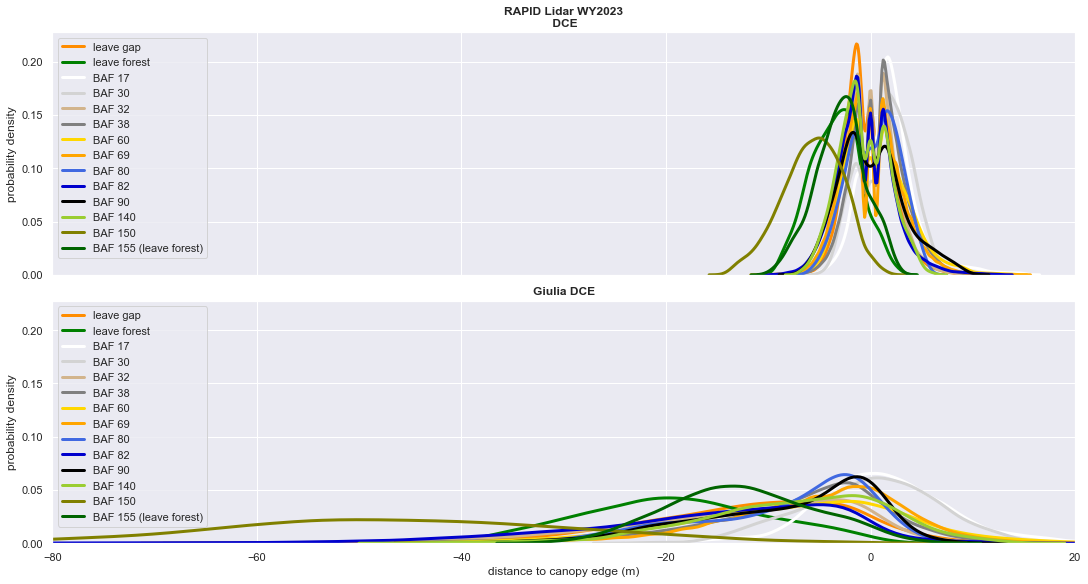

In [72]:
# we want to create a plot with DCE on the x axis, and count on the y axis, for each BAF treatment
# plot of a histogram of all those variables
fig, axes = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(15,8), constrained_layout = True)
alpha=0.7

# plots
sns.kdeplot(ds['dce_rapid_baf_new_1'].values.flatten(), ax=axes[0], color='darkorange', label='leave gap', cumulative=False, linewidth=3)
sns.kdeplot(ds['dce_rapid_baf_new_2'].values.flatten(), ax=axes[0], color='green', label='leave forest', cumulative=False, linewidth=3)
sns.kdeplot(ds['dce_rapid_baf_new_17'].values.flatten(), ax=axes[0], color='white', label='BAF 17', cumulative=False, linewidth=3)
sns.kdeplot(ds['dce_rapid_baf_new_30'].values.flatten(), ax=axes[0], color='lightgrey', label='BAF 30', cumulative=False, linewidth=3)
sns.kdeplot(ds['dce_rapid_baf_new_32'].values.flatten(), ax=axes[0], color='tan', label='BAF 32', cumulative=False, linewidth=3)
sns.kdeplot(ds['dce_rapid_baf_new_38'].values.flatten(), ax=axes[0], color='grey', label='BAF 38', cumulative=False, linewidth=3)
sns.kdeplot(ds['dce_rapid_baf_new_60'].values.flatten(), ax=axes[0], color='gold', label='BAF 60', cumulative=False, linewidth=3)
sns.kdeplot(ds['dce_rapid_baf_new_69'].values.flatten(), ax=axes[0], color='orange', label='BAF 69', cumulative=False, linewidth=3)
sns.kdeplot(ds['dce_rapid_baf_new_80'].values.flatten(), ax=axes[0], color='royalblue', label='BAF 80', cumulative=False, linewidth=3)
sns.kdeplot(ds['dce_rapid_baf_new_82'].values.flatten(), ax=axes[0], color='mediumblue', label='BAF 82', cumulative=False, linewidth=3)
sns.kdeplot(ds['dce_rapid_baf_new_90'].values.flatten(), ax=axes[0], color='black', label='BAF 90', cumulative=False, linewidth=3)
sns.kdeplot(ds['dce_rapid_baf_new_140'].values.flatten(), ax=axes[0], color='yellowgreen', label='BAF 140', cumulative=False, linewidth=3)
sns.kdeplot(ds['dce_rapid_baf_new_150'].values.flatten(), ax=axes[0], color='olive', label='BAF 150', cumulative=False, linewidth=3)
sns.kdeplot(ds['dce_rapid_baf_new_155'].values.flatten(), ax=axes[0], color='darkgreen', label='BAF 155 (leave forest)', cumulative=False, linewidth=3)

# plots
sns.kdeplot(ds['giulia_dce_rapid_baf_new_1'].values.flatten(), ax=axes[1], color='darkorange', label='leave gap', cumulative=False, linewidth=3)
sns.kdeplot(ds['giulia_dce_rapid_baf_new_2'].values.flatten(), ax=axes[1], color='green', label='leave forest', cumulative=False, linewidth=3)
sns.kdeplot(ds['giulia_dce_rapid_baf_new_17'].values.flatten(), ax=axes[1], color='white', label='BAF 17', cumulative=False, linewidth=3)
sns.kdeplot(ds['giulia_dce_rapid_baf_new_30'].values.flatten(), ax=axes[1], color='lightgrey', label='BAF 30', cumulative=False, linewidth=3)
sns.kdeplot(ds['giulia_dce_rapid_baf_new_32'].values.flatten(), ax=axes[1], color='tan', label='BAF 32', cumulative=False, linewidth=3)
sns.kdeplot(ds['giulia_dce_rapid_baf_new_38'].values.flatten(), ax=axes[1], color='grey', label='BAF 38', cumulative=False, linewidth=3)
sns.kdeplot(ds['giulia_dce_rapid_baf_new_60'].values.flatten(), ax=axes[1], color='gold', label='BAF 60', cumulative=False, linewidth=3)
sns.kdeplot(ds['giulia_dce_rapid_baf_new_69'].values.flatten(), ax=axes[1], color='orange', label='BAF 69', cumulative=False, linewidth=3)
sns.kdeplot(ds['giulia_dce_rapid_baf_new_80'].values.flatten(), ax=axes[1], color='royalblue', label='BAF 80', cumulative=False, linewidth=3)
sns.kdeplot(ds['giulia_dce_rapid_baf_new_82'].values.flatten(), ax=axes[1], color='mediumblue', label='BAF 82', cumulative=False, linewidth=3)
sns.kdeplot(ds['giulia_dce_rapid_baf_new_90'].values.flatten(), ax=axes[1], color='black', label='BAF 90', cumulative=False, linewidth=3)
sns.kdeplot(ds['giulia_dce_rapid_baf_new_140'].values.flatten(), ax=axes[1], color='yellowgreen', label='BAF 140', cumulative=False, linewidth=3)
sns.kdeplot(ds['giulia_dce_rapid_baf_new_150'].values.flatten(), ax=axes[1], color='olive', label='BAF 150', cumulative=False, linewidth=3)
sns.kdeplot(ds['giulia_dce_rapid_baf_new_155'].values.flatten(), ax=axes[1], color='darkgreen', label='BAF 155 (leave forest)', cumulative=False, linewidth=3)

# labels
axes[0].set_title('RAPID Lidar WY2023\n DCE', weight='bold')
axes[1].set_title('Giulia DCE', weight='bold')
axes[0].set_xlabel('distance to canopy edge (m)')
axes[1].set_xlabel('distance to canopy edge (m)')
axes[0].set_ylabel('probability density')
axes[1].set_ylabel('probability density')
# plt.xlim(-15,10)

axes[0].set_xlim(-15,10)
axes[1].set_xlim(-80,20)

# set the legend
axes[0].legend()
axes[1].legend()
plt.show()

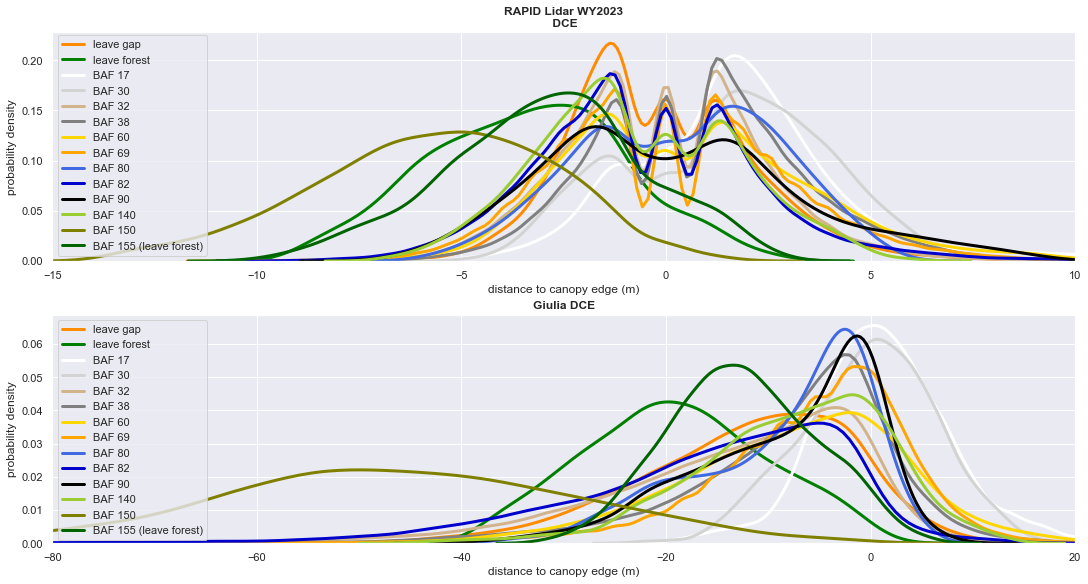

In [48]:
# we want to create a plot with DCE on the x axis, and count on the y axis, for each BAF treatment
# plot of a histogram of all those variables
fig, axes = plt.subplots(2, 1, sharex=False, sharey=False, figsize=(15,8), constrained_layout = True)
alpha=0.7

# plots
sns.kdeplot(ds['dce_rapid_baf_new_1'].values.flatten(), ax=axes[0], color='darkorange', label='leave gap', cumulative=False, linewidth=3)
sns.kdeplot(ds['dce_rapid_baf_new_2'].values.flatten(), ax=axes[0], color='green', label='leave forest', cumulative=False, linewidth=3)
sns.kdeplot(ds['dce_rapid_baf_new_17'].values.flatten(), ax=axes[0], color='white', label='BAF 17', cumulative=False, linewidth=3)
sns.kdeplot(ds['dce_rapid_baf_new_30'].values.flatten(), ax=axes[0], color='lightgrey', label='BAF 30', cumulative=False, linewidth=3)
sns.kdeplot(ds['dce_rapid_baf_new_32'].values.flatten(), ax=axes[0], color='tan', label='BAF 32', cumulative=False, linewidth=3)
sns.kdeplot(ds['dce_rapid_baf_new_38'].values.flatten(), ax=axes[0], color='grey', label='BAF 38', cumulative=False, linewidth=3)
sns.kdeplot(ds['dce_rapid_baf_new_60'].values.flatten(), ax=axes[0], color='gold', label='BAF 60', cumulative=False, linewidth=3)
sns.kdeplot(ds['dce_rapid_baf_new_69'].values.flatten(), ax=axes[0], color='orange', label='BAF 69', cumulative=False, linewidth=3)
sns.kdeplot(ds['dce_rapid_baf_new_80'].values.flatten(), ax=axes[0], color='royalblue', label='BAF 80', cumulative=False, linewidth=3)
sns.kdeplot(ds['dce_rapid_baf_new_82'].values.flatten(), ax=axes[0], color='mediumblue', label='BAF 82', cumulative=False, linewidth=3)
sns.kdeplot(ds['dce_rapid_baf_new_90'].values.flatten(), ax=axes[0], color='black', label='BAF 90', cumulative=False, linewidth=3)
sns.kdeplot(ds['dce_rapid_baf_new_140'].values.flatten(), ax=axes[0], color='yellowgreen', label='BAF 140', cumulative=False, linewidth=3)
sns.kdeplot(ds['dce_rapid_baf_new_150'].values.flatten(), ax=axes[0], color='olive', label='BAF 150', cumulative=False, linewidth=3)
sns.kdeplot(ds['dce_rapid_baf_new_155'].values.flatten(), ax=axes[0], color='darkgreen', label='BAF 155 (leave forest)', cumulative=False, linewidth=3)

# plots
sns.kdeplot(ds['giulia_dce_rapid_baf_new_1'].values.flatten(), ax=axes[1], color='darkorange', label='leave gap', cumulative=False, linewidth=3)
sns.kdeplot(ds['giulia_dce_rapid_baf_new_2'].values.flatten(), ax=axes[1], color='green', label='leave forest', cumulative=False, linewidth=3)
sns.kdeplot(ds['giulia_dce_rapid_baf_new_17'].values.flatten(), ax=axes[1], color='white', label='BAF 17', cumulative=False, linewidth=3)
sns.kdeplot(ds['giulia_dce_rapid_baf_new_30'].values.flatten(), ax=axes[1], color='lightgrey', label='BAF 30', cumulative=False, linewidth=3)
sns.kdeplot(ds['giulia_dce_rapid_baf_new_32'].values.flatten(), ax=axes[1], color='tan', label='BAF 32', cumulative=False, linewidth=3)
sns.kdeplot(ds['giulia_dce_rapid_baf_new_38'].values.flatten(), ax=axes[1], color='grey', label='BAF 38', cumulative=False, linewidth=3)
sns.kdeplot(ds['giulia_dce_rapid_baf_new_60'].values.flatten(), ax=axes[1], color='gold', label='BAF 60', cumulative=False, linewidth=3)
sns.kdeplot(ds['giulia_dce_rapid_baf_new_69'].values.flatten(), ax=axes[1], color='orange', label='BAF 69', cumulative=False, linewidth=3)
sns.kdeplot(ds['giulia_dce_rapid_baf_new_80'].values.flatten(), ax=axes[1], color='royalblue', label='BAF 80', cumulative=False, linewidth=3)
sns.kdeplot(ds['giulia_dce_rapid_baf_new_82'].values.flatten(), ax=axes[1], color='mediumblue', label='BAF 82', cumulative=False, linewidth=3)
sns.kdeplot(ds['giulia_dce_rapid_baf_new_90'].values.flatten(), ax=axes[1], color='black', label='BAF 90', cumulative=False, linewidth=3)
sns.kdeplot(ds['giulia_dce_rapid_baf_new_140'].values.flatten(), ax=axes[1], color='yellowgreen', label='BAF 140', cumulative=False, linewidth=3)
sns.kdeplot(ds['giulia_dce_rapid_baf_new_150'].values.flatten(), ax=axes[1], color='olive', label='BAF 150', cumulative=False, linewidth=3)
sns.kdeplot(ds['giulia_dce_rapid_baf_new_155'].values.flatten(), ax=axes[1], color='darkgreen', label='BAF 155 (leave forest)', cumulative=False, linewidth=3)

# labels
axes[0].set_title('RAPID Lidar WY2023\n DCE', weight='bold')
axes[1].set_title('Giulia DCE', weight='bold')
axes[0].set_xlabel('distance to canopy edge (m)')
axes[1].set_xlabel('distance to canopy edge (m)')
axes[0].set_ylabel('probability density')
axes[1].set_ylabel('probability density')
# plt.xlim(-15,10)

axes[0].set_xlim(-15,10)
axes[1].set_xlim(-80,20)

# set the legend
axes[0].legend()
axes[1].legend()
plt.show()

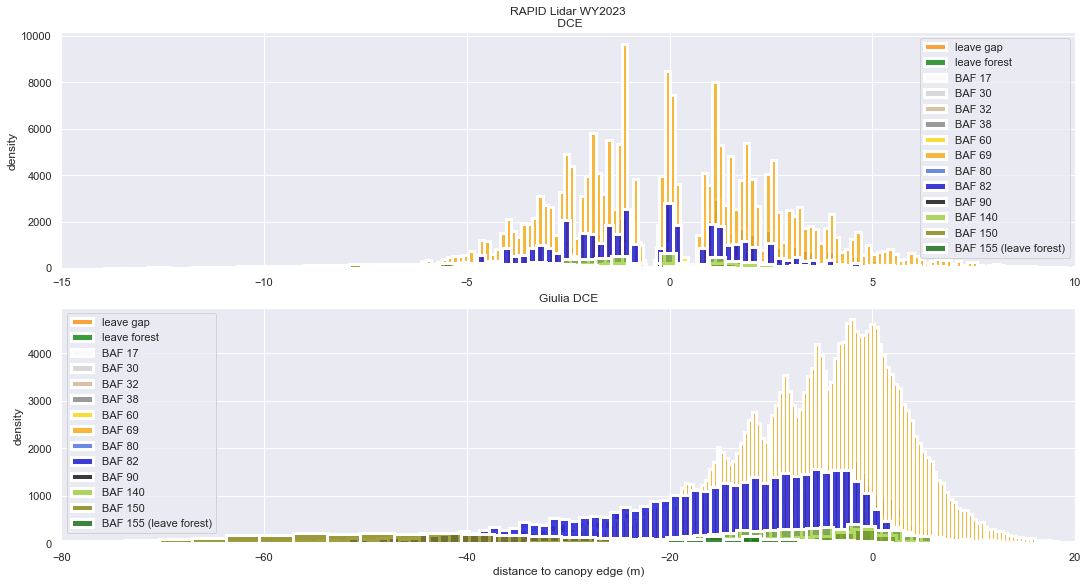

In [49]:
# we want to create a plot with DCE on the x axis, and count on the y axis, for each BAF treatment
# plot of a histogram of all those variables
fig, axes = plt.subplots(2, 1, sharex=False, sharey=False, figsize=(15,8), constrained_layout = True)
alpha=0.7

# plots
sns.histplot(ds['dce_rapid_baf_new_1'].values.flatten(), ax=axes[0], color='darkorange', label='leave gap', cumulative=False, linewidth=3)
sns.histplot(ds['dce_rapid_baf_new_2'].values.flatten(), ax=axes[0], color='green', label='leave forest', cumulative=False, linewidth=3)
sns.histplot(ds['dce_rapid_baf_new_17'].values.flatten(), ax=axes[0], color='white', label='BAF 17', cumulative=False, linewidth=3)
sns.histplot(ds['dce_rapid_baf_new_30'].values.flatten(), ax=axes[0], color='lightgrey', label='BAF 30', cumulative=False, linewidth=3)
sns.histplot(ds['dce_rapid_baf_new_32'].values.flatten(), ax=axes[0], color='tan', label='BAF 32', cumulative=False, linewidth=3)
sns.histplot(ds['dce_rapid_baf_new_38'].values.flatten(), ax=axes[0], color='grey', label='BAF 38', cumulative=False, linewidth=3)
sns.histplot(ds['dce_rapid_baf_new_60'].values.flatten(), ax=axes[0], color='gold', label='BAF 60', cumulative=False, linewidth=3)
sns.histplot(ds['dce_rapid_baf_new_69'].values.flatten(), ax=axes[0], color='orange', label='BAF 69', cumulative=False, linewidth=3)
sns.histplot(ds['dce_rapid_baf_new_80'].values.flatten(), ax=axes[0], color='royalblue', label='BAF 80', cumulative=False, linewidth=3)
sns.histplot(ds['dce_rapid_baf_new_82'].values.flatten(), ax=axes[0], color='mediumblue', label='BAF 82', cumulative=False, linewidth=3)
sns.histplot(ds['dce_rapid_baf_new_90'].values.flatten(), ax=axes[0], color='black', label='BAF 90', cumulative=False, linewidth=3)
sns.histplot(ds['dce_rapid_baf_new_140'].values.flatten(), ax=axes[0], color='yellowgreen', label='BAF 140', cumulative=False, linewidth=3)
sns.histplot(ds['dce_rapid_baf_new_150'].values.flatten(), ax=axes[0], color='olive', label='BAF 150', cumulative=False, linewidth=3)
sns.histplot(ds['dce_rapid_baf_new_155'].values.flatten(), ax=axes[0], color='darkgreen', label='BAF 155 (leave forest)', cumulative=False, linewidth=3)

# plots
sns.histplot(ds['giulia_dce_rapid_baf_new_1'].values.flatten(), ax=axes[1], color='darkorange', label='leave gap', cumulative=False, linewidth=3)
sns.histplot(ds['giulia_dce_rapid_baf_new_2'].values.flatten(), ax=axes[1], color='green', label='leave forest', cumulative=False, linewidth=3)
sns.histplot(ds['giulia_dce_rapid_baf_new_17'].values.flatten(), ax=axes[1], color='white', label='BAF 17', cumulative=False, linewidth=3)
sns.histplot(ds['giulia_dce_rapid_baf_new_30'].values.flatten(), ax=axes[1], color='lightgrey', label='BAF 30', cumulative=False, linewidth=3)
sns.histplot(ds['giulia_dce_rapid_baf_new_32'].values.flatten(), ax=axes[1], color='tan', label='BAF 32', cumulative=False, linewidth=3)
sns.histplot(ds['giulia_dce_rapid_baf_new_38'].values.flatten(), ax=axes[1], color='grey', label='BAF 38', cumulative=False, linewidth=3)
sns.histplot(ds['giulia_dce_rapid_baf_new_60'].values.flatten(), ax=axes[1], color='gold', label='BAF 60', cumulative=False, linewidth=3)
sns.histplot(ds['giulia_dce_rapid_baf_new_69'].values.flatten(), ax=axes[1], color='orange', label='BAF 69', cumulative=False, linewidth=3)
sns.histplot(ds['giulia_dce_rapid_baf_new_80'].values.flatten(), ax=axes[1], color='royalblue', label='BAF 80', cumulative=False, linewidth=3)
sns.histplot(ds['giulia_dce_rapid_baf_new_82'].values.flatten(), ax=axes[1], color='mediumblue', label='BAF 82', cumulative=False, linewidth=3)
sns.histplot(ds['giulia_dce_rapid_baf_new_90'].values.flatten(), ax=axes[1], color='black', label='BAF 90', cumulative=False, linewidth=3)
sns.histplot(ds['giulia_dce_rapid_baf_new_140'].values.flatten(), ax=axes[1], color='yellowgreen', label='BAF 140', cumulative=False, linewidth=3)
sns.histplot(ds['giulia_dce_rapid_baf_new_150'].values.flatten(), ax=axes[1], color='olive', label='BAF 150', cumulative=False, linewidth=3)
sns.histplot(ds['giulia_dce_rapid_baf_new_155'].values.flatten(), ax=axes[1], color='darkgreen', label='BAF 155 (leave forest)', cumulative=False, linewidth=3)

# labels
axes[0].set_title('RAPID Lidar WY2023\n DCE')
axes[1].set_title('Giulia DCE')
axes[0].set_xlabel('')
axes[1].set_xlabel('distance to canopy edge (m)')
axes[0].set_ylabel('density')
axes[1].set_ylabel('density')
# plt.xlim(-15,10)

axes[0].set_xlim(-15,10)
axes[1].set_xlim(-80,20)

# set the legend
axes[0].legend()
axes[1].legend()
plt.show()

### Snow depth CDFs by DCE groups for north and south sides of the ridge

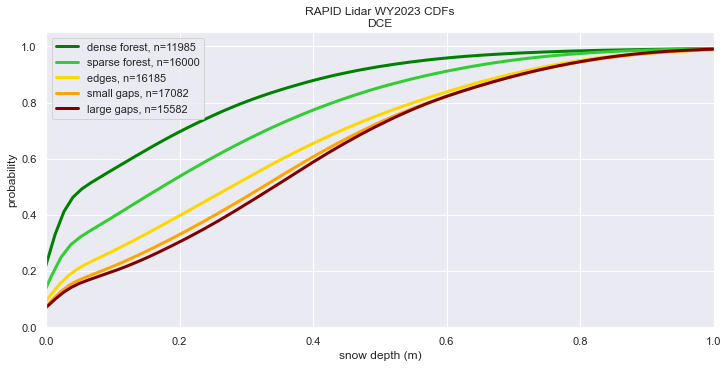

In [73]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(sharex=True, sharey=True, figsize=(10,5), constrained_layout = True)

# plots
sns.kdeplot(ds['hs_dce_rapid_reclass_100'].values.flatten(), color='green', label=f'dense forest, n={np.unique(ds["hs_dce_rapid_reclass_100"]).size}', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_200'].values.flatten(), color='limegreen', label=f'sparse forest, n={np.unique(ds["hs_dce_rapid_reclass_200"]).size}', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_300'].values.flatten(), color='gold', label=f'edges, n={np.unique(ds["hs_dce_rapid_reclass_300"]).size}', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_400'].values.flatten(), color='orange', label=f'small gaps, n={np.unique(ds["hs_dce_rapid_reclass_400"]).size}', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_500'].values.flatten(), color='maroon', label=f'large gaps, n={np.unique(ds["hs_dce_rapid_reclass_500"]).size}', cumulative=True, linewidth=3)

# labels
plt.title('RAPID Lidar WY2023 CDFs\nDCE')
plt.xlabel('snow depth (m)')
plt.ylabel('probability')
plt.xlim(0,1)
# plt.xlim(-0.1,1.2)

plt.legend()
plt.show()

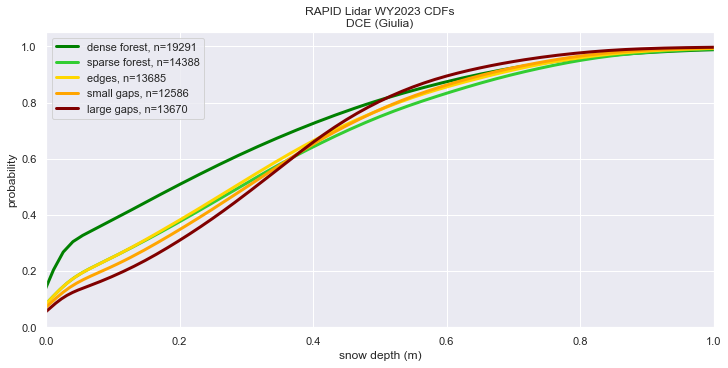

In [51]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(sharex=True, sharey=True, figsize=(10,5), constrained_layout = True)

# plots
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_100'].values.flatten(), color='green', label=f'dense forest, n={np.unique(ds["hs_giulia_dce_rapid_reclass_100"]).size}', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_200'].values.flatten(), color='limegreen', label=f'sparse forest, n={np.unique(ds["hs_giulia_dce_rapid_reclass_200"]).size}', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_300'].values.flatten(), color='gold', label=f'edges, n={np.unique(ds["hs_giulia_dce_rapid_reclass_300"]).size}', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_400'].values.flatten(), color='orange', label=f'small gaps, n={np.unique(ds["hs_giulia_dce_rapid_reclass_400"]).size}', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_500'].values.flatten(), color='maroon', label=f'large gaps, n={np.unique(ds["hs_giulia_dce_rapid_reclass_500"]).size}', cumulative=True, linewidth=3)

# labels
plt.title('RAPID Lidar WY2023 CDFs\nDCE (Giulia)')
plt.xlabel('snow depth (m)')
plt.ylabel('probability')
plt.xlim(0,1)
# plt.xlim(-0.1,1.2)

plt.legend()
plt.show()

The same plot, but by side of the ridge

Make this plot, but put south and north into two different plots

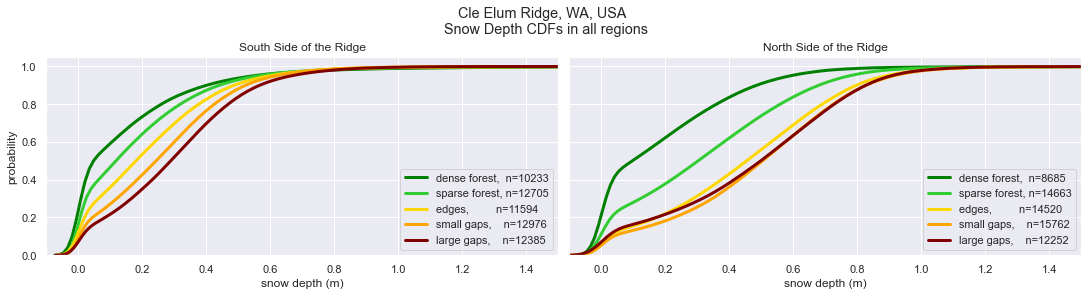

In [52]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15,4), constrained_layout = True)
alpha=0.7


# plots
sns.kdeplot(ds['hs_dce_rapid_reclass_100_s'].values.flatten(), ax=axes[0], color='green',     label=f'dense forest,  n={np.unique(ds["hs_dce_rapid_reclass_100_s"]).size}', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_200_s'].values.flatten(), ax=axes[0], color='limegreen', label=f'sparse forest, n={np.unique(ds["hs_dce_rapid_reclass_200_s"]).size}', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_300_s'].values.flatten(), ax=axes[0], color='gold',      label=f'edges,         n={np.unique(ds["hs_dce_rapid_reclass_300_s"]).size}', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_400_s'].values.flatten(), ax=axes[0], color='orange',    label=f'small gaps,    n={np.unique(ds["hs_dce_rapid_reclass_400_s"]).size}', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_500_s'].values.flatten(), ax=axes[0], color='maroon',    label=f'large gaps,    n={np.unique(ds["hs_dce_rapid_reclass_500_s"]).size}', cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_dce_rapid_reclass_100_n'].values.flatten(), ax=axes[1], color='green',     label=f'dense forest,  n={np.unique(ds["hs_dce_rapid_reclass_100_n"]).size}', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_200_n'].values.flatten(), ax=axes[1], color='limegreen', label=f'sparse forest, n={np.unique(ds["hs_dce_rapid_reclass_200_n"]).size}', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_300_n'].values.flatten(), ax=axes[1], color='gold',      label=f'edges,         n={np.unique(ds["hs_dce_rapid_reclass_300_n"]).size}', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_400_n'].values.flatten(), ax=axes[1], color='orange',    label=f'small gaps,    n={np.unique(ds["hs_dce_rapid_reclass_400_n"]).size}', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_500_n'].values.flatten(), ax=axes[1], color='maroon',    label=f'large gaps,    n={np.unique(ds["hs_dce_rapid_reclass_500_n"]).size}', cumulative=True, linewidth=3)


# labels
axes[0].set_title('South Side of the Ridge')
axes[1].set_title('North Side of the Ridge')

axes[0].set_xlabel('snow depth (m)')
axes[1].set_xlabel('snow depth (m)')

axes[0].set_ylabel('probability')
axes[1].set_ylabel('')

axes[0].set_xlim(-0.1,1.5)

plt.suptitle('Cle Elum Ridge, WA, USA \n Snow Depth CDFs in all regions')
axes[0].legend()
axes[1].legend()
plt.show()

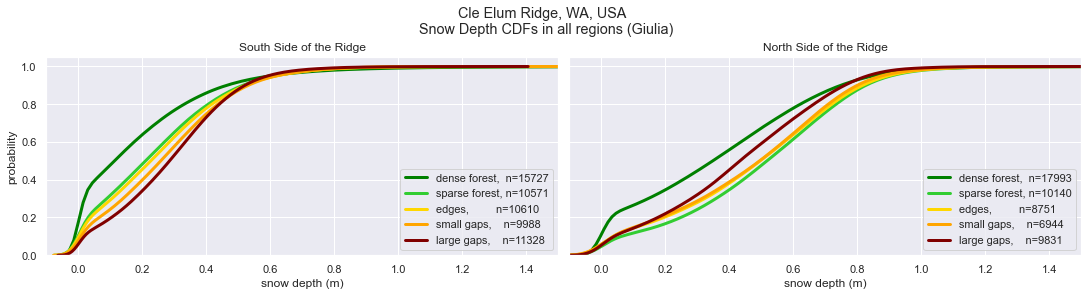

In [53]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15,4), constrained_layout = True)
alpha=0.7

# plots
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_100_s'].values.flatten(), ax=axes[0], color='green',     label=f'dense forest,  n={np.unique(ds["hs_giulia_dce_rapid_reclass_100_s"]).size}', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_200_s'].values.flatten(), ax=axes[0], color='limegreen', label=f'sparse forest, n={np.unique(ds["hs_giulia_dce_rapid_reclass_200_s"]).size}', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_300_s'].values.flatten(), ax=axes[0], color='gold',      label=f'edges,         n={np.unique(ds["hs_giulia_dce_rapid_reclass_300_s"]).size}', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_400_s'].values.flatten(), ax=axes[0], color='orange',    label=f'small gaps,    n={np.unique(ds["hs_giulia_dce_rapid_reclass_400_s"]).size}', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_500_s'].values.flatten(), ax=axes[0], color='maroon',    label=f'large gaps,    n={np.unique(ds["hs_giulia_dce_rapid_reclass_500_s"]).size}', cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_100_n'].values.flatten(), ax=axes[1], color='green',     label=f'dense forest,  n={np.unique(ds["hs_giulia_dce_rapid_reclass_100_n"]).size}', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_200_n'].values.flatten(), ax=axes[1], color='limegreen', label=f'sparse forest, n={np.unique(ds["hs_giulia_dce_rapid_reclass_200_n"]).size}', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_300_n'].values.flatten(), ax=axes[1], color='gold',      label=f'edges,         n={np.unique(ds["hs_giulia_dce_rapid_reclass_300_n"]).size}', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_400_n'].values.flatten(), ax=axes[1], color='orange',    label=f'small gaps,    n={np.unique(ds["hs_giulia_dce_rapid_reclass_400_n"]).size}', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_500_n'].values.flatten(), ax=axes[1], color='maroon',    label=f'large gaps,    n={np.unique(ds["hs_giulia_dce_rapid_reclass_500_n"]).size}', cumulative=True, linewidth=3)

# labels
axes[0].set_title('South Side of the Ridge')
axes[1].set_title('North Side of the Ridge')

axes[0].set_xlabel('snow depth (m)')
axes[1].set_xlabel('snow depth (m)')

axes[0].set_ylabel('probability')
axes[1].set_ylabel('')

axes[0].set_xlim(-0.1,1.5)

plt.suptitle('Cle Elum Ridge, WA, USA \n Snow Depth CDFs in all regions (Giulia)')
axes[0].legend(loc='lower right')
axes[1].legend(loc='lower right')
plt.show()

Now, let's make this for only the south side with high and low heat index (north too). so break up each my heat index as a secondary factor. 

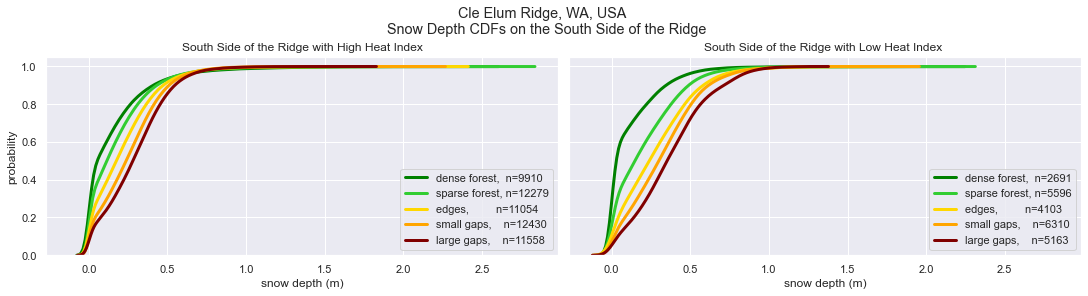

In [78]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15,4), constrained_layout = True)
alpha=0.7

number1 =  1 # high heat index
number2 = -1 # low heat index 
plt.suptitle('Cle Elum Ridge, WA, USA \n Snow Depth CDFs on the South Side of the Ridge')

# plots
sns.kdeplot(ds['hs_dce_rapid_reclass_100_s'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], label=f'dense forest,  n={np.unique(ds["hs_dce_rapid_reclass_100_s"].where(ds["dah_binary"] == number1)).size}',  color='green',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_200_s'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], label=f'sparse forest, n={np.unique(ds["hs_dce_rapid_reclass_200_s"].where(ds["dah_binary"] == number1)).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_300_s'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], label=f'edges,         n={np.unique(ds["hs_dce_rapid_reclass_300_s"].where(ds["dah_binary"] == number1)).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_400_s'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], label=f'small gaps,    n={np.unique(ds["hs_dce_rapid_reclass_400_s"].where(ds["dah_binary"] == number1)).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_500_s'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], label=f'large gaps,    n={np.unique(ds["hs_dce_rapid_reclass_500_s"].where(ds["dah_binary"] == number1)).size}', color='maroon',   cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_dce_rapid_reclass_100_s'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], label=f'dense forest,  n={np.unique(ds["hs_dce_rapid_reclass_100_s"].where(ds["dah_binary"] == number2)).size}',  color='green',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_200_s'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], label=f'sparse forest, n={np.unique(ds["hs_dce_rapid_reclass_200_s"].where(ds["dah_binary"] == number2)).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_300_s'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], label=f'edges,         n={np.unique(ds["hs_dce_rapid_reclass_300_s"].where(ds["dah_binary"] == number2)).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_400_s'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], label=f'small gaps,    n={np.unique(ds["hs_dce_rapid_reclass_400_s"].where(ds["dah_binary"] == number2)).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_500_s'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], label=f'large gaps,    n={np.unique(ds["hs_dce_rapid_reclass_500_s"].where(ds["dah_binary"] == number2)).size}', color='maroon',   cumulative=True, linewidth=3)


# labels
axes[0].set_title('South Side of the Ridge with High Heat Index')
axes[1].set_title('South Side of the Ridge with Low Heat Index ')

axes[0].set_xlabel('snow depth (m)')
axes[1].set_xlabel('snow depth (m)')

axes[0].set_ylabel('probability')
axes[1].set_ylabel('')

axes[0].legend(loc='lower right')
axes[1].legend(loc='lower right')
plt.show()

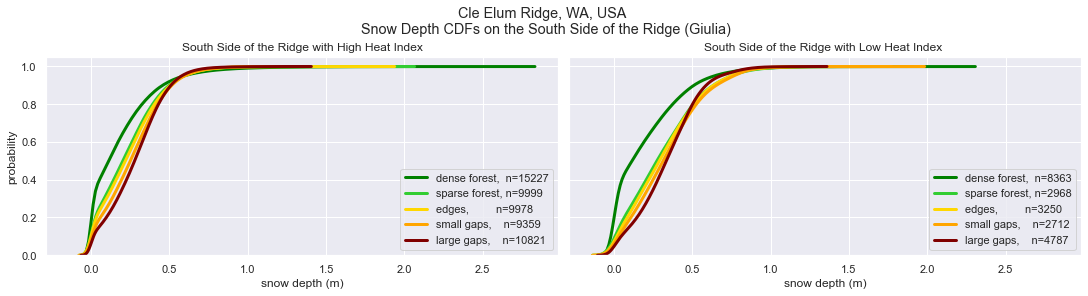

In [80]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15,4), constrained_layout = True)
alpha=0.7

number1 =  1 # high heat index
number2 = -1 # low heat index 
plt.suptitle('Cle Elum Ridge, WA, USA \n Snow Depth CDFs on the South Side of the Ridge (Giulia)')

# plots
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_100_s'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], label=f'dense forest,  n={np.unique(ds["hs_giulia_dce_rapid_reclass_100_s"].where(ds["dah_binary"] == number1)).size}',  color='green',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_200_s'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], label=f'sparse forest, n={np.unique(ds["hs_giulia_dce_rapid_reclass_200_s"].where(ds["dah_binary"] == number1)).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_300_s'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], label=f'edges,         n={np.unique(ds["hs_giulia_dce_rapid_reclass_300_s"].where(ds["dah_binary"] == number1)).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_400_s'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], label=f'small gaps,    n={np.unique(ds["hs_giulia_dce_rapid_reclass_400_s"].where(ds["dah_binary"] == number1)).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_500_s'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], label=f'large gaps,    n={np.unique(ds["hs_giulia_dce_rapid_reclass_500_s"].where(ds["dah_binary"] == number1)).size}', color='maroon',   cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_100_s'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], label=f'dense forest,  n={np.unique(ds["hs_giulia_dce_rapid_reclass_100_s"].where(ds["dah_binary"] == number2)).size}',  color='green',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_200_s'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], label=f'sparse forest, n={np.unique(ds["hs_giulia_dce_rapid_reclass_200_s"].where(ds["dah_binary"] == number2)).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_300_s'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], label=f'edges,         n={np.unique(ds["hs_giulia_dce_rapid_reclass_300_s"].where(ds["dah_binary"] == number2)).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_400_s'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], label=f'small gaps,    n={np.unique(ds["hs_giulia_dce_rapid_reclass_400_s"].where(ds["dah_binary"] == number2)).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_500_s'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], label=f'large gaps,    n={np.unique(ds["hs_giulia_dce_rapid_reclass_500_s"].where(ds["dah_binary"] == number2)).size}', color='maroon',   cumulative=True, linewidth=3)


# labels
axes[0].set_title('South Side of the Ridge with High Heat Index')
axes[1].set_title('South Side of the Ridge with Low Heat Index ')

axes[0].set_xlabel('snow depth (m)')
axes[1].set_xlabel('snow depth (m)')

axes[0].set_ylabel('probability')
axes[1].set_ylabel('')

axes[0].legend(loc='lower right')
axes[1].legend(loc='lower right')
plt.show()

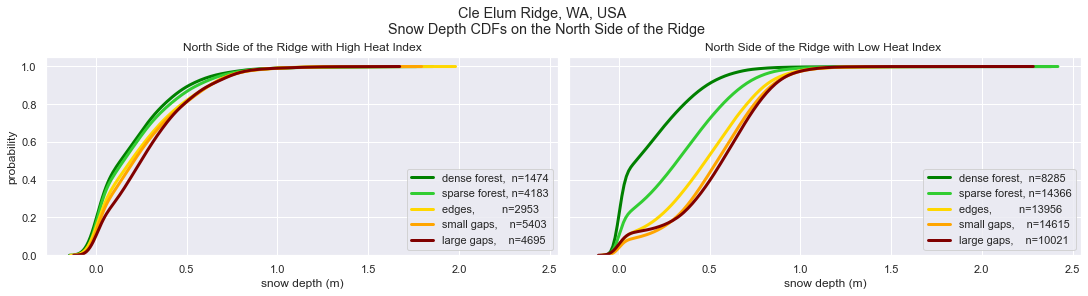

In [79]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15,4), constrained_layout = True)
alpha=0.7

number1 =  1 # high heat index
number2 = -1 # low heat index 
plt.suptitle('Cle Elum Ridge, WA, USA \n Snow Depth CDFs on the North Side of the Ridge')

# plots
sns.kdeplot(ds['hs_dce_rapid_reclass_100_n'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], label=f'dense forest,  n={np.unique(ds["hs_dce_rapid_reclass_100_n"].where(ds["dah_binary"] == number1)).size}',  color='green',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_200_n'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], label=f'sparse forest, n={np.unique(ds["hs_dce_rapid_reclass_200_n"].where(ds["dah_binary"] == number1)).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_300_n'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], label=f'edges,         n={np.unique(ds["hs_dce_rapid_reclass_300_n"].where(ds["dah_binary"] == number1)).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_400_n'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], label=f'small gaps,    n={np.unique(ds["hs_dce_rapid_reclass_400_n"].where(ds["dah_binary"] == number1)).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_500_n'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], label=f'large gaps,    n={np.unique(ds["hs_dce_rapid_reclass_500_n"].where(ds["dah_binary"] == number1)).size}', color='maroon',   cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_dce_rapid_reclass_100_n'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], label=f'dense forest,  n={np.unique(ds["hs_dce_rapid_reclass_100_n"].where(ds["dah_binary"] == number2)).size}',  color='green',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_200_n'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], label=f'sparse forest, n={np.unique(ds["hs_dce_rapid_reclass_200_n"].where(ds["dah_binary"] == number2)).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_300_n'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], label=f'edges,         n={np.unique(ds["hs_dce_rapid_reclass_300_n"].where(ds["dah_binary"] == number2)).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_400_n'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], label=f'small gaps,    n={np.unique(ds["hs_dce_rapid_reclass_400_n"].where(ds["dah_binary"] == number2)).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_500_n'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], label=f'large gaps,    n={np.unique(ds["hs_dce_rapid_reclass_500_n"].where(ds["dah_binary"] == number2)).size}', color='maroon',   cumulative=True, linewidth=3)


# labels
axes[0].set_title('North Side of the Ridge with High Heat Index')
axes[1].set_title('North Side of the Ridge with Low Heat Index ')

axes[0].set_xlabel('snow depth (m)')
axes[1].set_xlabel('snow depth (m)')

axes[0].set_ylabel('probability')
axes[1].set_ylabel('')

axes[0].legend(loc='lower right')
axes[1].legend(loc='lower right')
plt.show()

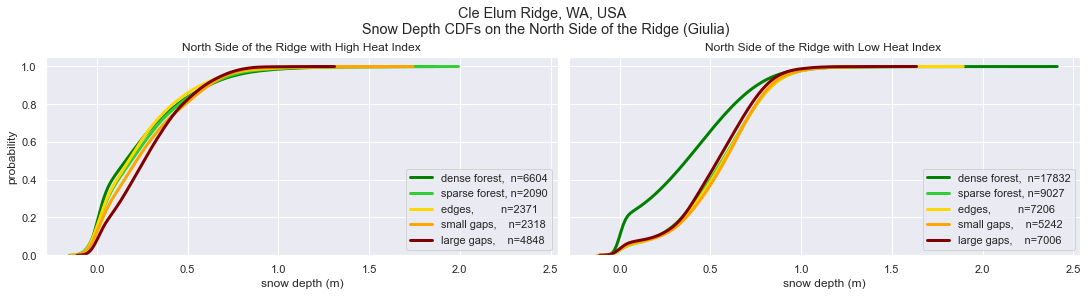

In [81]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15,4), constrained_layout = True)
alpha=0.7

number1 =  1 # high heat index
number2 = -1 # low heat index 
plt.suptitle('Cle Elum Ridge, WA, USA \n Snow Depth CDFs on the North Side of the Ridge (Giulia)')

# plots
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_100_n'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], label=f'dense forest,  n={np.unique(ds["hs_giulia_dce_rapid_reclass_100_n"].where(ds["dah_binary"] == number1)).size}',  color='green',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_200_n'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], label=f'sparse forest, n={np.unique(ds["hs_giulia_dce_rapid_reclass_200_n"].where(ds["dah_binary"] == number1)).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_300_n'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], label=f'edges,         n={np.unique(ds["hs_giulia_dce_rapid_reclass_300_n"].where(ds["dah_binary"] == number1)).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_400_n'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], label=f'small gaps,    n={np.unique(ds["hs_giulia_dce_rapid_reclass_400_n"].where(ds["dah_binary"] == number1)).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_500_n'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], label=f'large gaps,    n={np.unique(ds["hs_giulia_dce_rapid_reclass_500_n"].where(ds["dah_binary"] == number1)).size}', color='maroon',   cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_100_n'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], label=f'dense forest,  n={np.unique(ds["hs_giulia_dce_rapid_reclass_100_n"].where(ds["dah_binary"] == number2)).size}',  color='green',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_200_n'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], label=f'sparse forest, n={np.unique(ds["hs_giulia_dce_rapid_reclass_200_n"].where(ds["dah_binary"] == number2)).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_300_n'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], label=f'edges,         n={np.unique(ds["hs_giulia_dce_rapid_reclass_300_n"].where(ds["dah_binary"] == number2)).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_400_n'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], label=f'small gaps,    n={np.unique(ds["hs_giulia_dce_rapid_reclass_400_n"].where(ds["dah_binary"] == number2)).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_500_n'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], label=f'large gaps,    n={np.unique(ds["hs_giulia_dce_rapid_reclass_500_n"].where(ds["dah_binary"] == number2)).size}', color='maroon',   cumulative=True, linewidth=3)


# labels
axes[0].set_title('North Side of the Ridge with High Heat Index')
axes[1].set_title('North Side of the Ridge with Low Heat Index ')

axes[0].set_xlabel('snow depth (m)')
axes[1].set_xlabel('snow depth (m)')

axes[0].set_ylabel('probability')
axes[1].set_ylabel('')

axes[0].legend(loc='lower right')
axes[1].legend(loc='lower right')
plt.show()

## Now, going into each treatment and plotting the same thing

ds['hs_rapid_baf_new_1'] = ds['hs_rapid'].where(ds['baf_new'] == 1)\
ds['hs_rapid_baf_new_2'] = ds['hs_rapid'].where(ds['baf_new'] == 2)\
ds['hs_rapid_baf_new_17'] = ds['hs_rapid'].where(ds['baf_new'] == 17)\
ds['hs_rapid_baf_new_30'] = ds['hs_rapid'].where(ds['baf_new'] == 30)\
ds['hs_rapid_baf_new_32'] = ds['hs_rapid'].where(ds['baf_new'] == 32)\
ds['hs_rapid_baf_new_38'] = ds['hs_rapid'].where(ds['baf_new'] == 38)\
ds['hs_rapid_baf_new_60'] = ds['hs_rapid'].where(ds['baf_new'] == 60)\
ds['hs_rapid_baf_new_69'] = ds['hs_rapid'].where(ds['baf_new'] == 69)\
ds['hs_rapid_baf_new_80'] = ds['hs_rapid'].where(ds['baf_new'] == 80)\
ds['hs_rapid_baf_new_82'] = ds['hs_rapid'].where(ds['baf_new'] == 82)\
ds['hs_rapid_baf_new_90'] = ds['hs_rapid'].where(ds['baf_new'] == 90)\
ds['hs_rapid_baf_new_92'] = ds['hs_rapid'].where(ds['baf_new'] == 92)\
ds['hs_rapid_baf_new_140'] = ds['hs_rapid'].where(ds['baf_new'] == 140)\
ds['hs_rapid_baf_new_150'] = ds['hs_rapid'].where(ds['baf_new'] == 150)\
ds['hs_rapid_baf_new_155'] = ds['hs_rapid'].where(ds['baf_new'] == 155)\

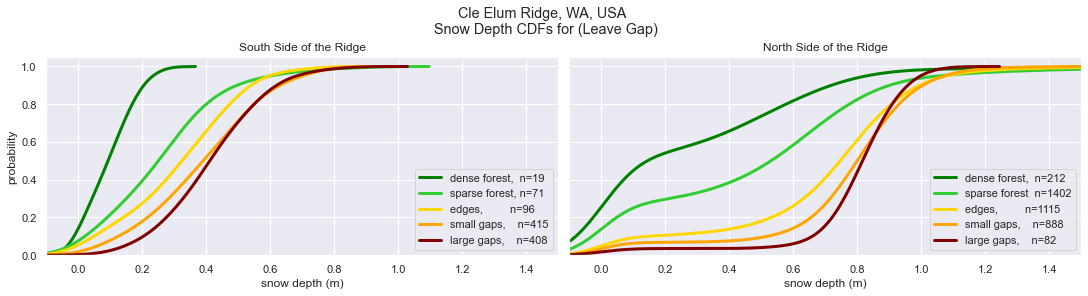

In [54]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15,4), constrained_layout = True)
alpha=0.7


# plots
sns.kdeplot(ds['hs_dce_rapid_reclass_100_s'].where(ds["baf_new"] == 1).values.flatten(), ax=axes[0], label=f'dense forest,  n={np.unique(ds["hs_dce_rapid_reclass_100_s"].where(ds["baf_new"] == 1)).size}',  color='green',    cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_200_s'].where(ds["baf_new"] == 1).values.flatten(), ax=axes[0], label=f'sparse forest, n={np.unique(ds["hs_dce_rapid_reclass_200_s"].where(ds["baf_new"] == 1)).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_300_s'].where(ds["baf_new"] == 1).values.flatten(), ax=axes[0], label=f'edges,         n={np.unique(ds["hs_dce_rapid_reclass_300_s"].where(ds["baf_new"] == 1)).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_400_s'].where(ds["baf_new"] == 1).values.flatten(), ax=axes[0], label=f'small gaps,    n={np.unique(ds["hs_dce_rapid_reclass_400_s"].where(ds["baf_new"] == 1)).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_500_s'].where(ds["baf_new"] == 1).values.flatten(), ax=axes[0], label=f'large gaps,    n={np.unique(ds["hs_dce_rapid_reclass_500_s"].where(ds["baf_new"] == 1)).size}', color='maroon',   cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_dce_rapid_reclass_100_n'].where(ds["baf_new"] == 1).values.flatten(), ax=axes[1], label=f'dense forest,  n={np.unique(ds["hs_dce_rapid_reclass_100_n"].where(ds["baf_new"] == 1)).size}', color='green',    cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_200_n'].where(ds["baf_new"] == 1).values.flatten(), ax=axes[1], label=f'sparse forest  n={np.unique(ds["hs_dce_rapid_reclass_200_n"].where(ds["baf_new"] == 1)).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_300_n'].where(ds["baf_new"] == 1).values.flatten(), ax=axes[1], label=f'edges,         n={np.unique(ds["hs_dce_rapid_reclass_300_n"].where(ds["baf_new"] == 1)).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_400_n'].where(ds["baf_new"] == 1).values.flatten(), ax=axes[1], label=f'small gaps,    n={np.unique(ds["hs_dce_rapid_reclass_400_n"].where(ds["baf_new"] == 1)).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_500_n'].where(ds["baf_new"] == 1).values.flatten(), ax=axes[1], label=f'large gaps,    n={np.unique(ds["hs_dce_rapid_reclass_500_n"].where(ds["baf_new"] == 1)).size}', color='maroon',   cumulative=True, linewidth=3)


# labels
axes[0].set_title('South Side of the Ridge')
axes[1].set_title('North Side of the Ridge')

axes[0].set_xlabel('snow depth (m)')
axes[1].set_xlabel('snow depth (m)')

axes[0].set_ylabel('probability')
axes[1].set_ylabel('')

axes[0].set_xlim(-0.1,1.5)

plt.suptitle('Cle Elum Ridge, WA, USA \n Snow Depth CDFs for (Leave Gap)')
axes[0].legend(loc='lower right')
axes[1].legend(loc='lower right')
plt.show()

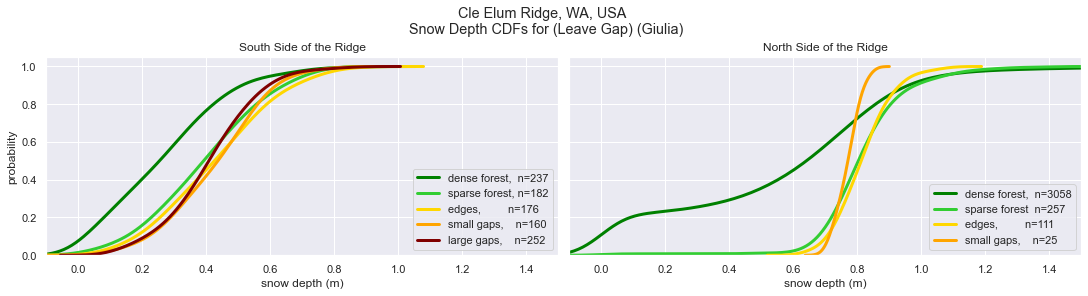

In [55]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15,4), constrained_layout = True)
alpha=0.7


# plots
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_100_s'].where(ds["baf_new"] == 1).values.flatten(), ax=axes[0], label=f'dense forest,  n={np.unique(ds["hs_giulia_dce_rapid_reclass_100_s"].where(ds["baf_new"] == 1)).size}',  color='green',    cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_200_s'].where(ds["baf_new"] == 1).values.flatten(), ax=axes[0], label=f'sparse forest, n={np.unique(ds["hs_giulia_dce_rapid_reclass_200_s"].where(ds["baf_new"] == 1)).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_300_s'].where(ds["baf_new"] == 1).values.flatten(), ax=axes[0], label=f'edges,         n={np.unique(ds["hs_giulia_dce_rapid_reclass_300_s"].where(ds["baf_new"] == 1)).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_400_s'].where(ds["baf_new"] == 1).values.flatten(), ax=axes[0], label=f'small gaps,    n={np.unique(ds["hs_giulia_dce_rapid_reclass_400_s"].where(ds["baf_new"] == 1)).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_500_s'].where(ds["baf_new"] == 1).values.flatten(), ax=axes[0], label=f'large gaps,    n={np.unique(ds["hs_giulia_dce_rapid_reclass_500_s"].where(ds["baf_new"] == 1)).size}', color='maroon',   cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_100_n'].where(ds["baf_new"] == 1).values.flatten(), ax=axes[1], label=f'dense forest,  n={np.unique(ds["hs_giulia_dce_rapid_reclass_100_n"].where(ds["baf_new"] == 1)).size}', color='green',    cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_200_n'].where(ds["baf_new"] == 1).values.flatten(), ax=axes[1], label=f'sparse forest  n={np.unique(ds["hs_giulia_dce_rapid_reclass_200_n"].where(ds["baf_new"] == 1)).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_300_n'].where(ds["baf_new"] == 1).values.flatten(), ax=axes[1], label=f'edges,         n={np.unique(ds["hs_giulia_dce_rapid_reclass_300_n"].where(ds["baf_new"] == 1)).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_400_n'].where(ds["baf_new"] == 1).values.flatten(), ax=axes[1], label=f'small gaps,    n={np.unique(ds["hs_giulia_dce_rapid_reclass_400_n"].where(ds["baf_new"] == 1)).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_500_n'].where(ds["baf_new"] == 1).values.flatten(), ax=axes[1], label=f'large gaps,    n={np.unique(ds["hs_giulia_dce_rapid_reclass_500_n"].where(ds["baf_new"] == 1)).size}', color='maroon',   cumulative=True, linewidth=3)


# labels
axes[0].set_title('South Side of the Ridge')
axes[1].set_title('North Side of the Ridge')

axes[0].set_xlabel('snow depth (m)')
axes[1].set_xlabel('snow depth (m)')

axes[0].set_ylabel('probability')
axes[1].set_ylabel('')

axes[0].set_xlim(-0.1,1.5)

plt.suptitle('Cle Elum Ridge, WA, USA \n Snow Depth CDFs for (Leave Gap) (Giulia)')
axes[0].legend(loc='lower right')
axes[1].legend(loc='lower right')
plt.show()

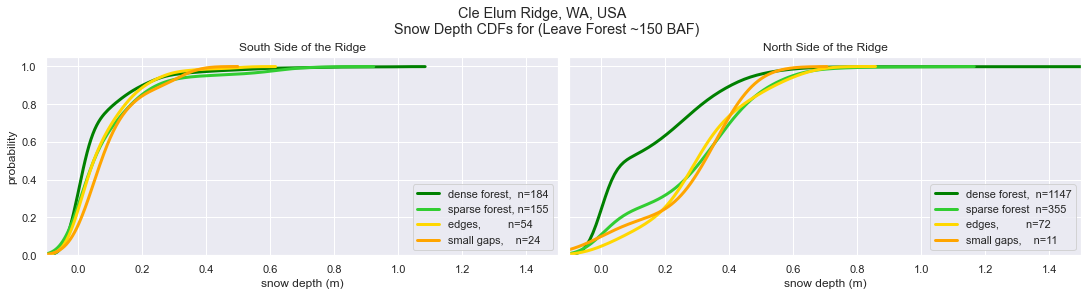

In [56]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15,4), constrained_layout = True)
alpha=0.7

# plots
sns.kdeplot(ds['hs_dce_rapid_reclass_100_s'].where(ds["baf_new"] == 2).values.flatten(), ax=axes[0], label=f'dense forest,  n={np.unique(ds["hs_dce_rapid_reclass_100_s"].where(ds["baf_new"] == 2)).size}',  color='green',    cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_200_s'].where(ds["baf_new"] == 2).values.flatten(), ax=axes[0], label=f'sparse forest, n={np.unique(ds["hs_dce_rapid_reclass_200_s"].where(ds["baf_new"] == 2)).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_300_s'].where(ds["baf_new"] == 2).values.flatten(), ax=axes[0], label=f'edges,         n={np.unique(ds["hs_dce_rapid_reclass_300_s"].where(ds["baf_new"] == 2)).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_400_s'].where(ds["baf_new"] == 2).values.flatten(), ax=axes[0], label=f'small gaps,    n={np.unique(ds["hs_dce_rapid_reclass_400_s"].where(ds["baf_new"] == 2)).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_500_s'].where(ds["baf_new"] == 2).values.flatten(), ax=axes[0], label=f'large gaps,    n={np.unique(ds["hs_dce_rapid_reclass_500_s"].where(ds["baf_new"] == 2)).size}', color='maroon',   cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_dce_rapid_reclass_100_n'].where(ds["baf_new"] == 150).values.flatten(), ax=axes[1], label=f'dense forest,  n={np.unique(ds["hs_dce_rapid_reclass_100_n"].where(ds["baf_new"] == 150)).size}', color='green',    cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_200_n'].where(ds["baf_new"] == 150).values.flatten(), ax=axes[1], label=f'sparse forest  n={np.unique(ds["hs_dce_rapid_reclass_200_n"].where(ds["baf_new"] == 150)).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_300_n'].where(ds["baf_new"] == 150).values.flatten(), ax=axes[1], label=f'edges,         n={np.unique(ds["hs_dce_rapid_reclass_300_n"].where(ds["baf_new"] == 150)).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_400_n'].where(ds["baf_new"] == 150).values.flatten(), ax=axes[1], label=f'small gaps,    n={np.unique(ds["hs_dce_rapid_reclass_400_n"].where(ds["baf_new"] == 150)).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_500_n'].where(ds["baf_new"] == 150).values.flatten(), ax=axes[1], label=f'large gaps,    n={np.unique(ds["hs_dce_rapid_reclass_500_n"].where(ds["baf_new"] == 150)).size}', color='maroon',   cumulative=True, linewidth=3)


# labels
axes[0].set_title('South Side of the Ridge')
axes[1].set_title('North Side of the Ridge')

axes[0].set_xlabel('snow depth (m)')
axes[1].set_xlabel('snow depth (m)')

axes[0].set_ylabel('probability')
axes[1].set_ylabel('')

axes[0].set_xlim(-0.1,1.5)

plt.suptitle('Cle Elum Ridge, WA, USA \n Snow Depth CDFs for (Leave Forest ~150 BAF)')
axes[0].legend(loc='lower right')
axes[1].legend(loc='lower right')
plt.show()

c:\Users\Lumbr\miniconda3\envs\raster\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
c:\Users\Lumbr\miniconda3\envs\raster\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


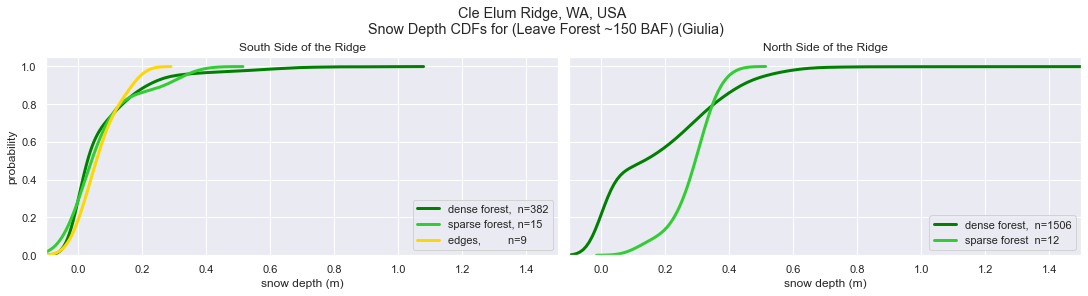

In [57]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15,4), constrained_layout = True)
alpha=0.7

# plots
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_100_s'].where(ds["baf_new"] == 2).values.flatten(), ax=axes[0], label=f'dense forest,  n={np.unique(ds["hs_giulia_dce_rapid_reclass_100_s"].where(ds["baf_new"] == 2)).size}',  color='green',    cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_200_s'].where(ds["baf_new"] == 2).values.flatten(), ax=axes[0], label=f'sparse forest, n={np.unique(ds["hs_giulia_dce_rapid_reclass_200_s"].where(ds["baf_new"] == 2)).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_300_s'].where(ds["baf_new"] == 2).values.flatten(), ax=axes[0], label=f'edges,         n={np.unique(ds["hs_giulia_dce_rapid_reclass_300_s"].where(ds["baf_new"] == 2)).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_400_s'].where(ds["baf_new"] == 2).values.flatten(), ax=axes[0], label=f'small gaps,    n={np.unique(ds["hs_giulia_dce_rapid_reclass_400_s"].where(ds["baf_new"] == 2)).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_500_s'].where(ds["baf_new"] == 2).values.flatten(), ax=axes[0], label=f'large gaps,    n={np.unique(ds["hs_giulia_dce_rapid_reclass_500_s"].where(ds["baf_new"] == 2)).size}', color='maroon',   cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_100_n'].where(ds["baf_new"] == 150).values.flatten(), ax=axes[1], label=f'dense forest,  n={np.unique(ds["hs_giulia_dce_rapid_reclass_100_n"].where(ds["baf_new"] == 150)).size}', color='green',    cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_200_n'].where(ds["baf_new"] == 150).values.flatten(), ax=axes[1], label=f'sparse forest  n={np.unique(ds["hs_giulia_dce_rapid_reclass_200_n"].where(ds["baf_new"] == 150)).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_300_n'].where(ds["baf_new"] == 150).values.flatten(), ax=axes[1], label=f'edges,         n={np.unique(ds["hs_giulia_dce_rapid_reclass_300_n"].where(ds["baf_new"] == 150)).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_400_n'].where(ds["baf_new"] == 150).values.flatten(), ax=axes[1], label=f'small gaps,    n={np.unique(ds["hs_giulia_dce_rapid_reclass_400_n"].where(ds["baf_new"] == 150)).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_500_n'].where(ds["baf_new"] == 150).values.flatten(), ax=axes[1], label=f'large gaps,    n={np.unique(ds["hs_giulia_dce_rapid_reclass_500_n"].where(ds["baf_new"] == 150)).size}', color='maroon',   cumulative=True, linewidth=3)


# labels
axes[0].set_title('South Side of the Ridge')
axes[1].set_title('North Side of the Ridge')

axes[0].set_xlabel('snow depth (m)')
axes[1].set_xlabel('snow depth (m)')

axes[0].set_ylabel('probability')
axes[1].set_ylabel('')

axes[0].set_xlim(-0.1,1.5)

plt.suptitle('Cle Elum Ridge, WA, USA \n Snow Depth CDFs for (Leave Forest ~150 BAF) (Giulia)')
axes[0].legend(loc='lower right')
axes[1].legend(loc='lower right')
plt.show()

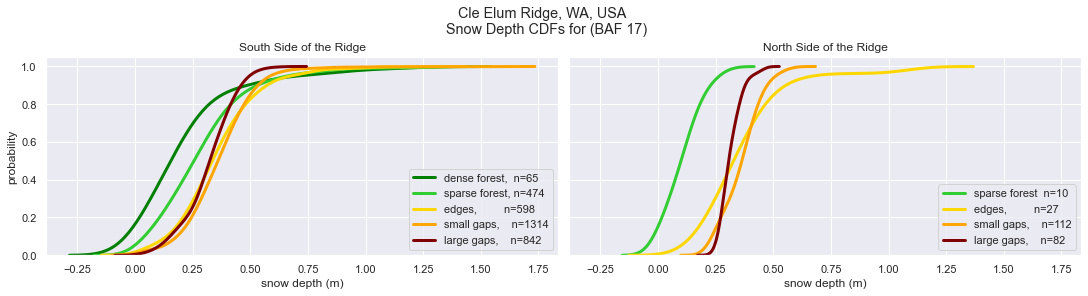

In [58]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15,4), constrained_layout = True)
alpha=0.7

number1 = 17
number2 = 17
plt.suptitle('Cle Elum Ridge, WA, USA \n Snow Depth CDFs for (BAF 17)')

# plots
sns.kdeplot(ds['hs_dce_rapid_reclass_100_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'dense forest,  n={np.unique(ds["hs_dce_rapid_reclass_100_s"].where(ds["baf_new"] == number1)).size}',  color='green',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_200_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'sparse forest, n={np.unique(ds["hs_dce_rapid_reclass_200_s"].where(ds["baf_new"] == number1)).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_300_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'edges,         n={np.unique(ds["hs_dce_rapid_reclass_300_s"].where(ds["baf_new"] == number1)).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_400_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'small gaps,    n={np.unique(ds["hs_dce_rapid_reclass_400_s"].where(ds["baf_new"] == number1)).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_500_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'large gaps,    n={np.unique(ds["hs_dce_rapid_reclass_500_s"].where(ds["baf_new"] == number1)).size}', color='maroon',   cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_dce_rapid_reclass_100_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'dense forest,  n={np.unique(ds["hs_dce_rapid_reclass_100_n"].where(ds["baf_new"] == number2)).size}', color='green',    cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_200_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'sparse forest  n={np.unique(ds["hs_dce_rapid_reclass_200_n"].where(ds["baf_new"] == number2)).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_300_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'edges,         n={np.unique(ds["hs_dce_rapid_reclass_300_n"].where(ds["baf_new"] == number2)).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_400_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'small gaps,    n={np.unique(ds["hs_dce_rapid_reclass_400_n"].where(ds["baf_new"] == number2)).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_500_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'large gaps,    n={np.unique(ds["hs_dce_rapid_reclass_500_n"].where(ds["baf_new"] == number2)).size}', color='maroon',   cumulative=True, linewidth=3)


# labels
axes[0].set_title('South Side of the Ridge')
axes[1].set_title('North Side of the Ridge')

axes[0].set_xlabel('snow depth (m)')
axes[1].set_xlabel('snow depth (m)')

axes[0].set_ylabel('probability')
axes[1].set_ylabel('')

axes[0].legend(loc='lower right')
axes[1].legend(loc='lower right')
plt.show()

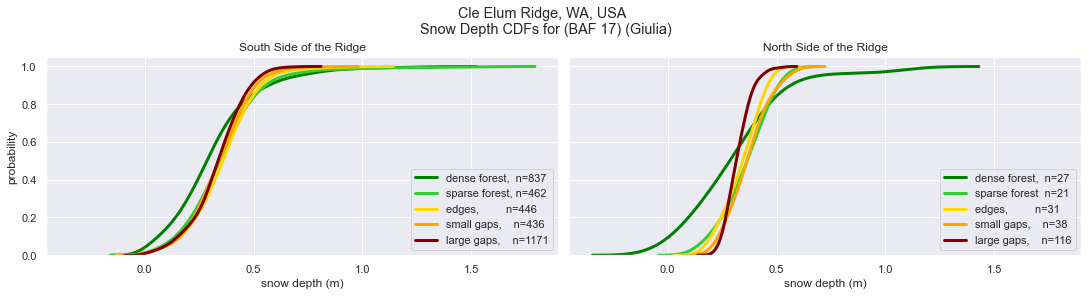

In [59]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15,4), constrained_layout = True)
alpha=0.7

number1 = 17
number2 = 17
plt.suptitle('Cle Elum Ridge, WA, USA \n Snow Depth CDFs for (BAF 17) (Giulia)')


# plots
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_100_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'dense forest,  n={np.unique(ds["hs_giulia_dce_rapid_reclass_100_s"].where(ds["baf_new"] == number1)).size}',  color='green',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_200_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'sparse forest, n={np.unique(ds["hs_giulia_dce_rapid_reclass_200_s"].where(ds["baf_new"] == number1)).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_300_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'edges,         n={np.unique(ds["hs_giulia_dce_rapid_reclass_300_s"].where(ds["baf_new"] == number1)).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_400_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'small gaps,    n={np.unique(ds["hs_giulia_dce_rapid_reclass_400_s"].where(ds["baf_new"] == number1)).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_500_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'large gaps,    n={np.unique(ds["hs_giulia_dce_rapid_reclass_500_s"].where(ds["baf_new"] == number1)).size}', color='maroon',   cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_100_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'dense forest,  n={np.unique(ds["hs_giulia_dce_rapid_reclass_100_n"].where(ds["baf_new"] == number2)).size}', color='green',    cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_200_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'sparse forest  n={np.unique(ds["hs_giulia_dce_rapid_reclass_200_n"].where(ds["baf_new"] == number2)).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_300_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'edges,         n={np.unique(ds["hs_giulia_dce_rapid_reclass_300_n"].where(ds["baf_new"] == number2)).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_400_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'small gaps,    n={np.unique(ds["hs_giulia_dce_rapid_reclass_400_n"].where(ds["baf_new"] == number2)).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_500_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'large gaps,    n={np.unique(ds["hs_giulia_dce_rapid_reclass_500_n"].where(ds["baf_new"] == number2)).size}', color='maroon',   cumulative=True, linewidth=3)


# labels
axes[0].set_title('South Side of the Ridge')
axes[1].set_title('North Side of the Ridge')

axes[0].set_xlabel('snow depth (m)')
axes[1].set_xlabel('snow depth (m)')

axes[0].set_ylabel('probability')
axes[1].set_ylabel('')

axes[0].legend(loc='lower right')
axes[1].legend(loc='lower right')
plt.show()

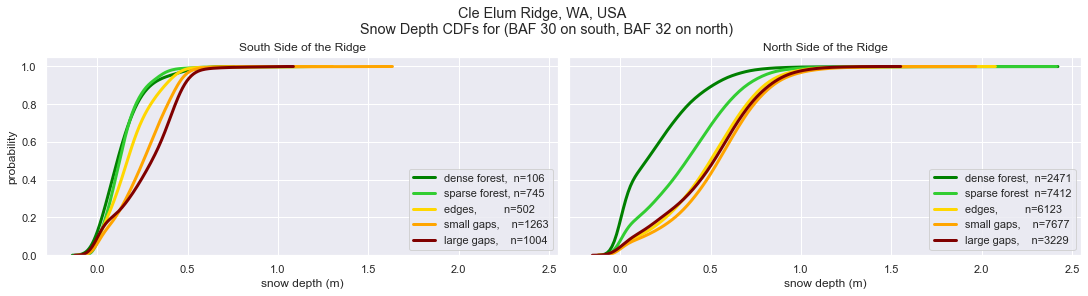

In [60]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15,4), constrained_layout = True)
alpha=0.7

number1 = 30
number2 = 32
plt.suptitle('Cle Elum Ridge, WA, USA \n Snow Depth CDFs for (BAF 30 on south, BAF 32 on north)')

# plots
sns.kdeplot(ds['hs_dce_rapid_reclass_100_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'dense forest,  n={np.unique(ds["hs_dce_rapid_reclass_100_s"].where(ds["baf_new"] == number1)).size}',  color='green',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_200_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'sparse forest, n={np.unique(ds["hs_dce_rapid_reclass_200_s"].where(ds["baf_new"] == number1)).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_300_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'edges,         n={np.unique(ds["hs_dce_rapid_reclass_300_s"].where(ds["baf_new"] == number1)).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_400_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'small gaps,    n={np.unique(ds["hs_dce_rapid_reclass_400_s"].where(ds["baf_new"] == number1)).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_500_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'large gaps,    n={np.unique(ds["hs_dce_rapid_reclass_500_s"].where(ds["baf_new"] == number1)).size}', color='maroon',   cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_dce_rapid_reclass_100_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'dense forest,  n={np.unique(ds["hs_dce_rapid_reclass_100_n"].where(ds["baf_new"] == number2)).size}', color='green',    cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_200_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'sparse forest  n={np.unique(ds["hs_dce_rapid_reclass_200_n"].where(ds["baf_new"] == number2)).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_300_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'edges,         n={np.unique(ds["hs_dce_rapid_reclass_300_n"].where(ds["baf_new"] == number2)).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_400_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'small gaps,    n={np.unique(ds["hs_dce_rapid_reclass_400_n"].where(ds["baf_new"] == number2)).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_500_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'large gaps,    n={np.unique(ds["hs_dce_rapid_reclass_500_n"].where(ds["baf_new"] == number2)).size}', color='maroon',   cumulative=True, linewidth=3)


# labels
axes[0].set_title('South Side of the Ridge')
axes[1].set_title('North Side of the Ridge')

axes[0].set_xlabel('snow depth (m)')
axes[1].set_xlabel('snow depth (m)')

axes[0].set_ylabel('probability')
axes[1].set_ylabel('')

axes[0].legend(loc='lower right')
axes[1].legend(loc='lower right')
plt.show()

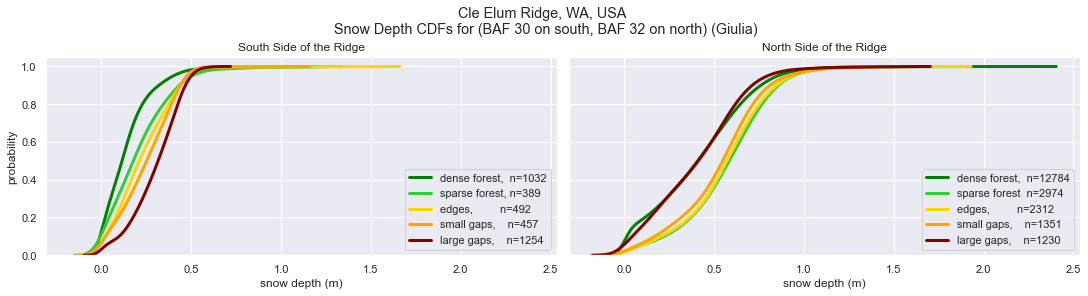

In [61]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15,4), constrained_layout = True)
alpha=0.7

number1 = 30
number2 = 32
plt.suptitle('Cle Elum Ridge, WA, USA \n Snow Depth CDFs for (BAF 30 on south, BAF 32 on north) (Giulia)')

# plots
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_100_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'dense forest,  n={np.unique(ds["hs_giulia_dce_rapid_reclass_100_s"].where(ds["baf_new"] == number1)).size}',  color='green',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_200_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'sparse forest, n={np.unique(ds["hs_giulia_dce_rapid_reclass_200_s"].where(ds["baf_new"] == number1)).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_300_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'edges,         n={np.unique(ds["hs_giulia_dce_rapid_reclass_300_s"].where(ds["baf_new"] == number1)).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_400_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'small gaps,    n={np.unique(ds["hs_giulia_dce_rapid_reclass_400_s"].where(ds["baf_new"] == number1)).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_500_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'large gaps,    n={np.unique(ds["hs_giulia_dce_rapid_reclass_500_s"].where(ds["baf_new"] == number1)).size}', color='maroon',   cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_100_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'dense forest,  n={np.unique(ds["hs_giulia_dce_rapid_reclass_100_n"].where(ds["baf_new"] == number2)).size}', color='green',    cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_200_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'sparse forest  n={np.unique(ds["hs_giulia_dce_rapid_reclass_200_n"].where(ds["baf_new"] == number2)).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_300_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'edges,         n={np.unique(ds["hs_giulia_dce_rapid_reclass_300_n"].where(ds["baf_new"] == number2)).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_400_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'small gaps,    n={np.unique(ds["hs_giulia_dce_rapid_reclass_400_n"].where(ds["baf_new"] == number2)).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_500_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'large gaps,    n={np.unique(ds["hs_giulia_dce_rapid_reclass_500_n"].where(ds["baf_new"] == number2)).size}', color='maroon',   cumulative=True, linewidth=3)


# labels
axes[0].set_title('South Side of the Ridge')
axes[1].set_title('North Side of the Ridge')

axes[0].set_xlabel('snow depth (m)')
axes[1].set_xlabel('snow depth (m)')

axes[0].set_ylabel('probability')
axes[1].set_ylabel('')

axes[0].legend(loc='lower right')
axes[1].legend(loc='lower right')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


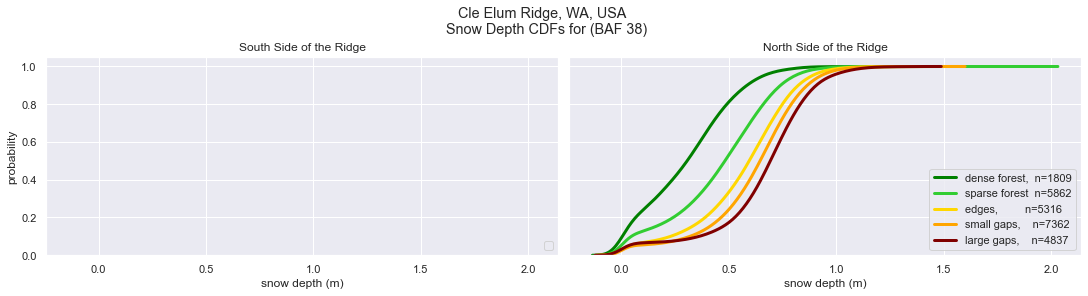

In [85]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15,4), constrained_layout = True)
alpha=0.7

number1 = 38
number2 = 38
plt.suptitle('Cle Elum Ridge, WA, USA \n Snow Depth CDFs for (BAF 38)')

# plots
sns.kdeplot(ds['hs_dce_rapid_reclass_100_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'dense forest,  n={np.unique(ds["hs_dce_rapid_reclass_100_s"].where(ds["baf_new"] == number1)).size}',  color='green',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_200_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'sparse forest, n={np.unique(ds["hs_dce_rapid_reclass_200_s"].where(ds["baf_new"] == number1)).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_300_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'edges,         n={np.unique(ds["hs_dce_rapid_reclass_300_s"].where(ds["baf_new"] == number1)).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_400_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'small gaps,    n={np.unique(ds["hs_dce_rapid_reclass_400_s"].where(ds["baf_new"] == number1)).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_500_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'large gaps,    n={np.unique(ds["hs_dce_rapid_reclass_500_s"].where(ds["baf_new"] == number1)).size}', color='maroon',   cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_dce_rapid_reclass_100_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'dense forest,  n={np.unique(ds["hs_dce_rapid_reclass_100_n"].where(ds["baf_new"] == number2)).size}', color='green',    cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_200_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'sparse forest  n={np.unique(ds["hs_dce_rapid_reclass_200_n"].where(ds["baf_new"] == number2)).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_300_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'edges,         n={np.unique(ds["hs_dce_rapid_reclass_300_n"].where(ds["baf_new"] == number2)).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_400_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'small gaps,    n={np.unique(ds["hs_dce_rapid_reclass_400_n"].where(ds["baf_new"] == number2)).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_500_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'large gaps,    n={np.unique(ds["hs_dce_rapid_reclass_500_n"].where(ds["baf_new"] == number2)).size}', color='maroon',   cumulative=True, linewidth=3)


# labels
axes[0].set_title('South Side of the Ridge')
axes[1].set_title('North Side of the Ridge')

axes[0].set_xlabel('snow depth (m)')
axes[1].set_xlabel('snow depth (m)')

axes[0].set_ylabel('probability')
axes[1].set_ylabel('')

axes[0].legend(loc='lower right')
axes[1].legend(loc='lower right')
plt.show()

Out of curiousity, check the heat index sensitivty on this BAF 38 on the north side, and on the large BAF69 on the south side. 

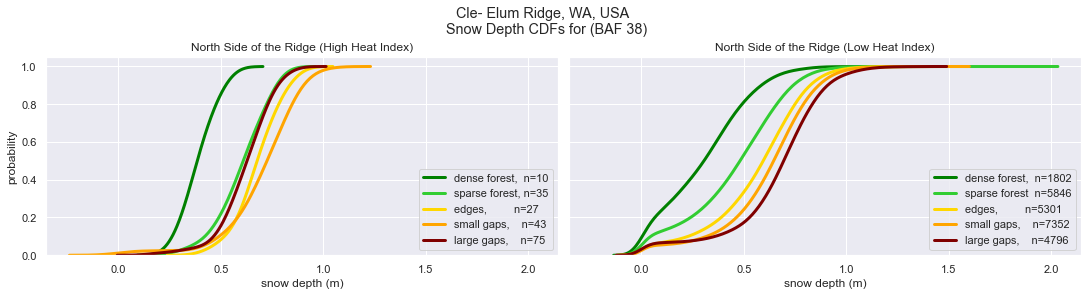

In [89]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15,4), constrained_layout = True)
alpha=0.7

number1 = 38
number2 = 38
plt. suptitle('Cle- Elum Ridge, WA, USA \n Snow Depth CDFs for (BAF 38)')


# plots
sns.kdeplot(ds['hs_dce_rapid_reclass_100_n'].where((ds["baf_new"] == number1) & (ds["dah_binary"] ==  1)).values.flatten(), ax=axes[0], label=f'dense forest,  n={np.unique(ds["hs_dce_rapid_reclass_100_n"].where((ds["baf_new"] == number1) & (ds["dah_binary"] ==  1))).size}',  color='green',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_200_n'].where((ds["baf_new"] == number1) & (ds["dah_binary"] ==  1)).values.flatten(), ax=axes[0], label=f'sparse forest, n={np.unique(ds["hs_dce_rapid_reclass_200_n"].where((ds["baf_new"] == number1) & (ds["dah_binary"] ==  1))).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_300_n'].where((ds["baf_new"] == number1) & (ds["dah_binary"] ==  1)).values.flatten(), ax=axes[0], label=f'edges,         n={np.unique(ds["hs_dce_rapid_reclass_300_n"].where((ds["baf_new"] == number1) & (ds["dah_binary"] ==  1))).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_400_n'].where((ds["baf_new"] == number1) & (ds["dah_binary"] ==  1)).values.flatten(), ax=axes[0], label=f'small gaps,    n={np.unique(ds["hs_dce_rapid_reclass_400_n"].where((ds["baf_new"] == number1) & (ds["dah_binary"] ==  1))).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_500_n'].where((ds["baf_new"] == number1) & (ds["dah_binary"] ==  1)).values.flatten(), ax=axes[0], label=f'large gaps,    n={np.unique(ds["hs_dce_rapid_reclass_500_n"].where((ds["baf_new"] == number1) & (ds["dah_binary"] ==  1))).size}', color='maroon',   cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_dce_rapid_reclass_100_n'].where((ds["baf_new"] == number2) & (ds["dah_binary"] == -1)).values.flatten(), ax=axes[1], label=f'dense forest,  n={np.unique(ds["hs_dce_rapid_reclass_100_n"].where((ds["baf_new"] == number2) & (ds["dah_binary"] == -1))).size}', color='green',    cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_200_n'].where((ds["baf_new"] == number2) & (ds["dah_binary"] == -1)).values.flatten(), ax=axes[1], label=f'sparse forest  n={np.unique(ds["hs_dce_rapid_reclass_200_n"].where((ds["baf_new"] == number2) & (ds["dah_binary"] == -1))).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_300_n'].where((ds["baf_new"] == number2) & (ds["dah_binary"] == -1)).values.flatten(), ax=axes[1], label=f'edges,         n={np.unique(ds["hs_dce_rapid_reclass_300_n"].where((ds["baf_new"] == number2) & (ds["dah_binary"] == -1))).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_400_n'].where((ds["baf_new"] == number2) & (ds["dah_binary"] == -1)).values.flatten(), ax=axes[1], label=f'small gaps,    n={np.unique(ds["hs_dce_rapid_reclass_400_n"].where((ds["baf_new"] == number2) & (ds["dah_binary"] == -1))).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_500_n'].where((ds["baf_new"] == number2) & (ds["dah_binary"] == -1)).values.flatten(), ax=axes[1], label=f'large gaps,    n={np.unique(ds["hs_dce_rapid_reclass_500_n"].where((ds["baf_new"] == number2) & (ds["dah_binary"] == -1))).size}', color='maroon',   cumulative=True, linewidth=3)


# labels
axes[0].set_title('North Side of the Ridge (High Heat Index)')
axes[1].set_title('North Side of the Ridge (Low Heat Index)')

axes[0].set_xlabel('snow depth (m)')
axes[1].set_xlabel('snow depth (m)')

axes[0].set_ylabel('probability')
axes[1].set_ylabel('')

axes[0].legend(loc='lower right')
axes[1].legend(loc='lower right')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


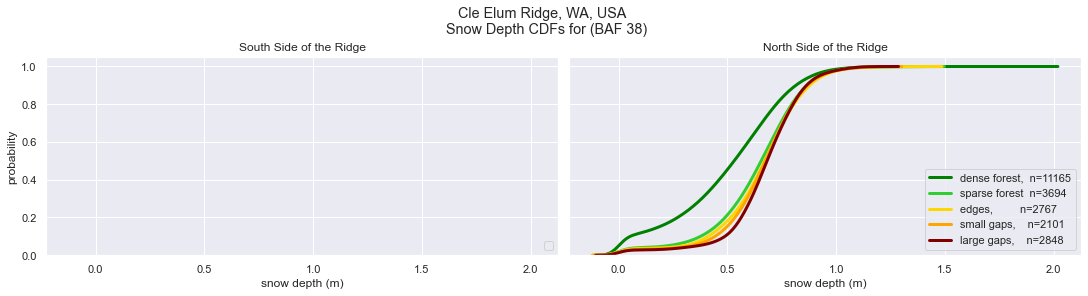

In [87]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15,4), constrained_layout = True)
alpha=0.7

number1 = 38
number2 = 38
plt.suptitle('Cle Elum Ridge, WA, USA \n Snow Depth CDFs for (BAF 38)')

# plots
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_100_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'dense forest,  n={np.unique(ds["hs_giulia_dce_rapid_reclass_100_s"].where(ds["baf_new"] == number1)).size}',  color='green',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_200_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'sparse forest, n={np.unique(ds["hs_giulia_dce_rapid_reclass_200_s"].where(ds["baf_new"] == number1)).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_300_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'edges,         n={np.unique(ds["hs_giulia_dce_rapid_reclass_300_s"].where(ds["baf_new"] == number1)).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_400_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'small gaps,    n={np.unique(ds["hs_giulia_dce_rapid_reclass_400_s"].where(ds["baf_new"] == number1)).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_500_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'large gaps,    n={np.unique(ds["hs_giulia_dce_rapid_reclass_500_s"].where(ds["baf_new"] == number1)).size}', color='maroon',   cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_100_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'dense forest,  n={np.unique(ds["hs_giulia_dce_rapid_reclass_100_n"].where(ds["baf_new"] == number2)).size}', color='green',    cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_200_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'sparse forest  n={np.unique(ds["hs_giulia_dce_rapid_reclass_200_n"].where(ds["baf_new"] == number2)).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_300_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'edges,         n={np.unique(ds["hs_giulia_dce_rapid_reclass_300_n"].where(ds["baf_new"] == number2)).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_400_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'small gaps,    n={np.unique(ds["hs_giulia_dce_rapid_reclass_400_n"].where(ds["baf_new"] == number2)).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_500_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'large gaps,    n={np.unique(ds["hs_giulia_dce_rapid_reclass_500_n"].where(ds["baf_new"] == number2)).size}', color='maroon',   cumulative=True, linewidth=3)


# labels
axes[0].set_title('South Side of the Ridge')
axes[1].set_title('North Side of the Ridge')

axes[0].set_xlabel('snow depth (m)')
axes[1].set_xlabel('snow depth (m)')

axes[0].set_ylabel('probability')
axes[1].set_ylabel('')

axes[0].legend(loc='lower right')
axes[1].legend(loc='lower right')
plt.show()

c:\Users\Lumbr\miniconda3\envs\raster\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


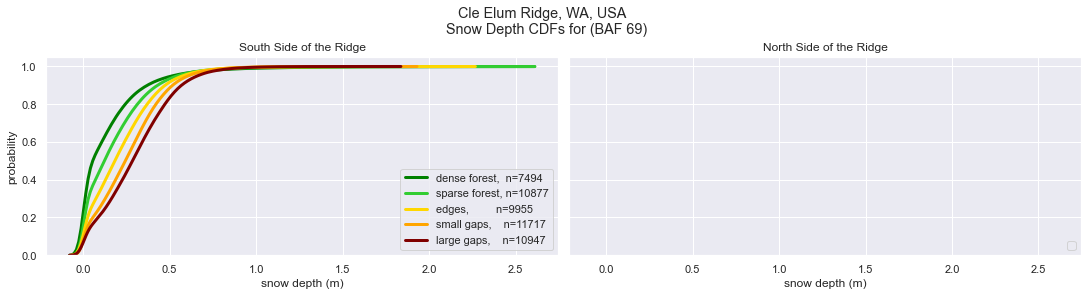

In [62]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15,4), constrained_layout = True)
alpha=0.7

number1 = 69
number2 = 69
plt.suptitle('Cle Elum Ridge, WA, USA \n Snow Depth CDFs for (BAF 69)')

# plots
sns.kdeplot(ds['hs_dce_rapid_reclass_100_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'dense forest,  n={np.unique(ds["hs_dce_rapid_reclass_100_s"].where(ds["baf_new"] == number1)).size}',  color='green',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_200_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'sparse forest, n={np.unique(ds["hs_dce_rapid_reclass_200_s"].where(ds["baf_new"] == number1)).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_300_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'edges,         n={np.unique(ds["hs_dce_rapid_reclass_300_s"].where(ds["baf_new"] == number1)).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_400_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'small gaps,    n={np.unique(ds["hs_dce_rapid_reclass_400_s"].where(ds["baf_new"] == number1)).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_500_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'large gaps,    n={np.unique(ds["hs_dce_rapid_reclass_500_s"].where(ds["baf_new"] == number1)).size}', color='maroon',   cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_dce_rapid_reclass_100_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'dense forest,  n={np.unique(ds["hs_dce_rapid_reclass_100_n"].where(ds["baf_new"] == number2)).size}', color='green',    cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_200_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'sparse forest  n={np.unique(ds["hs_dce_rapid_reclass_200_n"].where(ds["baf_new"] == number2)).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_300_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'edges,         n={np.unique(ds["hs_dce_rapid_reclass_300_n"].where(ds["baf_new"] == number2)).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_400_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'small gaps,    n={np.unique(ds["hs_dce_rapid_reclass_400_n"].where(ds["baf_new"] == number2)).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_500_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'large gaps,    n={np.unique(ds["hs_dce_rapid_reclass_500_n"].where(ds["baf_new"] == number2)).size}', color='maroon',   cumulative=True, linewidth=3)


# labels
axes[0].set_title('South Side of the Ridge')
axes[1].set_title('North Side of the Ridge')

axes[0].set_xlabel('snow depth (m)')
axes[1].set_xlabel('snow depth (m)')

axes[0].set_ylabel('probability')
axes[1].set_ylabel('')

axes[0].legend(loc='lower right')
axes[1].legend(loc='lower right')
plt.show()

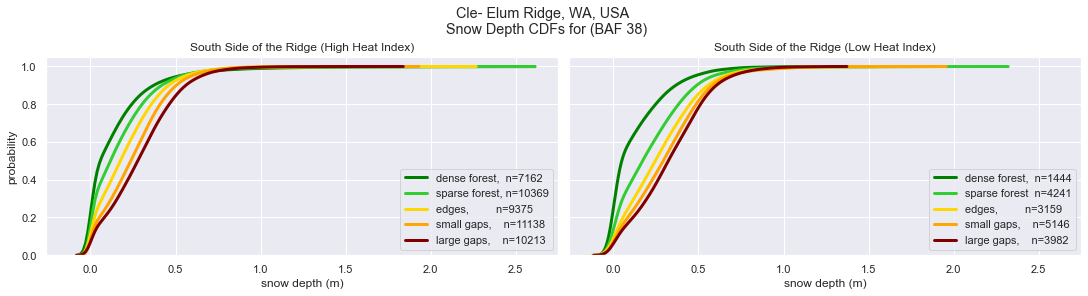

In [90]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15,4), constrained_layout = True)
alpha=0.7

number1 = 69
number2 = 69
plt. suptitle('Cle- Elum Ridge, WA, USA \n Snow Depth CDFs for (BAF 38)')


# plots
sns.kdeplot(ds['hs_dce_rapid_reclass_100_s'].where((ds["baf_new"] == number1) & (ds["dah_binary"] ==  1)).values.flatten(), ax=axes[0], label=f'dense forest,  n={np.unique(ds["hs_dce_rapid_reclass_100_s"].where((ds["baf_new"] == number1) & (ds["dah_binary"] ==  1))).size}',  color='green',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_200_s'].where((ds["baf_new"] == number1) & (ds["dah_binary"] ==  1)).values.flatten(), ax=axes[0], label=f'sparse forest, n={np.unique(ds["hs_dce_rapid_reclass_200_s"].where((ds["baf_new"] == number1) & (ds["dah_binary"] ==  1))).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_300_s'].where((ds["baf_new"] == number1) & (ds["dah_binary"] ==  1)).values.flatten(), ax=axes[0], label=f'edges,         n={np.unique(ds["hs_dce_rapid_reclass_300_s"].where((ds["baf_new"] == number1) & (ds["dah_binary"] ==  1))).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_400_s'].where((ds["baf_new"] == number1) & (ds["dah_binary"] ==  1)).values.flatten(), ax=axes[0], label=f'small gaps,    n={np.unique(ds["hs_dce_rapid_reclass_400_s"].where((ds["baf_new"] == number1) & (ds["dah_binary"] ==  1))).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_500_s'].where((ds["baf_new"] == number1) & (ds["dah_binary"] ==  1)).values.flatten(), ax=axes[0], label=f'large gaps,    n={np.unique(ds["hs_dce_rapid_reclass_500_s"].where((ds["baf_new"] == number1) & (ds["dah_binary"] ==  1))).size}', color='maroon',   cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_dce_rapid_reclass_100_s'].where((ds["baf_new"] == number2) & (ds["dah_binary"] == -1)).values.flatten(), ax=axes[1], label=f'dense forest,  n={np.unique(ds["hs_dce_rapid_reclass_100_s"].where((ds["baf_new"] == number2) & (ds["dah_binary"] == -1))).size}', color='green',    cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_200_s'].where((ds["baf_new"] == number2) & (ds["dah_binary"] == -1)).values.flatten(), ax=axes[1], label=f'sparse forest  n={np.unique(ds["hs_dce_rapid_reclass_200_s"].where((ds["baf_new"] == number2) & (ds["dah_binary"] == -1))).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_300_s'].where((ds["baf_new"] == number2) & (ds["dah_binary"] == -1)).values.flatten(), ax=axes[1], label=f'edges,         n={np.unique(ds["hs_dce_rapid_reclass_300_s"].where((ds["baf_new"] == number2) & (ds["dah_binary"] == -1))).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_400_s'].where((ds["baf_new"] == number2) & (ds["dah_binary"] == -1)).values.flatten(), ax=axes[1], label=f'small gaps,    n={np.unique(ds["hs_dce_rapid_reclass_400_s"].where((ds["baf_new"] == number2) & (ds["dah_binary"] == -1))).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_500_s'].where((ds["baf_new"] == number2) & (ds["dah_binary"] == -1)).values.flatten(), ax=axes[1], label=f'large gaps,    n={np.unique(ds["hs_dce_rapid_reclass_500_s"].where((ds["baf_new"] == number2) & (ds["dah_binary"] == -1))).size}', color='maroon',   cumulative=True, linewidth=3)


# labels
axes[0].set_title('South Side of the Ridge (High Heat Index)')
axes[1].set_title('South Side of the Ridge (Low Heat Index)')

axes[0].set_xlabel('snow depth (m)')
axes[1].set_xlabel('snow depth (m)')

axes[0].set_ylabel('probability')
axes[1].set_ylabel('')

axes[0].legend(loc='lower right')
axes[1].legend(loc='lower right')
plt.show()

c:\Users\Lumbr\miniconda3\envs\raster\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


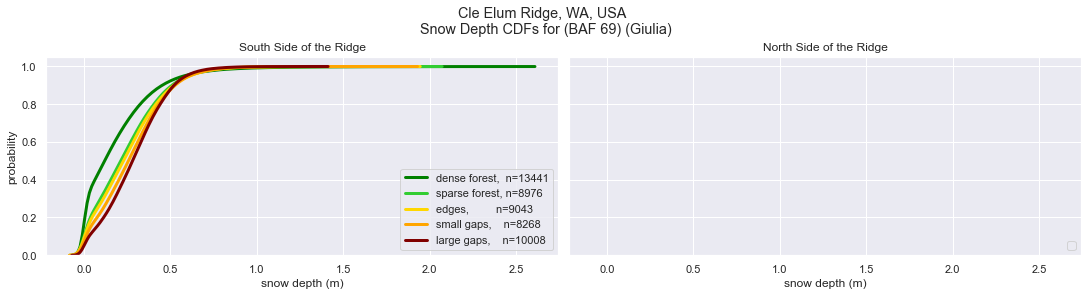

In [63]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15,4), constrained_layout = True)
alpha=0.7

number1 = 69
number2 = 69
plt.suptitle('Cle Elum Ridge, WA, USA \n Snow Depth CDFs for (BAF 69) (Giulia)')

# plots
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_100_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'dense forest,  n={np.unique(ds["hs_giulia_dce_rapid_reclass_100_s"].where(ds["baf_new"] == number1)).size}',  color='green',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_200_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'sparse forest, n={np.unique(ds["hs_giulia_dce_rapid_reclass_200_s"].where(ds["baf_new"] == number1)).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_300_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'edges,         n={np.unique(ds["hs_giulia_dce_rapid_reclass_300_s"].where(ds["baf_new"] == number1)).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_400_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'small gaps,    n={np.unique(ds["hs_giulia_dce_rapid_reclass_400_s"].where(ds["baf_new"] == number1)).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_500_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'large gaps,    n={np.unique(ds["hs_giulia_dce_rapid_reclass_500_s"].where(ds["baf_new"] == number1)).size}', color='maroon',   cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_100_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'dense forest,  n={np.unique(ds["hs_giulia_dce_rapid_reclass_100_n"].where(ds["baf_new"] == number2)).size}', color='green',    cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_200_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'sparse forest  n={np.unique(ds["hs_giulia_dce_rapid_reclass_200_n"].where(ds["baf_new"] == number2)).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_300_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'edges,         n={np.unique(ds["hs_giulia_dce_rapid_reclass_300_n"].where(ds["baf_new"] == number2)).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_400_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'small gaps,    n={np.unique(ds["hs_giulia_dce_rapid_reclass_400_n"].where(ds["baf_new"] == number2)).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_500_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'large gaps,    n={np.unique(ds["hs_giulia_dce_rapid_reclass_500_n"].where(ds["baf_new"] == number2)).size}', color='maroon',   cumulative=True, linewidth=3)


# labels
axes[0].set_title('South Side of the Ridge')
axes[1].set_title('North Side of the Ridge')

axes[0].set_xlabel('snow depth (m)')
axes[1].set_xlabel('snow depth (m)')

axes[0].set_ylabel('probability')
axes[1].set_ylabel('')

axes[0].legend(loc='lower right')
axes[1].legend(loc='lower right')
plt.show()

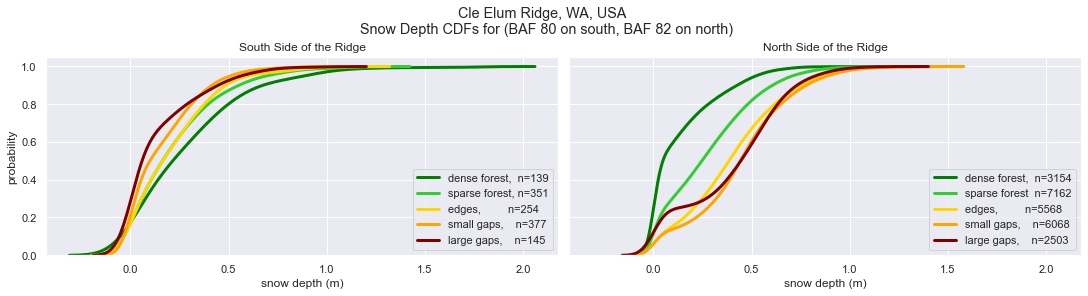

In [83]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15,4), constrained_layout = True)
alpha=0.7

number1 = 80
number2 = 82
plt.suptitle('Cle Elum Ridge, WA, USA \n Snow Depth CDFs for (BAF 80 on south, BAF 82 on north)')   

# plots
sns.kdeplot(ds['hs_dce_rapid_reclass_100_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'dense forest,  n={np.unique(ds["hs_dce_rapid_reclass_100_s"].where(ds["baf_new"] == number1)).size}',  color='green',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_200_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'sparse forest, n={np.unique(ds["hs_dce_rapid_reclass_200_s"].where(ds["baf_new"] == number1)).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_300_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'edges,         n={np.unique(ds["hs_dce_rapid_reclass_300_s"].where(ds["baf_new"] == number1)).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_400_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'small gaps,    n={np.unique(ds["hs_dce_rapid_reclass_400_s"].where(ds["baf_new"] == number1)).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_500_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'large gaps,    n={np.unique(ds["hs_dce_rapid_reclass_500_s"].where(ds["baf_new"] == number1)).size}', color='maroon',   cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_dce_rapid_reclass_100_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'dense forest,  n={np.unique(ds["hs_dce_rapid_reclass_100_n"].where(ds["baf_new"] == number2)).size}', color='green',    cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_200_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'sparse forest  n={np.unique(ds["hs_dce_rapid_reclass_200_n"].where(ds["baf_new"] == number2)).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_300_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'edges,         n={np.unique(ds["hs_dce_rapid_reclass_300_n"].where(ds["baf_new"] == number2)).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_400_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'small gaps,    n={np.unique(ds["hs_dce_rapid_reclass_400_n"].where(ds["baf_new"] == number2)).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_500_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'large gaps,    n={np.unique(ds["hs_dce_rapid_reclass_500_n"].where(ds["baf_new"] == number2)).size}', color='maroon',   cumulative=True, linewidth=3)


# labels
axes[0].set_title('South Side of the Ridge')
axes[1].set_title('North Side of the Ridge')

axes[0].set_xlabel('snow depth (m)')
axes[1].set_xlabel('snow depth (m)')

axes[0].set_ylabel('probability')
axes[1].set_ylabel('')

axes[0].legend(loc='lower right')
axes[1].legend(loc='lower right')
plt.show()

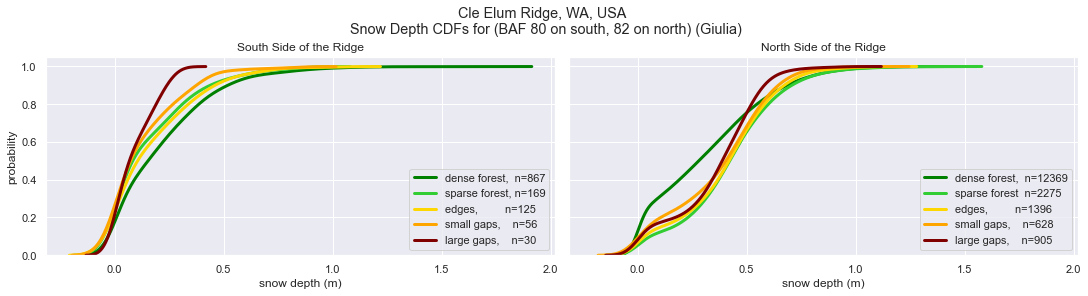

In [84]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15,4), constrained_layout = True)
alpha=0.7

number1 = 80
number2 = 82
plt.suptitle('Cle Elum Ridge, WA, USA \n Snow Depth CDFs for (BAF 80 on south, 82 on north) (Giulia)')

# plots
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_100_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'dense forest,  n={np.unique(ds["hs_giulia_dce_rapid_reclass_100_s"].where(ds["baf_new"] == number1)).size}',  color='green',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_200_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'sparse forest, n={np.unique(ds["hs_giulia_dce_rapid_reclass_200_s"].where(ds["baf_new"] == number1)).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_300_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'edges,         n={np.unique(ds["hs_giulia_dce_rapid_reclass_300_s"].where(ds["baf_new"] == number1)).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_400_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'small gaps,    n={np.unique(ds["hs_giulia_dce_rapid_reclass_400_s"].where(ds["baf_new"] == number1)).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_500_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'large gaps,    n={np.unique(ds["hs_giulia_dce_rapid_reclass_500_s"].where(ds["baf_new"] == number1)).size}', color='maroon',   cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_100_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'dense forest,  n={np.unique(ds["hs_giulia_dce_rapid_reclass_100_n"].where(ds["baf_new"] == number2)).size}', color='green',    cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_200_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'sparse forest  n={np.unique(ds["hs_giulia_dce_rapid_reclass_200_n"].where(ds["baf_new"] == number2)).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_300_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'edges,         n={np.unique(ds["hs_giulia_dce_rapid_reclass_300_n"].where(ds["baf_new"] == number2)).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_400_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'small gaps,    n={np.unique(ds["hs_giulia_dce_rapid_reclass_400_n"].where(ds["baf_new"] == number2)).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_500_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'large gaps,    n={np.unique(ds["hs_giulia_dce_rapid_reclass_500_n"].where(ds["baf_new"] == number2)).size}', color='maroon',   cumulative=True, linewidth=3)


# labels
axes[0].set_title('South Side of the Ridge')
axes[1].set_title('North Side of the Ridge')

axes[0].set_xlabel('snow depth (m)')
axes[1].set_xlabel('snow depth (m)')

axes[0].set_ylabel('probability')
axes[1].set_ylabel('')

axes[0].legend(loc='lower right')
axes[1].legend(loc='lower right')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


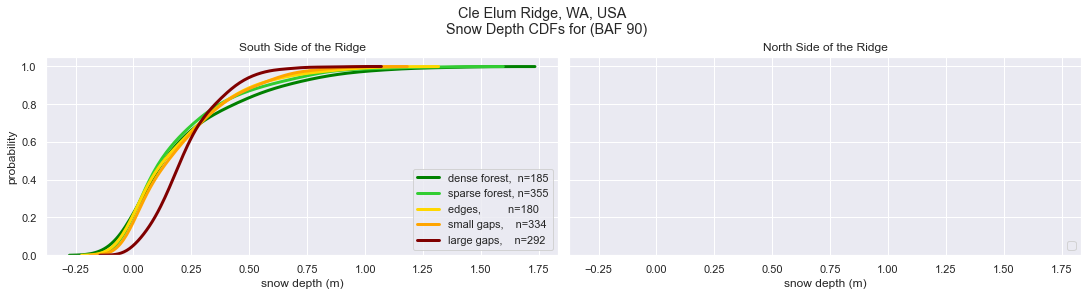

In [66]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15,4), constrained_layout = True)
alpha=0.7

number1 = 90
number2 = 90
plt.suptitle('Cle Elum Ridge, WA, USA \n Snow Depth CDFs for (BAF 90)')

# plots
sns.kdeplot(ds['hs_dce_rapid_reclass_100_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'dense forest,  n={np.unique(ds["hs_dce_rapid_reclass_100_s"].where(ds["baf_new"] == number1)).size}',  color='green',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_200_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'sparse forest, n={np.unique(ds["hs_dce_rapid_reclass_200_s"].where(ds["baf_new"] == number1)).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_300_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'edges,         n={np.unique(ds["hs_dce_rapid_reclass_300_s"].where(ds["baf_new"] == number1)).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_400_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'small gaps,    n={np.unique(ds["hs_dce_rapid_reclass_400_s"].where(ds["baf_new"] == number1)).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_500_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'large gaps,    n={np.unique(ds["hs_dce_rapid_reclass_500_s"].where(ds["baf_new"] == number1)).size}', color='maroon',   cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_dce_rapid_reclass_100_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'dense forest,  n={np.unique(ds["hs_dce_rapid_reclass_100_n"].where(ds["baf_new"] == number2)).size}', color='green',    cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_200_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'sparse forest  n={np.unique(ds["hs_dce_rapid_reclass_200_n"].where(ds["baf_new"] == number2)).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_300_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'edges,         n={np.unique(ds["hs_dce_rapid_reclass_300_n"].where(ds["baf_new"] == number2)).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_400_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'small gaps,    n={np.unique(ds["hs_dce_rapid_reclass_400_n"].where(ds["baf_new"] == number2)).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_500_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'large gaps,    n={np.unique(ds["hs_dce_rapid_reclass_500_n"].where(ds["baf_new"] == number2)).size}', color='maroon',   cumulative=True, linewidth=3)


# labels
axes[0].set_title('South Side of the Ridge')
axes[1].set_title('North Side of the Ridge')

axes[0].set_xlabel('snow depth (m)')
axes[1].set_xlabel('snow depth (m)')

axes[0].set_ylabel('probability')
axes[1].set_ylabel('')

axes[0].legend(loc='lower right')
axes[1].legend(loc='lower right')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


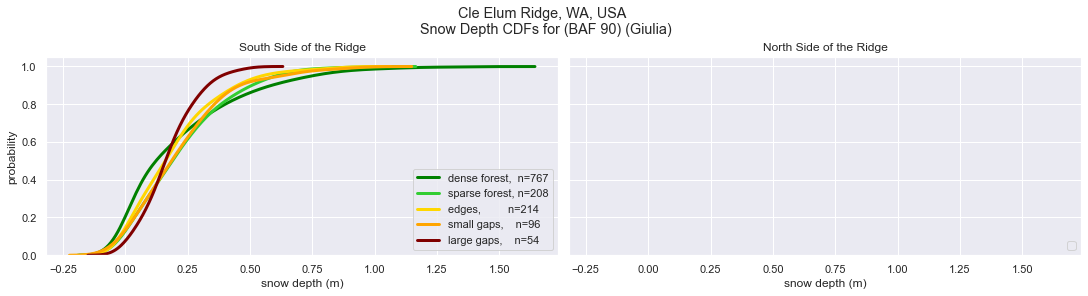

In [67]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15,4), constrained_layout = True)
alpha=0.7

number1 = 90
number2 = 90
plt.suptitle('Cle Elum Ridge, WA, USA \n Snow Depth CDFs for (BAF 90) (Giulia)')

# plots
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_100_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'dense forest,  n={np.unique(ds["hs_giulia_dce_rapid_reclass_100_s"].where(ds["baf_new"] == number1)).size}',  color='green',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_200_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'sparse forest, n={np.unique(ds["hs_giulia_dce_rapid_reclass_200_s"].where(ds["baf_new"] == number1)).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_300_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'edges,         n={np.unique(ds["hs_giulia_dce_rapid_reclass_300_s"].where(ds["baf_new"] == number1)).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_400_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'small gaps,    n={np.unique(ds["hs_giulia_dce_rapid_reclass_400_s"].where(ds["baf_new"] == number1)).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_500_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'large gaps,    n={np.unique(ds["hs_giulia_dce_rapid_reclass_500_s"].where(ds["baf_new"] == number1)).size}', color='maroon',   cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_100_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'dense forest,  n={np.unique(ds["hs_giulia_dce_rapid_reclass_100_n"].where(ds["baf_new"] == number2)).size}', color='green',    cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_200_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'sparse forest  n={np.unique(ds["hs_giulia_dce_rapid_reclass_200_n"].where(ds["baf_new"] == number2)).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_300_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'edges,         n={np.unique(ds["hs_giulia_dce_rapid_reclass_300_n"].where(ds["baf_new"] == number2)).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_400_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'small gaps,    n={np.unique(ds["hs_giulia_dce_rapid_reclass_400_n"].where(ds["baf_new"] == number2)).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_500_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'large gaps,    n={np.unique(ds["hs_giulia_dce_rapid_reclass_500_n"].where(ds["baf_new"] == number2)).size}', color='maroon',   cumulative=True, linewidth=3)


# labels
axes[0].set_title('South Side of the Ridge')
axes[1].set_title('North Side of the Ridge')

axes[0].set_xlabel('snow depth (m)')
axes[1].set_xlabel('snow depth (m)')

axes[0].set_ylabel('probability')
axes[1].set_ylabel('')

axes[0].legend(loc='lower right')
axes[1].legend(loc='lower right')
plt.show()

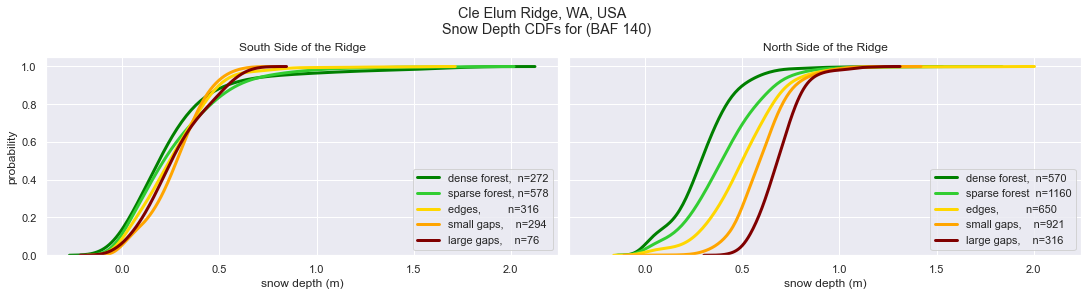

In [68]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15,4), constrained_layout = True)
alpha=0.7

number1 = 140
number2 = 140
plt.suptitle('Cle Elum Ridge, WA, USA \n Snow Depth CDFs for (BAF 140)')

# plots
sns.kdeplot(ds['hs_dce_rapid_reclass_100_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'dense forest,  n={np.unique(ds["hs_dce_rapid_reclass_100_s"].where(ds["baf_new"] == number1)).size}',  color='green',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_200_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'sparse forest, n={np.unique(ds["hs_dce_rapid_reclass_200_s"].where(ds["baf_new"] == number1)).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_300_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'edges,         n={np.unique(ds["hs_dce_rapid_reclass_300_s"].where(ds["baf_new"] == number1)).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_400_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'small gaps,    n={np.unique(ds["hs_dce_rapid_reclass_400_s"].where(ds["baf_new"] == number1)).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_500_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'large gaps,    n={np.unique(ds["hs_dce_rapid_reclass_500_s"].where(ds["baf_new"] == number1)).size}', color='maroon',   cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_dce_rapid_reclass_100_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'dense forest,  n={np.unique(ds["hs_dce_rapid_reclass_100_n"].where(ds["baf_new"] == number2)).size}', color='green',    cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_200_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'sparse forest  n={np.unique(ds["hs_dce_rapid_reclass_200_n"].where(ds["baf_new"] == number2)).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_300_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'edges,         n={np.unique(ds["hs_dce_rapid_reclass_300_n"].where(ds["baf_new"] == number2)).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_400_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'small gaps,    n={np.unique(ds["hs_dce_rapid_reclass_400_n"].where(ds["baf_new"] == number2)).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_500_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'large gaps,    n={np.unique(ds["hs_dce_rapid_reclass_500_n"].where(ds["baf_new"] == number2)).size}', color='maroon',   cumulative=True, linewidth=3)


# labels
axes[0].set_title('South Side of the Ridge')
axes[1].set_title('North Side of the Ridge')

axes[0].set_xlabel('snow depth (m)')
axes[1].set_xlabel('snow depth (m)')

axes[0].set_ylabel('probability')
axes[1].set_ylabel('')

axes[0].legend(loc='lower right')
axes[1].legend(loc='lower right')
plt.show()

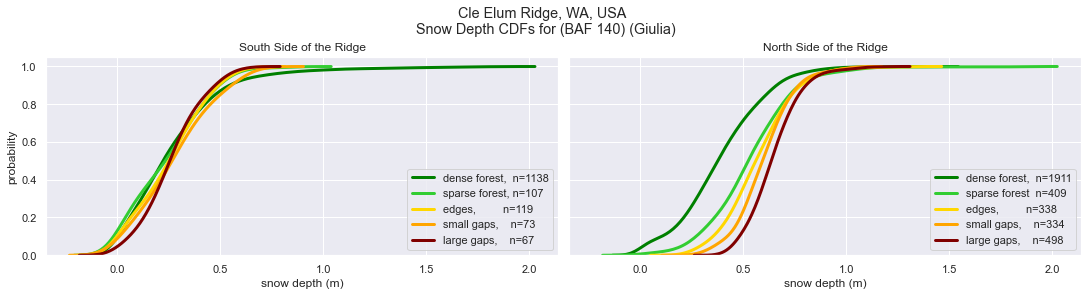

In [69]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15,4), constrained_layout = True)
alpha=0.7

number1 = 140
number2 = 140
plt.suptitle('Cle Elum Ridge, WA, USA \n Snow Depth CDFs for (BAF 140) (Giulia)')

# plots
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_100_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'dense forest,  n={np.unique(ds["hs_giulia_dce_rapid_reclass_100_s"].where(ds["baf_new"] == number1)).size}',  color='green',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_200_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'sparse forest, n={np.unique(ds["hs_giulia_dce_rapid_reclass_200_s"].where(ds["baf_new"] == number1)).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_300_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'edges,         n={np.unique(ds["hs_giulia_dce_rapid_reclass_300_s"].where(ds["baf_new"] == number1)).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_400_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'small gaps,    n={np.unique(ds["hs_giulia_dce_rapid_reclass_400_s"].where(ds["baf_new"] == number1)).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_500_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'large gaps,    n={np.unique(ds["hs_giulia_dce_rapid_reclass_500_s"].where(ds["baf_new"] == number1)).size}', color='maroon',   cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_100_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'dense forest,  n={np.unique(ds["hs_giulia_dce_rapid_reclass_100_n"].where(ds["baf_new"] == number2)).size}', color='green',    cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_200_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'sparse forest  n={np.unique(ds["hs_giulia_dce_rapid_reclass_200_n"].where(ds["baf_new"] == number2)).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_300_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'edges,         n={np.unique(ds["hs_giulia_dce_rapid_reclass_300_n"].where(ds["baf_new"] == number2)).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_400_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'small gaps,    n={np.unique(ds["hs_giulia_dce_rapid_reclass_400_n"].where(ds["baf_new"] == number2)).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_500_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'large gaps,    n={np.unique(ds["hs_giulia_dce_rapid_reclass_500_n"].where(ds["baf_new"] == number2)).size}', color='maroon',   cumulative=True, linewidth=3)


# labels
axes[0].set_title('South Side of the Ridge')
axes[1].set_title('North Side of the Ridge')

axes[0].set_xlabel('snow depth (m)')
axes[1].set_xlabel('snow depth (m)')

axes[0].set_ylabel('probability')
axes[1].set_ylabel('')

axes[0].legend(loc='lower right')
axes[1].legend(loc='lower right')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


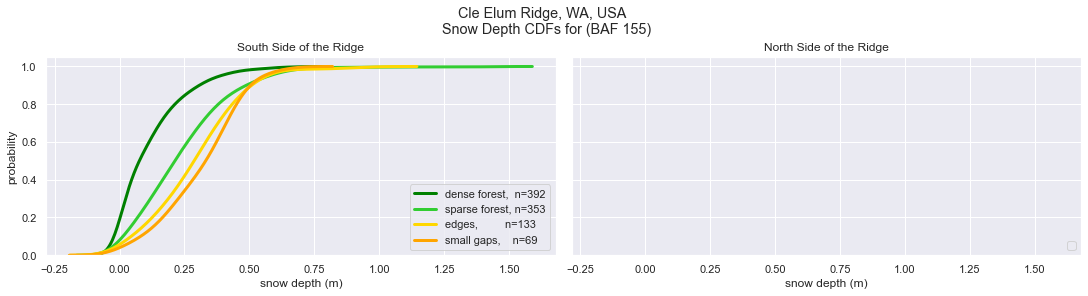

In [70]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15,4), constrained_layout = True)
alpha=0.7

number1 = 155
number2 = 155
plt.suptitle('Cle Elum Ridge, WA, USA \n Snow Depth CDFs for (BAF 155)')

# plots
sns.kdeplot(ds['hs_dce_rapid_reclass_100_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'dense forest,  n={np.unique(ds["hs_dce_rapid_reclass_100_s"].where(ds["baf_new"] == number1)).size}',  color='green',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_200_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'sparse forest, n={np.unique(ds["hs_dce_rapid_reclass_200_s"].where(ds["baf_new"] == number1)).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_300_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'edges,         n={np.unique(ds["hs_dce_rapid_reclass_300_s"].where(ds["baf_new"] == number1)).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_400_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'small gaps,    n={np.unique(ds["hs_dce_rapid_reclass_400_s"].where(ds["baf_new"] == number1)).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_500_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'large gaps,    n={np.unique(ds["hs_dce_rapid_reclass_500_s"].where(ds["baf_new"] == number1)).size}', color='maroon',   cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_dce_rapid_reclass_100_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'dense forest,  n={np.unique(ds["hs_dce_rapid_reclass_100_n"].where(ds["baf_new"] == number2)).size}', color='green',    cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_200_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'sparse forest  n={np.unique(ds["hs_dce_rapid_reclass_200_n"].where(ds["baf_new"] == number2)).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_300_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'edges,         n={np.unique(ds["hs_dce_rapid_reclass_300_n"].where(ds["baf_new"] == number2)).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_400_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'small gaps,    n={np.unique(ds["hs_dce_rapid_reclass_400_n"].where(ds["baf_new"] == number2)).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_500_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'large gaps,    n={np.unique(ds["hs_dce_rapid_reclass_500_n"].where(ds["baf_new"] == number2)).size}', color='maroon',   cumulative=True, linewidth=3)


# labels
axes[0].set_title('South Side of the Ridge')
axes[1].set_title('North Side of the Ridge')

axes[0].set_xlabel('snow depth (m)')
axes[1].set_xlabel('snow depth (m)')

axes[0].set_ylabel('probability')
axes[1].set_ylabel('')

axes[0].legend(loc='lower right')
axes[1].legend(loc='lower right')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


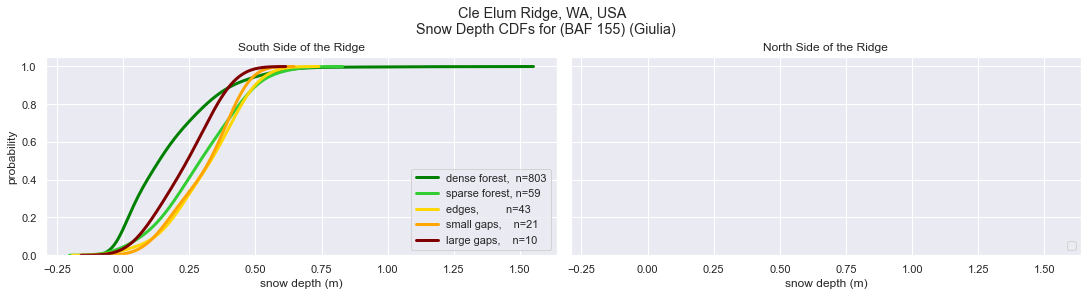

In [71]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15,4), constrained_layout = True)
alpha=0.7

number1 = 155
number2 = 155
plt.suptitle('Cle Elum Ridge, WA, USA \n Snow Depth CDFs for (BAF 155) (Giulia)')

# plots
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_100_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'dense forest,  n={np.unique(ds["hs_giulia_dce_rapid_reclass_100_s"].where(ds["baf_new"] == number1)).size}',  color='green',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_200_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'sparse forest, n={np.unique(ds["hs_giulia_dce_rapid_reclass_200_s"].where(ds["baf_new"] == number1)).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_300_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'edges,         n={np.unique(ds["hs_giulia_dce_rapid_reclass_300_s"].where(ds["baf_new"] == number1)).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_400_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'small gaps,    n={np.unique(ds["hs_giulia_dce_rapid_reclass_400_s"].where(ds["baf_new"] == number1)).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_500_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'large gaps,    n={np.unique(ds["hs_giulia_dce_rapid_reclass_500_s"].where(ds["baf_new"] == number1)).size}', color='maroon',   cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_100_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'dense forest,  n={np.unique(ds["hs_giulia_dce_rapid_reclass_100_n"].where(ds["baf_new"] == number2)).size}', color='green',    cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_200_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'sparse forest  n={np.unique(ds["hs_giulia_dce_rapid_reclass_200_n"].where(ds["baf_new"] == number2)).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_300_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'edges,         n={np.unique(ds["hs_giulia_dce_rapid_reclass_300_n"].where(ds["baf_new"] == number2)).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_400_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'small gaps,    n={np.unique(ds["hs_giulia_dce_rapid_reclass_400_n"].where(ds["baf_new"] == number2)).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_500_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'large gaps,    n={np.unique(ds["hs_giulia_dce_rapid_reclass_500_n"].where(ds["baf_new"] == number2)).size}', color='maroon',   cumulative=True, linewidth=3)


# labels
axes[0].set_title('South Side of the Ridge')
axes[1].set_title('North Side of the Ridge')

axes[0].set_xlabel('snow depth (m)')
axes[1].set_xlabel('snow depth (m)')

axes[0].set_ylabel('probability')
axes[1].set_ylabel('')

axes[0].legend(loc='lower right')
axes[1].legend(loc='lower right')
plt.show()

Do the same by DAH just to compare with the side of the ridge plot...

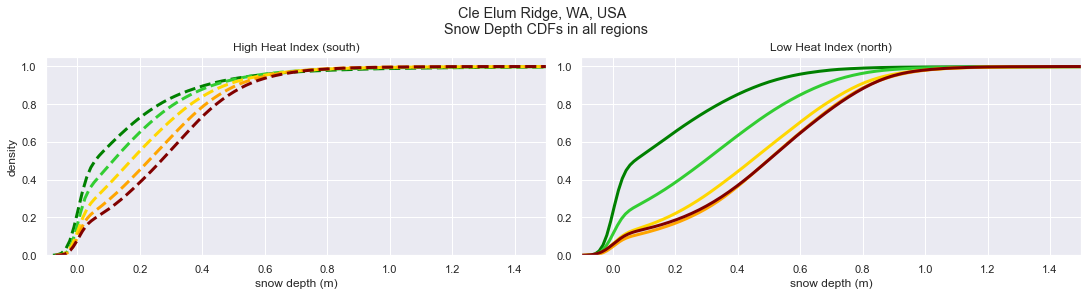

In [49]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(1, 2, sharex=True, sharey=False, figsize=(15,4), constrained_layout = True)
alpha=0.7


# plots
sns.kdeplot(ds['hs_dce_rapid_reclass_100_s_dah'].values.flatten(), ax=axes[0], color='green', label='dense forest', cumulative=True, linewidth=3, linestyle='dashed')
sns.kdeplot(ds['hs_dce_rapid_reclass_200_s_dah'].values.flatten(), ax=axes[0], color='limegreen', label='sparse forest', cumulative=True, linewidth=3, linestyle='dashed')
sns.kdeplot(ds['hs_dce_rapid_reclass_300_s_dah'].values.flatten(), ax=axes[0], color='gold', label='edges', cumulative=True, linewidth=3, linestyle='dashed')
sns.kdeplot(ds['hs_dce_rapid_reclass_400_s_dah'].values.flatten(), ax=axes[0], color='orange', label='small gaps', cumulative=True, linewidth=3, linestyle='dashed')
sns.kdeplot(ds['hs_dce_rapid_reclass_500_s_dah'].values.flatten(), ax=axes[0], color='maroon', label='large gaps', cumulative=True, linewidth=3, linestyle='dashed')

sns.kdeplot(ds['hs_dce_rapid_reclass_100_n_dah'].values.flatten(), ax=axes[1], color='green', label='dense forest', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_200_n_dah'].values.flatten(), ax=axes[1], color='limegreen', label='sparse forest', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_300_n_dah'].values.flatten(), ax=axes[1], color='gold', label='edges', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_400_n_dah'].values.flatten(), ax=axes[1], color='orange', label='small gaps', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_500_n_dah'].values.flatten(), ax=axes[1], color='maroon', label='large gaps', cumulative=True, linewidth=3)


# labels
axes[0].set_title('High Heat Index (south)')
axes[1].set_title('Low Heat Index (north)')

axes[0].set_xlabel('snow depth (m)')
axes[1].set_xlabel('snow depth (m)')

axes[0].set_ylabel('density')
axes[1].set_ylabel('')

axes[0].set_xlim(-0.1,1.5)

plt.suptitle('Cle Elum Ridge, WA, USA \n Snow Depth CDFs in all regions')
# plt.legend()
plt.show()

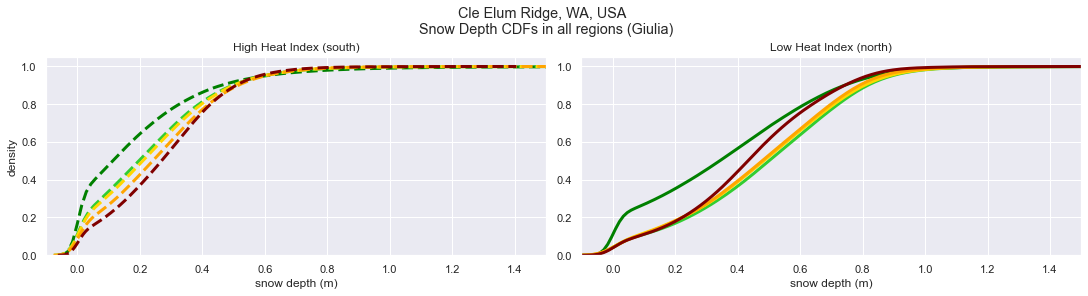

In [55]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(1, 2, sharex=True, sharey=False, figsize=(15,4), constrained_layout = True)
alpha=0.7


# plots
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_100_s_dah'].values.flatten(), ax=axes[0], color='green', label='dense forest', cumulative=True, linewidth=3, linestyle='dashed')
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_200_s_dah'].values.flatten(), ax=axes[0], color='limegreen', label='sparse forest', cumulative=True, linewidth=3, linestyle='dashed')
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_300_s_dah'].values.flatten(), ax=axes[0], color='gold', label='edges', cumulative=True, linewidth=3, linestyle='dashed')
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_400_s_dah'].values.flatten(), ax=axes[0], color='orange', label='small gaps', cumulative=True, linewidth=3, linestyle='dashed')
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_500_s_dah'].values.flatten(), ax=axes[0], color='maroon', label='large gaps', cumulative=True, linewidth=3, linestyle='dashed')

sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_100_n_dah'].values.flatten(), ax=axes[1], color='green', label='dense forest', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_200_n_dah'].values.flatten(), ax=axes[1], color='limegreen', label='sparse forest', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_300_n_dah'].values.flatten(), ax=axes[1], color='gold', label='edges', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_400_n_dah'].values.flatten(), ax=axes[1], color='orange', label='small gaps', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_500_n_dah'].values.flatten(), ax=axes[1], color='maroon', label='large gaps', cumulative=True, linewidth=3)


# labels
axes[0].set_title('High Heat Index (south)')
axes[1].set_title('Low Heat Index (north)')

axes[0].set_xlabel('snow depth (m)')
axes[1].set_xlabel('snow depth (m)')

axes[0].set_ylabel('density')
axes[1].set_ylabel('')

axes[0].set_xlim(-0.1,1.5)

plt.suptitle('Cle Elum Ridge, WA, USA \n Snow Depth CDFs in all regions (Giulia)')
# plt.legend()
plt.show()

In [124]:
# drop all data where gaps are bigger than 30 m 
ds2 = ds.where(ds['giulia_dce_rapid'] < 30)
ds2 = ds2.where(ds2['giulia_dce_rapid'] > -40)

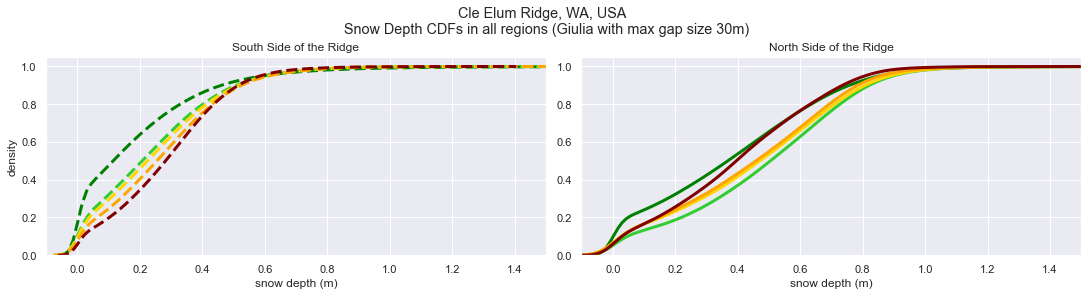

In [125]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(1, 2, sharex=True, sharey=False, figsize=(15,4), constrained_layout = True)
alpha=0.7


# plots
sns.kdeplot(ds2['hs_giulia_dce_rapid_reclass_100_s'].values.flatten(), ax=axes[0], color='green', label='dense forest', cumulative=True, linewidth=3, linestyle='dashed')
sns.kdeplot(ds2['hs_giulia_dce_rapid_reclass_200_s'].values.flatten(), ax=axes[0], color='limegreen', label='sparse forest', cumulative=True, linewidth=3, linestyle='dashed')
sns.kdeplot(ds2['hs_giulia_dce_rapid_reclass_300_s'].values.flatten(), ax=axes[0], color='gold', label='edges', cumulative=True, linewidth=3, linestyle='dashed')
sns.kdeplot(ds2['hs_giulia_dce_rapid_reclass_400_s'].values.flatten(), ax=axes[0], color='orange', label='small gaps', cumulative=True, linewidth=3, linestyle='dashed')
sns.kdeplot(ds2['hs_giulia_dce_rapid_reclass_500_s'].values.flatten(), ax=axes[0], color='maroon', label='large gaps', cumulative=True, linewidth=3, linestyle='dashed')

sns.kdeplot(ds2['hs_giulia_dce_rapid_reclass_100_n'].values.flatten(), ax=axes[1], color='green', label='dense forest', cumulative=True, linewidth=3)
sns.kdeplot(ds2['hs_giulia_dce_rapid_reclass_200_n'].values.flatten(), ax=axes[1], color='limegreen', label='sparse forest', cumulative=True, linewidth=3)
sns.kdeplot(ds2['hs_giulia_dce_rapid_reclass_300_n'].values.flatten(), ax=axes[1], color='gold', label='edges', cumulative=True, linewidth=3)
sns.kdeplot(ds2['hs_giulia_dce_rapid_reclass_400_n'].values.flatten(), ax=axes[1], color='orange', label='small gaps', cumulative=True, linewidth=3)
sns.kdeplot(ds2['hs_giulia_dce_rapid_reclass_500_n'].values.flatten(), ax=axes[1], color='maroon', label='large gaps', cumulative=True, linewidth=3)


# labels
axes[0].set_title('South Side of the Ridge')
axes[1].set_title('North Side of the Ridge')

axes[0].set_xlabel('snow depth (m)')
axes[1].set_xlabel('snow depth (m)')

axes[0].set_ylabel('density')
axes[1].set_ylabel('')

axes[0].set_xlim(-0.1,1.5)

plt.suptitle('Cle Elum Ridge, WA, USA \n Snow Depth CDFs in all regions (Giulia with max gap size 30m)')
# plt.legend()
plt.show()

# Other, previous plots... come back

c:\Users\Lumbr\miniconda3\envs\raster\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Lumbr\miniconda3\envs\raster\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Lumbr\miniconda3\envs\raster\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warning

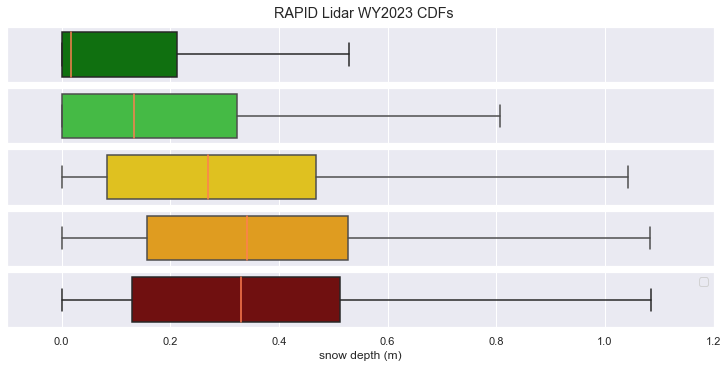

In [69]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(5, 1, sharex=True, sharey=False, figsize=(10,5), constrained_layout = True)

# plots
sns.boxplot(ds['hs_dce_rapid_reclass_100'].values.flatten(), ax=axes[0], color='green', fliersize=0, medianprops={"color":"coral"})
sns.boxplot(ds['hs_dce_rapid_reclass_200'].values.flatten(), ax=axes[1], color='limegreen', fliersize=0, medianprops={"color":"coral"})
sns.boxplot(ds['hs_dce_rapid_reclass_300'].values.flatten(), ax=axes[2], color='gold', fliersize=0, medianprops={"color":"coral"})
sns.boxplot(ds['hs_dce_rapid_reclass_400'].values.flatten(), ax=axes[3], color='orange', fliersize=0, medianprops={"color":"coral"})
sns.boxplot(ds['hs_dce_rapid_reclass_500'].values.flatten(), ax=axes[4], color='maroon', fliersize=0, medianprops={"color":"coral"})

# labels
plt.suptitle('RAPID Lidar WY2023 CDFs')
plt.xlabel('snow depth (m)')
# plt.ylabel('density')
plt.xlim(0,1)
plt.xlim(-0.1,1.2)

plt.legend()
plt.show()

## Snow depth by aspect, side of the ridge variables

Now, for north and south aspects by side of the ridge (not DAH)

c:\Users\Lumbr\miniconda3\envs\raster\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Lumbr\miniconda3\envs\raster\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Lumbr\miniconda3\envs\raster\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warning

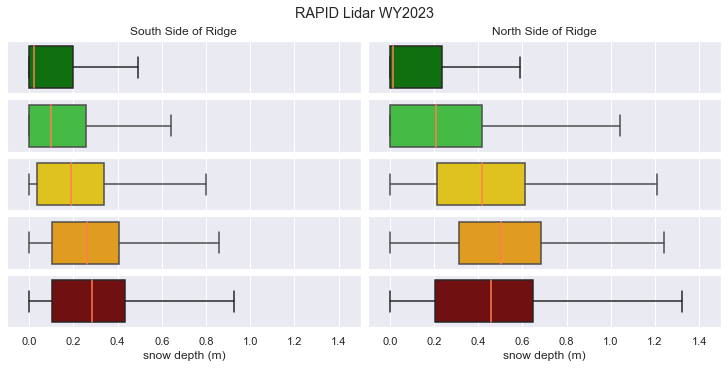

In [68]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(5, 2, sharex=True, sharey=False, figsize=(10,5), constrained_layout = True)

# plots
sns.boxplot(ds['hs_dce_rapid_reclass_100_s'].values.flatten(), ax=axes[0,0], color='green', fliersize=0, medianprops={"color":"coral"})
sns.boxplot(ds['hs_dce_rapid_reclass_200_s'].values.flatten(), ax=axes[1,0], color='limegreen', fliersize=0, medianprops={"color":"coral"})
sns.boxplot(ds['hs_dce_rapid_reclass_300_s'].values.flatten(), ax=axes[2,0], color='gold', fliersize=0, medianprops={"color":"coral"})
sns.boxplot(ds['hs_dce_rapid_reclass_400_s'].values.flatten(), ax=axes[3,0], color='orange', fliersize=0, medianprops={"color":"coral"})
sns.boxplot(ds['hs_dce_rapid_reclass_500_s'].values.flatten(), ax=axes[4,0], color='maroon', fliersize=0, medianprops={"color":"coral"})

sns.boxplot(ds['hs_dce_rapid_reclass_100_n'].values.flatten(), ax=axes[0,1], color='green', fliersize=0, medianprops={"color":"coral"})
sns.boxplot(ds['hs_dce_rapid_reclass_200_n'].values.flatten(), ax=axes[1,1], color='limegreen', fliersize=0, medianprops={"color":"coral"})
sns.boxplot(ds['hs_dce_rapid_reclass_300_n'].values.flatten(), ax=axes[2,1], color='gold', fliersize=0, medianprops={"color":"coral"})
sns.boxplot(ds['hs_dce_rapid_reclass_400_n'].values.flatten(), ax=axes[3,1], color='orange', fliersize=0, medianprops={"color":"coral"})
sns.boxplot(ds['hs_dce_rapid_reclass_500_n'].values.flatten(), ax=axes[4,1], color='maroon', fliersize=0, medianprops={"color":"coral"})

# labels
plt.suptitle('RAPID Lidar WY2023')
axes[4,0].set_xlabel('snow depth (m)')
axes[4,1].set_xlabel('snow depth (m)')

axes[0,0].set_title('South Side of Ridge')
axes[0,1].set_title('North Side of Ridge')

plt.xlim(-0.1,1.5)
plt.show()

c:\Users\Lumbr\miniconda3\envs\raster\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Lumbr\miniconda3\envs\raster\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Lumbr\miniconda3\envs\raster\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warning

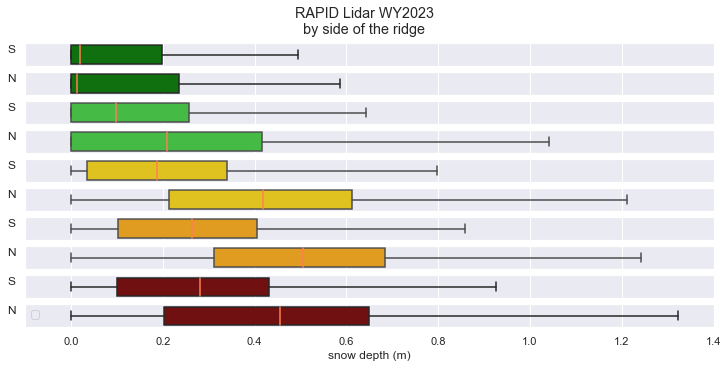

In [109]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(10, 1, sharex=True, sharey=False, figsize=(10,5), constrained_layout = True)

# plots
sns.boxplot(ds['hs_dce_rapid_reclass_100_s'].values.flatten(), ax=axes[0], color='green', fliersize=0, medianprops={"color":"coral"})
sns.boxplot(ds['hs_dce_rapid_reclass_100_n'].values.flatten(), ax=axes[1], color='green', fliersize=0, medianprops={"color":"coral"})

sns.boxplot(ds['hs_dce_rapid_reclass_200_s'].values.flatten(), ax=axes[2], color='limegreen', fliersize=0, medianprops={"color":"coral"})
sns.boxplot(ds['hs_dce_rapid_reclass_200_n'].values.flatten(), ax=axes[3], color='limegreen', fliersize=0, medianprops={"color":"coral"})

sns.boxplot(ds['hs_dce_rapid_reclass_300_s'].values.flatten(), ax=axes[4], color='gold', fliersize=0, medianprops={"color":"coral"})
sns.boxplot(ds['hs_dce_rapid_reclass_300_n'].values.flatten(), ax=axes[5], color='gold', fliersize=0, medianprops={"color":"coral"})

sns.boxplot(ds['hs_dce_rapid_reclass_400_s'].values.flatten(), ax=axes[6], color='orange', fliersize=0, medianprops={"color":"coral"})
sns.boxplot(ds['hs_dce_rapid_reclass_400_n'].values.flatten(), ax=axes[7], color='orange', fliersize=0, medianprops={"color":"coral"})

sns.boxplot(ds['hs_dce_rapid_reclass_500_s'].values.flatten(), ax=axes[8], color='maroon', fliersize=0, medianprops={"color":"coral"})
sns.boxplot(ds['hs_dce_rapid_reclass_500_n'].values.flatten(), ax=axes[9], color='maroon', fliersize=0, medianprops={"color":"coral"})

# labels
plt.suptitle('RAPID Lidar WY2023\nby side of the ridge')
plt.xlabel('snow depth (m)')
# plt.ylabel('density')
plt.xlim(0,1)
plt.xlim(-0.1,1.4)

axes[0].set_ylabel('S', rotation=360)
axes[1].set_ylabel('N', rotation=360)

axes[2].set_ylabel('S', rotation=360)
axes[3].set_ylabel('N', rotation=360)

axes[4].set_ylabel('S', rotation=360)
axes[5].set_ylabel('N', rotation=360)

axes[6].set_ylabel('S', rotation=360)
axes[7].set_ylabel('N', rotation=360)

axes[8].set_ylabel('S', rotation=360)
axes[9].set_ylabel('N', rotation=360)

plt.legend()
plt.show()

## Plots from inside the timeseries 10x10 plots, `baf_plots`

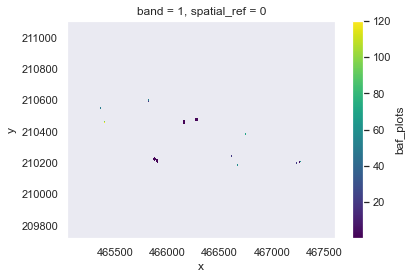

In [92]:
ds['baf_plots'].plot()

In [94]:
ds['hs_rapid_baf_plot_CNF'] = ds['hs_rapid'].where((ds['baf_plots'] ==   1) & (ds['baf_ridge'] ==  -1))
ds['hs_rapid_baf_plot_CSF'] = ds['hs_rapid'].where((ds['baf_plots'] ==   1) & (ds['baf_ridge'] ==   1))

ds['hs_rapid_baf_plot_CNG'] = ds['hs_rapid'].where((ds['baf_plots'] ==   2) & (ds['baf_ridge'] ==  -1))
ds['hs_rapid_baf_plot_CSG'] = ds['hs_rapid'].where((ds['baf_plots'] ==   2) & (ds['baf_ridge'] ==   1))

ds['hs_rapid_baf_plot_CN20'] = ds['hs_rapid'].where((ds['baf_plots'] ==  20) & (ds['baf_ridge'] ==  -1))
ds['hs_rapid_baf_plot_CS20'] = ds['hs_rapid'].where((ds['baf_plots'] ==  20) & (ds['baf_ridge'] ==   1))

ds['hs_rapid_baf_plot_CN50'] = ds['hs_rapid'].where((ds['baf_plots'] ==  50) & (ds['baf_ridge'] ==  -1))
ds['hs_rapid_baf_plot_CS50'] = ds['hs_rapid'].where((ds['baf_plots'] ==  50) & (ds['baf_ridge'] ==   1))

ds['hs_rapid_baf_plot_CN60'] = ds['hs_rapid'].where((ds['baf_plots'] ==  60) & (ds['baf_ridge'] ==  -1))
ds['hs_rapid_baf_plot_CS60'] = ds['hs_rapid'].where((ds['baf_plots'] ==  60) & (ds['baf_ridge'] ==   1))

ds['hs_rapid_baf_plot_CN70'] = ds['hs_rapid'].where((ds['baf_plots'] ==  70)   & (ds['baf_ridge'] ==  -1))
ds['hs_rapid_baf_plot_CS120'] = ds['hs_rapid'].where((ds['baf_plots'] ==  120) & (ds['baf_ridge'] ==   1))

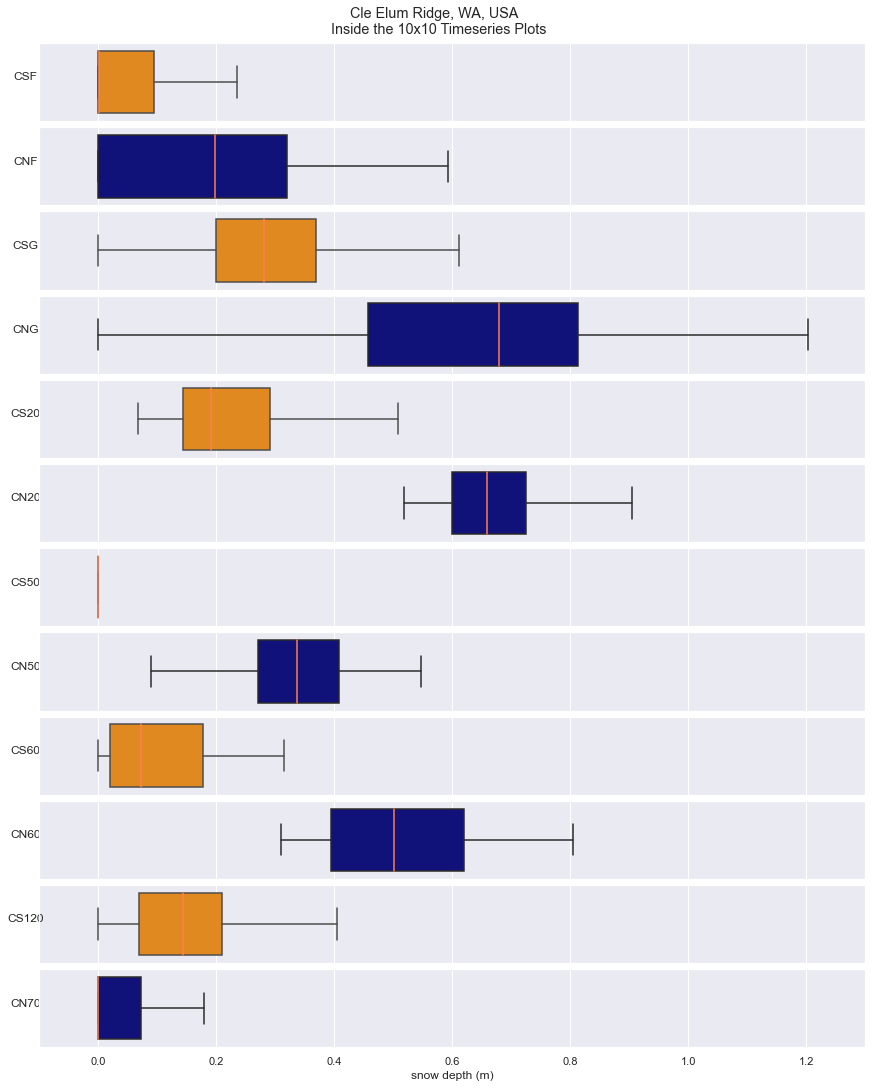

In [106]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(12, 1, sharex=True, sharey=False, figsize=(12,15), constrained_layout = True)
alpha=0.7

# south side 
sns.boxplot(ax=axes[0], x = ds['hs_rapid_baf_plot_CSF'].values.flatten(), color=colorsouth, medianprops={"color":"coral"}, showfliers=False)
sns.boxplot(ax=axes[1], x = ds['hs_rapid_baf_plot_CNF'].values.flatten(), color=colornorth, medianprops={"color":"coral"}, showfliers=False)

sns.boxplot(ax=axes[2], x = ds['hs_rapid_baf_plot_CSG'].values.flatten(), color=colorsouth, medianprops={"color":"coral"}, showfliers=False)
sns.boxplot(ax=axes[3], x = ds['hs_rapid_baf_plot_CNG'].values.flatten(), color=colornorth, medianprops={"color":"coral"}, showfliers=False)

sns.boxplot(ax=axes[4], x = ds['hs_rapid_baf_plot_CS20'].values.flatten(), color=colorsouth, medianprops={"color":"coral"}, showfliers=False)
sns.boxplot(ax=axes[5], x = ds['hs_rapid_baf_plot_CN20'].values.flatten(), color=colornorth, medianprops={"color":"coral"}, showfliers=False)

sns.boxplot(ax=axes[6], x = ds['hs_rapid_baf_plot_CS50'].values.flatten(), color=colorsouth, medianprops={"color":"coral"}, showfliers=False)
sns.boxplot(ax=axes[7], x = ds['hs_rapid_baf_plot_CN50'].values.flatten(), color=colornorth, medianprops={"color":"coral"}, showfliers=False)

sns.boxplot(ax=axes[8], x = ds['hs_rapid_baf_plot_CS60'].values.flatten(), color=colorsouth, medianprops={"color":"coral"}, showfliers=False)
sns.boxplot(ax=axes[9], x = ds['hs_rapid_baf_plot_CN60'].values.flatten(), color=colornorth, medianprops={"color":"coral"}, showfliers=False)

sns.boxplot(ax=axes[10], x = ds['hs_rapid_baf_plot_CS120'].values.flatten(), color=colorsouth, medianprops={"color":"coral"}, showfliers=False)
sns.boxplot(ax=axes[11], x = ds['hs_rapid_baf_plot_CN70'].values.flatten(),  color=colornorth, medianprops={"color":"coral"}, showfliers=False)


# labels
axes[0].set_ylabel('CSF', rotation=360)
axes[1].set_ylabel('CNF', rotation=360)

axes[2].set_ylabel('CSG', rotation=360)
axes[3].set_ylabel('CNG', rotation=360)

axes[4].set_ylabel('CS20', rotation=360)
axes[5].set_ylabel('CN20', rotation=360)

axes[6].set_ylabel('CS50', rotation=360)
axes[7].set_ylabel('CN50', rotation=360)

axes[8].set_ylabel('CS60', rotation=360)
axes[9].set_ylabel('CN60', rotation=360)

axes[10].set_ylabel('CS120', rotation=360)
axes[11].set_ylabel('CN70', rotation=360)

axes[11].set_xlabel('snow depth (m)')

# adjust x limits
axes[0].set_xlim(-0.1,1.3)

plt.suptitle('Cle Elum Ridge, WA, USA \n Inside the 10x10 Timeseries Plots')

plt.show()

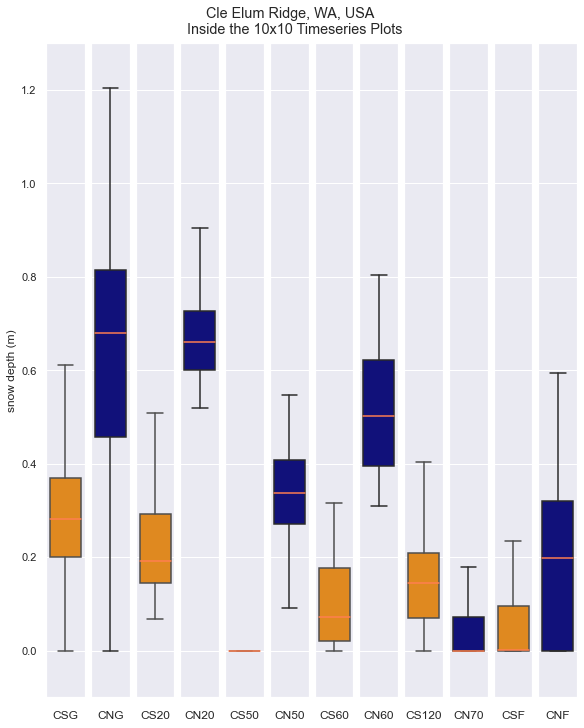

In [115]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(1, 12, sharex=True, sharey=True, figsize=(8,10), constrained_layout = True)
alpha=0.7

# south side 

sns.boxplot(ax=axes[0], y = ds['hs_rapid_baf_plot_CSG'].values.flatten(), color=colorsouth, medianprops={"color":"coral"}, showfliers=False)
sns.boxplot(ax=axes[1], y = ds['hs_rapid_baf_plot_CNG'].values.flatten(), color=colornorth, medianprops={"color":"coral"}, showfliers=False)

sns.boxplot(ax=axes[2], y = ds['hs_rapid_baf_plot_CS20'].values.flatten(), color=colorsouth, medianprops={"color":"coral"}, showfliers=False)
sns.boxplot(ax=axes[3], y = ds['hs_rapid_baf_plot_CN20'].values.flatten(), color=colornorth, medianprops={"color":"coral"}, showfliers=False)

sns.boxplot(ax=axes[4], y = ds['hs_rapid_baf_plot_CS50'].values.flatten(), color=colorsouth, medianprops={"color":"coral"}, showfliers=False)
sns.boxplot(ax=axes[5], y = ds['hs_rapid_baf_plot_CN50'].values.flatten(), color=colornorth, medianprops={"color":"coral"}, showfliers=False)

sns.boxplot(ax=axes[6], y = ds['hs_rapid_baf_plot_CS60'].values.flatten(), color=colorsouth, medianprops={"color":"coral"}, showfliers=False)
sns.boxplot(ax=axes[7], y = ds['hs_rapid_baf_plot_CN60'].values.flatten(), color=colornorth, medianprops={"color":"coral"}, showfliers=False)

sns.boxplot(ax=axes[8], y = ds['hs_rapid_baf_plot_CS120'].values.flatten(), color=colorsouth, medianprops={"color":"coral"}, showfliers=False)
sns.boxplot(ax=axes[9], y = ds['hs_rapid_baf_plot_CN70'].values.flatten(),  color=colornorth, medianprops={"color":"coral"}, showfliers=False)

sns.boxplot(ax=axes[10], y = ds['hs_rapid_baf_plot_CSF'].values.flatten(), color=colorsouth, medianprops={"color":"coral"}, showfliers=False)
sns.boxplot(ax=axes[11], y = ds['hs_rapid_baf_plot_CNF'].values.flatten(), color=colornorth, medianprops={"color":"coral"}, showfliers=False)


# labels
axes[10].set_xlabel('CSF', rotation=360)
axes[11].set_xlabel('CNF', rotation=360)

axes[0].set_xlabel('CSG', rotation=360)
axes[1].set_xlabel('CNG', rotation=360)

axes[2].set_xlabel('CS20', rotation=360)
axes[3].set_xlabel('CN20', rotation=360)

axes[4].set_xlabel('CS50', rotation=360)
axes[5].set_xlabel('CN50', rotation=360)

axes[6].set_xlabel('CS60', rotation=360)
axes[7].set_xlabel('CN60', rotation=360)

axes[8].set_xlabel('CS120', rotation=360)
axes[9].set_xlabel('CN70', rotation=360)

axes[0].set_ylabel('snow depth (m)')

# adjust x limits
axes[0].set_ylim(-0.1,1.3)

plt.suptitle('Cle Elum Ridge, WA, USA \n Inside the 10x10 Timeseries Plots')

plt.show()

# Calculate the % Canopy Cover Metric

Let's go one baf at a time.

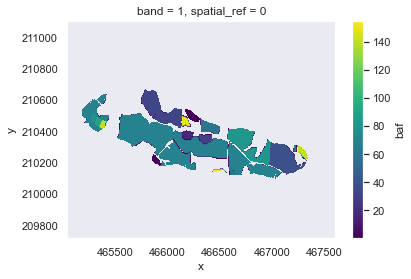

In [163]:
ds['baf'].plot()

In [177]:
# Define the canopy cover threshold
canopy_threshold = 2

# Determine the canopy grid cells
canopy_mask = ds['chmws_rapid'] > canopy_threshold

# Calculate the total number of canopy grid cells in the forest treatment area
baf_new_value = 1
treatment_area = ds['baf_new'].where(ds['baf_new'] == baf_new_value)
total_canopy_cells = np.sum(canopy_mask * treatment_area)

# Calculate the total number of grid cells in the forest treatment area
total_treatment_cells = np.sum(treatment_area)

# Calculate the percentage of canopy cover
percentage_canopy_cover = (total_canopy_cells / total_treatment_cells) * 100

print(f'Percentage of canopy cover in the forest treatment area: {percentage_canopy_cover.values}%')

Percentage of canopy cover in the forest treatment area: 64.73274827003479%


This I created the code below, which is used in the large loop to do this for all the BAF. Compare the values to make sure everything is correct. 

In [178]:
BAF = 1
treatment_area = ds['baf_new'].where(ds['baf_new'] == BAF)
total_canopy_cells = np.sum(canopy_mask * treatment_area)
total_treatment_cells = np.sum(treatment_area)
percentage_canopy_cover = (total_canopy_cells / total_treatment_cells) * 100
print(f'Percentage of canopy cover in the forest treatment area for BAF {BAF}: {percentage_canopy_cover.values}%')

BAF = 2
treatment_area = ds['baf_new'].where(ds['baf_new'] == BAF)
total_canopy_cells = np.sum(canopy_mask * treatment_area)
total_treatment_cells = np.sum(treatment_area)
percentage_canopy_cover = (total_canopy_cells / total_treatment_cells) * 100
print(f'Percentage of canopy cover in the forest treatment area for BAF {BAF}: {percentage_canopy_cover.values}%')

BAF = 17
treatment_area = ds['baf_new'].where(ds['baf_new'] == BAF)
total_canopy_cells = np.sum(canopy_mask * treatment_area)
total_treatment_cells = np.sum(treatment_area)
percentage_canopy_cover = (total_canopy_cells / total_treatment_cells) * 100
print(f'Percentage of canopy cover in the forest treatment area for BAF {BAF}: {percentage_canopy_cover.values}%')

BAF = 32
treatment_area = ds['baf_new'].where(ds['baf_new'] == BAF)
total_canopy_cells = np.sum(canopy_mask * treatment_area)
total_treatment_cells = np.sum(treatment_area)
percentage_canopy_cover = (total_canopy_cells / total_treatment_cells) * 100
print(f'Percentage of canopy cover in the forest treatment area for BAF {BAF}: {percentage_canopy_cover.values}%')


Percentage of canopy cover in the forest treatment area for BAF 1: 64.73274827003479%
Percentage of canopy cover in the forest treatment area for BAF 2: 95.09132504463196%
Percentage of canopy cover in the forest treatment area for BAF 17: 29.30718958377838%
Percentage of canopy cover in the forest treatment area for BAF 32: 59.14224982261658%


In [181]:
# Initialize the DataFrame
df = pd.DataFrame(columns=['BAF', 'canopy_cover_2m', 'canopy_cover_3m', 'canopy_cover_4m'])
df['BAF'] = [1, 2, 17, 30, 32, 38, 60, 69, 80, 82, 90, 140, 150, 155]

# Loop through the BAF values and calculate the percentage of canopy cover
for index, row in df.iterrows():
    BAF = row['BAF']
    
    # Define the canopy cover threshold
    canopy_threshold = 2

    # Determine the canopy grid cells
    canopy_mask = ds['chmws_rapid'] > canopy_threshold

    # Calculate the total number of canopy grid cells in the forest treatment area
    treatment_area = ds['baf_new'].where(ds['baf_new'] == BAF)
    total_canopy_cells = np.sum(canopy_mask * treatment_area)

    # Calculate the total number of grid cells in the forest treatment area
    total_treatment_cells = np.sum(treatment_area)

    # Calculate the percentage of canopy cover
    percentage_canopy_cover = (total_canopy_cells / total_treatment_cells) * 100

    # Update the DataFrame with the percentage of canopy cover
    df.at[index, 'canopy_cover_2m'] = percentage_canopy_cover.values.astype(int)
    
    # Now, do the same thing for a canopy threshold of 3 meters 
    canopy_threshold = 3

    # Determine the canopy grid cells
    canopy_mask = ds['chmws_rapid'] > canopy_threshold

    # Calculate the total number of canopy grid cells in the forest treatment area
    treatment_area = ds['baf_new'].where(ds['baf_new'] == BAF)
    total_canopy_cells = np.sum(canopy_mask * treatment_area)

    # Calculate the total number of grid cells in the forest treatment area
    total_treatment_cells = np.sum(treatment_area)

    # Calculate the percentage of canopy cover
    percentage_canopy_cover = (total_canopy_cells / total_treatment_cells) * 100

    # Update the DataFrame with the percentage of canopy cover
    df.at[index, 'canopy_cover_3m'] = percentage_canopy_cover.values.astype(int)
    
    # Now, do the same thing for a canopy threshold of 4 meters 
    canopy_threshold = 4

    # Determine the canopy grid cells
    canopy_mask = ds['chmws_rapid'] > canopy_threshold

    # Calculate the total number of canopy grid cells in the forest treatment area
    treatment_area = ds['baf_new'].where(ds['baf_new'] == BAF)
    total_canopy_cells = np.sum(canopy_mask * treatment_area)

    # Calculate the total number of grid cells in the forest treatment area
    total_treatment_cells = np.sum(treatment_area)

    # Calculate the percentage of canopy cover
    percentage_canopy_cover = (total_canopy_cells / total_treatment_cells) * 100

    # Update the DataFrame with the percentage of canopy cover
    df.at[index, 'canopy_cover_4m'] = percentage_canopy_cover.values.astype(int)
    

# Print the DataFrame
print(df)

    BAF canopy_cover_2m canopy_cover_3m canopy_cover_4m
0     1              64              55              47
1     2              95              93              91
2    17              29              23              18
3    30              34              30              27
4    32              59              53              49
5    38              45              42              39
6    60              51              48              45
7    69              56              53              50
8    80              53              47              44
9    82              65              62              58
10   90              58              56              54
11  140              67              64              60
12  150              99              99              98
13  155              91              89              87


In [195]:
df.dtypes

BAF                int32
canopy_cover_2m    int32
canopy_cover_3m    int32
canopy_cover_4m    int32
dtype: object

In [196]:
# change the type to integer for all columns 
df = df.astype(int)

In [198]:
df.canopy_cover_2m.dtype

dtype('int32')

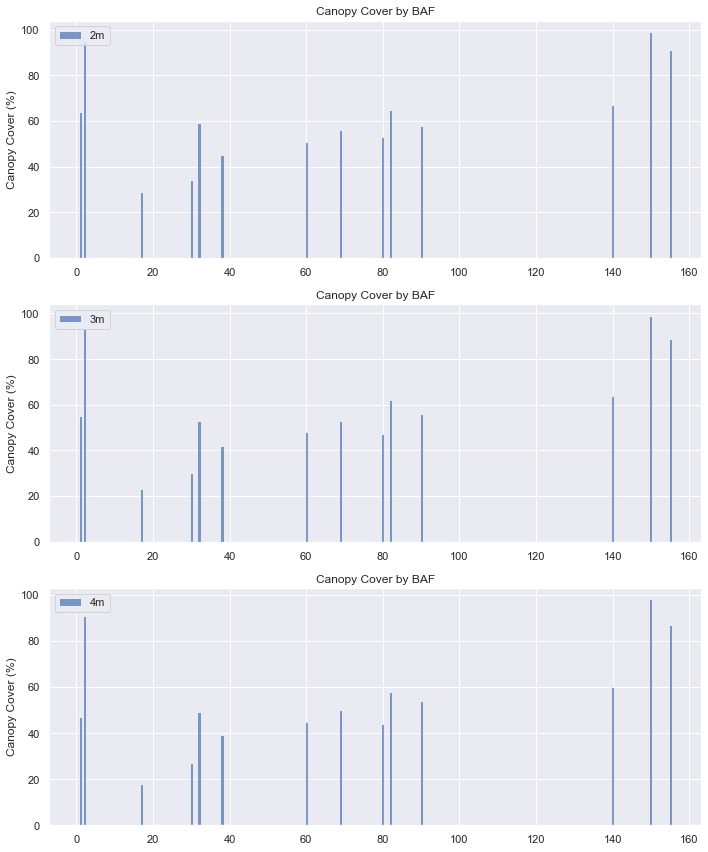

In [199]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(10, 12))

ax1.bar(df['BAF'], df['canopy_cover_2m'], label='2m', alpha=0.7)
ax1.set_ylabel('Canopy Cover (%)')
ax1.set_title('Canopy Cover by BAF')
ax1.legend(loc='upper left')

ax2.bar(df['BAF'], df['canopy_cover_3m'], label='3m', alpha=0.7)
ax2.set_ylabel('Canopy Cover (%)')
ax2.set_title('Canopy Cover by BAF')
ax2.legend(loc='upper left')

ax3.bar(df['BAF'], df['canopy_cover_4m'], label='4m', alpha=0.7)
ax3.set_ylabel('Canopy Cover (%)')
ax3.set_title('Canopy Cover by BAF')
ax3.legend(loc='upper left')

plt.tight_layout()
plt.show()

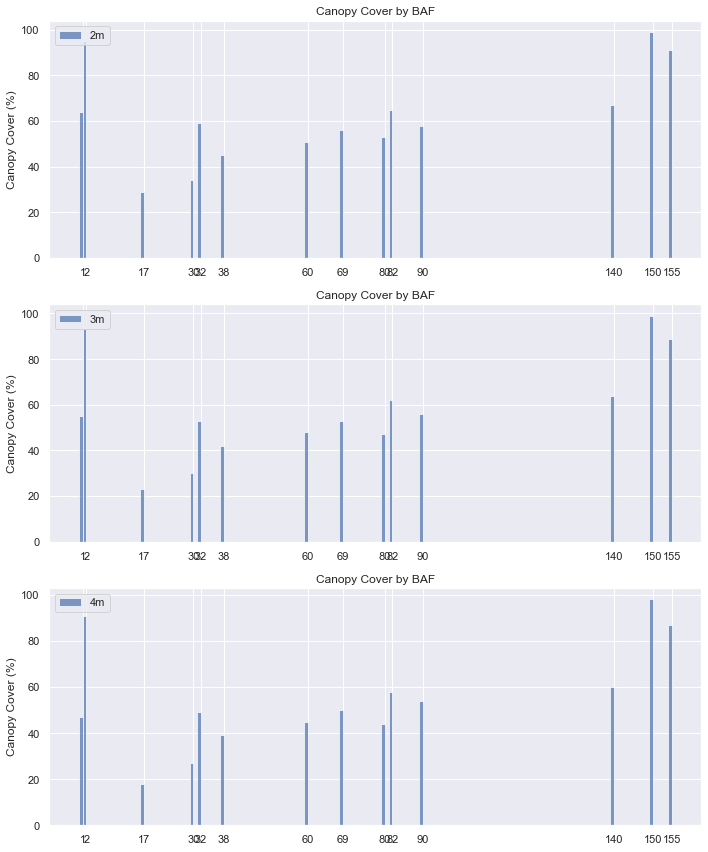

In [201]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(10, 12))

width = 1

ax1.bar(df['BAF'] - width/2, df['canopy_cover_2m'], width=width, label='2m', alpha=0.7)
ax1.set_ylabel('Canopy Cover (%)')
ax1.set_title('Canopy Cover by BAF')
ax1.set_xticks(df['BAF'])
ax1.legend(loc='upper left')

ax2.bar(df['BAF'] - width/2, df['canopy_cover_3m'], width=width, label='3m', alpha=0.7)
ax2.set_ylabel('Canopy Cover (%)')
ax2.set_title('Canopy Cover by BAF')
ax2.set_xticks(df['BAF'])
ax2.legend(loc='upper left')

ax3.bar(df['BAF'] - width/2, df['canopy_cover_4m'], width=width, label='4m', alpha=0.7)
ax3.set_ylabel('Canopy Cover (%)')
ax3.set_title('Canopy Cover by BAF')
ax3.set_xticks(df['BAF'])
ax3.legend(loc='upper left')

plt.tight_layout()
plt.show()

In [191]:
df.dtypes

BAF                int32
canopy_cover_2m    int32
canopy_cover_3m    int32
canopy_cover_4m    int32
dtype: object

In [194]:
df

BAF  canopy_cover_2m  canopy_cover_3m  canopy_cover_4m
0     1               64               55               47
1     2               95               93               91
2    17               29               23               18
3    30               34               30               27
4    32               59               53               49
5    38               45               42               39
6    60               51               48               45
7    69               56               53               50
8    80               53               47               44
9    82               65               62               58
10   90               58               56               54
11  140               67               64               60
12  150               99               99               98
13  155               91               89               87

Text(0.5, 1.0, 'threshold for 2m')

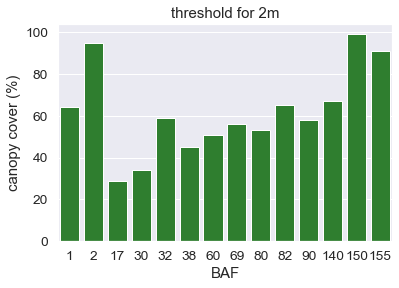

In [243]:
# Now, plot these to compare. 
sns.barplot(data=df, x='BAF', y='canopy_cover_2m', color='forestgreen', label='2m')
plt.ylabel('canopy cover (%)')
plt.title('threshold for 2m')

In [217]:
# create a version of this dataframe, df2, which uses a variable hue to show the different canopy cover values
df2 = pd.melt(df, id_vars=['BAF'], value_vars=['canopy_cover_2m', 'canopy_cover_3m', 'canopy_cover_4m'], var_name='threshold', value_name='canopy_cover')

In [218]:
df2.head()

BAF        threshold  canopy_cover
0    1  canopy_cover_2m            64
1    2  canopy_cover_2m            95
2   17  canopy_cover_2m            29
3   30  canopy_cover_2m            34
4   32  canopy_cover_2m            59

Text(0.5, 1.0, 'percentage of canopy cover in each treatment (with 2m, 3m, and 4m canopy height thresholds)')

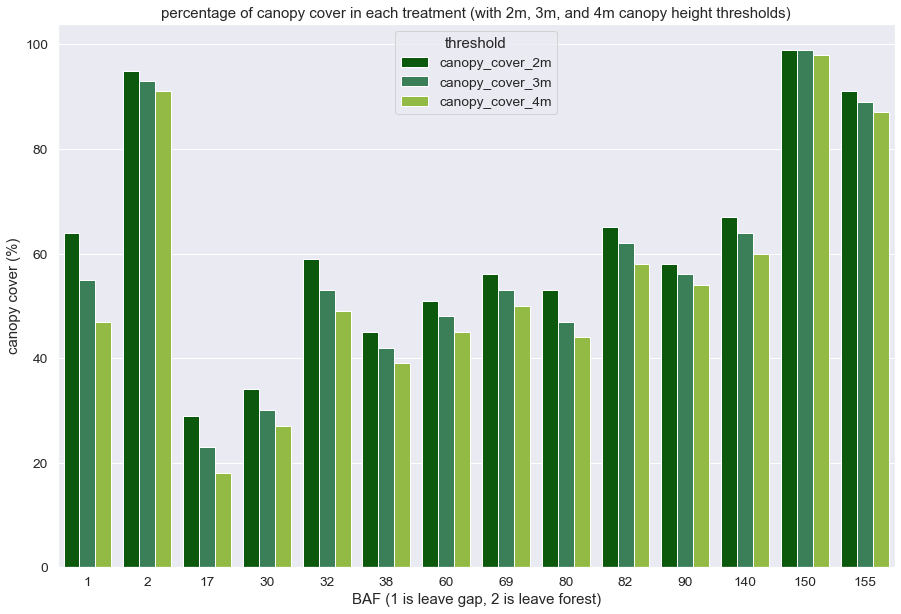

In [240]:
# increase figure size
fig = plt.figure(figsize=(15, 10))
color='forestgreen'
palette=['darkgreen', 'seagreen', 'yellowgreen']

# sns.barplot(data=df2, x='BAF', y='canopy_cover', hue='threshold', color='green')

sns.barplot(data=df2, x='BAF', y='canopy_cover', hue='threshold', palette=palette)

plt.xlabel('BAF (1 is leave gap, 2 is leave forest)')
plt.ylabel('canopy cover (%)')
plt.title('percentage of canopy cover in each treatment (with 2m, 3m, and 4m canopy height thresholds)')

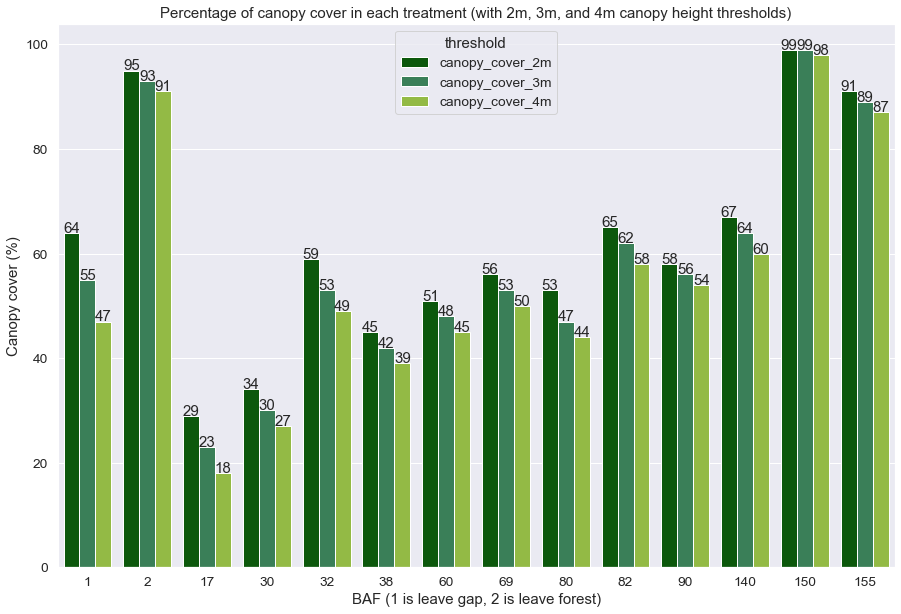

In [248]:
fig = plt.figure(figsize=(15, 10))
color = 'forestgreen'
palette = ['darkgreen', 'seagreen', 'yellowgreen']

# Create a barplot with values
barplot = sns.barplot(data=df2, x='BAF', y='canopy_cover', hue='threshold', palette=palette)

# Add values on top of each bar
for p in barplot.patches:
    height = p.get_height()
    plt.text(p.get_x()+p.get_width()/2., 
             height + 0.1, 
             '{:1.0f}'.format(height), 
             ha="center")

# Customize the layout
plt.xlabel('BAF (1 is leave gap, 2 is leave forest)')
plt.ylabel('Canopy cover (%)')
plt.title('Percentage of canopy cover in each treatment (with 2m, 3m, and 4m'
          ' canopy height thresholds)')

plt.show()

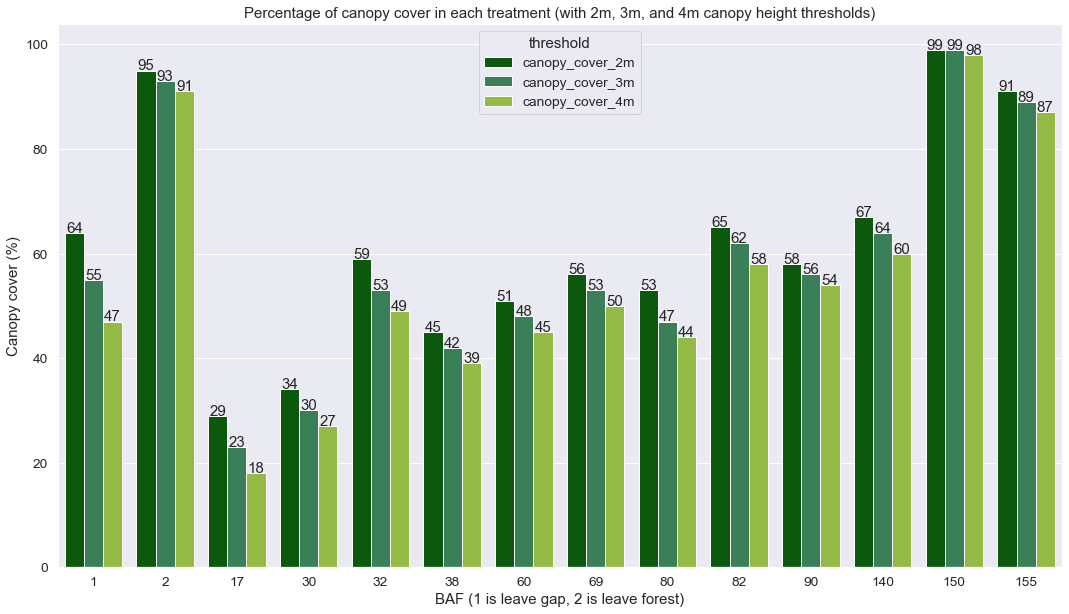

In [249]:
fig = plt.figure(figsize=(18, 10))
color = 'forestgreen'
palette = ['darkgreen', 'seagreen', 'yellowgreen']

# Create a barplot with values
barplot = sns.barplot(data=df2, x='BAF', y='canopy_cover', hue='threshold', palette=palette)

# Add values on top of each bar
for p in barplot.patches:
    height = p.get_height()
    plt.text(p.get_x()+p.get_width()/2., 
             height + 0.1, 
             '{:1.0f}'.format(height), 
             ha="center")

# Customize the layout
plt.xlabel('BAF (1 is leave gap, 2 is leave forest)')
plt.ylabel('Canopy cover (%)')
plt.title('Percentage of canopy cover in each treatment (with 2m, 3m, and 4m'
          ' canopy height thresholds)')

plt.show()

Now, I want to make this same plot for the % canopy cover at the timeseries sites. 

## DCE Groups Histograms

KeyError: 'dce_ncalm_baf_new_30'

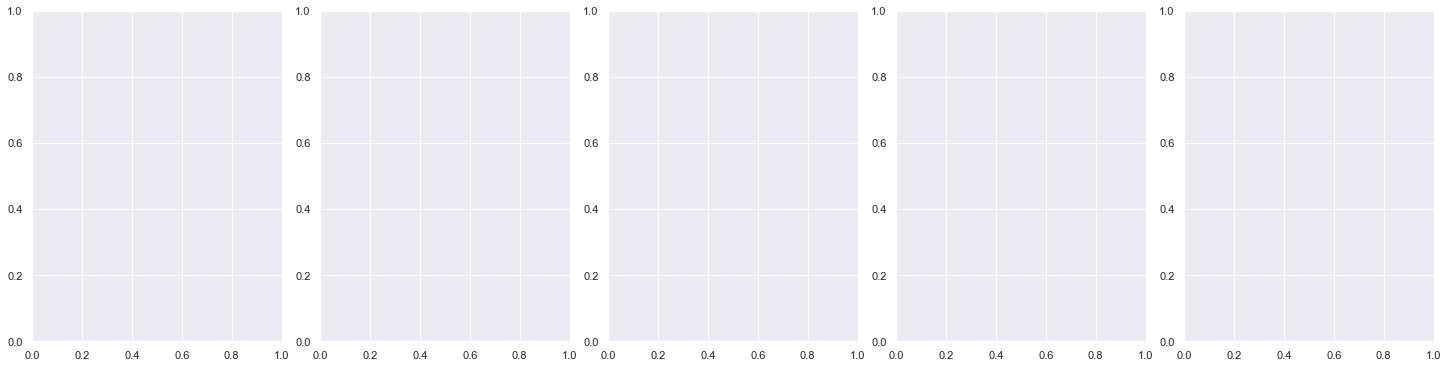

In [15]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(1, 5, sharex=True, sharey=False, figsize=(20,5), constrained_layout = True)
# colorpre='darkslategrey'
# colorpos='mediumaquamarine'
colorpre='sienna'
colorpos='darkslategrey'
alpha=0.7

# plots 
# baf 30
ds['dce_ncalm_reclass'].where(ds['dce_ncalm_baf_new_30'].notnull()).plot.hist(ax=axes[0],color=colorpre, label='pre-treatment', alpha=alpha)
ds['dce_rapid_reclass'].where(ds['dce_rapid_baf_new_30'].notnull()).plot.hist(ax=axes[0],color=colorpos, label='post-treatment', alpha=alpha)

# baf 60
ds['dce_ncalm_reclass'].where(ds['dce_ncalm_baf_new_60'].notnull()).plot.hist(ax=axes[1],color=colorpre, alpha=alpha)
ds['dce_rapid_reclass'].where(ds['dce_rapid_baf_new_60'].notnull()).plot.hist(ax=axes[1],color=colorpos, alpha=alpha)

# baf 80
ds['dce_ncalm_reclass'].where(ds['dce_ncalm_baf_new_80'].notnull()).plot.hist(ax=axes[2],color=colorpre, alpha=alpha)
ds['dce_rapid_reclass'].where(ds['dce_rapid_baf_new_80'].notnull()).plot.hist(ax=axes[2],color=colorpos, alpha=alpha)

# baf 90
ds['dce_ncalm_reclass'].where(ds['dce_ncalm_baf_new_90'].notnull()).plot.hist(ax=axes[3],color=colorpre, alpha=alpha)
ds['dce_rapid_reclass'].where(ds['dce_rapid_baf_new_90'].notnull()).plot.hist(ax=axes[3],color=colorpos, alpha=alpha)

# baf 140
ds['dce_ncalm_reclass'].where(ds['dce_ncalm_baf_new_140'].notnull()).plot.hist(ax=axes[4],color=colorpre, alpha=alpha)
ds['dce_rapid_reclass'].where(ds['dce_rapid_baf_new_140'].notnull()).plot.hist(ax=axes[4],color=colorpos, alpha=alpha)



# labels
axes[0].set_title('30 BAF')
axes[1].set_title('60 BAF')
axes[2].set_title('80 BAF')
axes[3].set_title('90 BAF')
axes[4].set_title('140 BAF')

axes[0].set_xlabel('DCE Group')
axes[1].set_xlabel('DCE Group')
axes[2].set_xlabel('DCE Group')
axes[3].set_xlabel('DCE Group')
axes[4].set_xlabel('DCE Group')
axes[0].set_ylabel('count')
axes[1].set_ylabel('')
axes[2].set_ylabel('')
axes[3].set_ylabel('')
axes[4].set_ylabel('')

# adjust x labels 
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[1] = 'dense'
labels[2] = 'forest'
labels[3] = 'edges'
labels[4] = 'small gap'
labels[5] = 'large\ngap'
axes[0].set_xticklabels(labels)


plt.suptitle('Cle Elum Ridge, WA, USA \n Updated BAF Polygons')
axes[0].legend(loc='upper left')

plt.show()

Go by aspect. Do one row with positive DAH and one row with negative 

In [ ]:
# plot of a histogram of all those variables 
fig, axes= plt.subplots(2, 5, sharex=True, sharey=False, figsize=(16,6), constrained_layout = True)
alpha=0.7

# plots 
# for south side of the ridge
ds['dce_ncalm_baf_new_30'].where(ds['baf_ridge'] == 1).plot.hist(ax=axes[0,0],color=colorpre, label='pre-treatment', alpha=alpha)
ds['dce_rapid_baf_new_30'].where(ds['baf_ridge'] == 1).plot.hist(ax=axes[0,0],color=colorpos, label='post-treatment', alpha=alpha)

ds['dce_ncalm_baf_new_60'].where(ds['baf_ridge'] == 1).plot.hist(ax=axes[0,1],color=colorpre, alpha=alpha)
ds['dce_rapid_baf_new_60'].where(ds['baf_ridge'] == 1).plot.hist(ax=axes[0,1],color=colorpos, alpha=alpha)

ds['dce_ncalm_baf_new_80'].where(ds['baf_ridge'] == 1).plot.hist(ax=axes[0,2],color=colorpre, alpha=alpha)
ds['dce_rapid_baf_new_80'].where(ds['baf_ridge'] == 1).plot.hist(ax=axes[0,2],color=colorpos, alpha=alpha)

ds['dce_ncalm_baf_new_90'].where(ds['baf_ridge'] == 1).plot.hist(ax=axes[0,3],color=colorpre, alpha=alpha)
ds['dce_rapid_baf_new_90'].where(ds['baf_ridge'] == 1).plot.hist(ax=axes[0,3],color=colorpos, alpha=alpha)

ds['dce_ncalm_baf_new_140'].where(ds['baf_ridge'] == 1).plot.hist(ax=axes[0,4],color=colorpre, alpha=alpha)
ds['dce_rapid_baf_new_140'].where(ds['baf_ridge'] == 1).plot.hist(ax=axes[0,4],color=colorpos, alpha=alpha)

# plot the median line for each histogram 
axes[0,0].axvline(ds['dce_ncalm_baf_new_30'].where(ds['baf_ridge'] == 1).median(), color=colorpre, linestyle='dashed', linewidth=3)
axes[0,0].axvline(ds['dce_rapid_baf_new_30'].where(ds['baf_ridge'] == 1).median(), color=colorpos, linestyle='dashed', linewidth=3)

axes[0,1].axvline(ds['dce_ncalm_baf_new_60'].where(ds['baf_ridge'] == 1).median(), color=colorpre, linestyle='dashed', linewidth=3)
axes[0,1].axvline(ds['dce_rapid_baf_new_60'].where(ds['baf_ridge'] == 1).median(), color=colorpos, linestyle='dashed', linewidth=3)

axes[0,2].axvline(ds['dce_ncalm_baf_new_80'].where(ds['baf_ridge'] == 1).median(), color=colorpre, linestyle='dashed', linewidth=3)
axes[0,2].axvline(ds['dce_rapid_baf_new_80'].where(ds['baf_ridge'] == 1).median(), color=colorpos, linestyle='dashed', linewidth=3)

axes[0,3].axvline(ds['dce_ncalm_baf_new_90'].where(ds['baf_ridge'] == 1).median(), color=colorpre, linestyle='dashed', linewidth=3)
axes[0,3].axvline(ds['dce_rapid_baf_new_90'].where(ds['baf_ridge'] == 1).median(), color=colorpos, linestyle='dashed', linewidth=3)

axes[0,4].axvline(ds['dce_ncalm_baf_new_140'].where(ds['baf_ridge'] == 1).median(), color=colorpre, linestyle='dashed', linewidth=3)
axes[0,4].axvline(ds['dce_rapid_baf_new_140'].where(ds['baf_ridge'] == 1).median(), color=colorpos, linestyle='dashed', linewidth=3)

# for DAH < 0 
ds['dce_ncalm_baf_new_30'].where(ds['baf_ridge'] == -1).plot.hist(ax=axes[1,0],color=colorpre, label='pre-treatment', alpha=alpha)
ds['dce_rapid_baf_new_30'].where(ds['baf_ridge'] == -1).plot.hist(ax=axes[1,0],color=colorpos, label='post-treatment', alpha=alpha)

ds['dce_ncalm_baf_new_60'].where(ds['baf_ridge'] == -1).plot.hist(ax=axes[1,1],color=colorpre, alpha=alpha)
ds['dce_rapid_baf_new_60'].where(ds['baf_ridge'] == -1).plot.hist(ax=axes[1,1],color=colorpos, alpha=alpha)

ds['dce_ncalm_baf_new_80'].where(ds['baf_ridge'] == -1).plot.hist(ax=axes[1,2],color=colorpre, alpha=alpha)
ds['dce_rapid_baf_new_80'].where(ds['baf_ridge'] == -1).plot.hist(ax=axes[1,2],color=colorpos, alpha=alpha)

ds['dce_ncalm_baf_new_90'].where(ds['baf_ridge'] == -1).plot.hist(ax=axes[1,3],color=colorpre, alpha=alpha)
ds['dce_rapid_baf_new_90'].where(ds['baf_ridge'] == -1).plot.hist(ax=axes[1,3],color=colorpos, alpha=alpha)

ds['dce_ncalm_baf_new_140'].where(ds['baf_ridge'] == -1).plot.hist(ax=axes[1,4],color=colorpre, alpha=alpha)
ds['dce_rapid_baf_new_140'].where(ds['baf_ridge'] == -1).plot.hist(ax=axes[1,4],color=colorpos, alpha=alpha)

# plot the median line for each histogram 
axes[1,0].axvline(ds['dce_ncalm_baf_new_30'].where(ds['baf_ridge'] == -1).median(), color=colorpre, linestyle='dashed', linewidth=3)
axes[1,0].axvline(ds['dce_rapid_baf_new_30'].where(ds['baf_ridge'] == -1).median(), color=colorpos, linestyle='dashed', linewidth=3)

axes[1,1].axvline(ds['dce_ncalm_baf_new_60'].where(ds['baf_ridge'] == -1).median(), color=colorpre, linestyle='dashed', linewidth=3)
axes[1,1].axvline(ds['dce_rapid_baf_new_60'].where(ds['baf_ridge'] == -1).median(), color=colorpos, linestyle='dashed', linewidth=3)

axes[1,2].axvline(ds['dce_ncalm_baf_new_80'].where(ds['baf_ridge'] == -1).median(), color=colorpre, linestyle='dashed', linewidth=3)
axes[1,2].axvline(ds['dce_rapid_baf_new_80'].where(ds['baf_ridge'] == -1).median(), color=colorpos, linestyle='dashed', linewidth=3)

axes[1,3].axvline(ds['dce_ncalm_baf_new_90'].where(ds['baf_ridge'] == -1).median(), color=colorpre, linestyle='dashed', linewidth=3)
axes[1,3].axvline(ds['dce_rapid_baf_new_90'].where(ds['baf_ridge'] == -1).median(), color=colorpos, linestyle='dashed', linewidth=3)

axes[1,4].axvline(ds['dce_ncalm_baf_new_140'].where(ds['baf_ridge'] == -1).median(), color=colorpre, linestyle='dashed', linewidth=3)
axes[1,4].axvline(ds['dce_rapid_baf_new_140'].where(ds['baf_ridge'] == -1).median(), color=colorpos, linestyle='dashed', linewidth=3)

# labels
axes[0,0].set_title('30 BAF')
axes[0,1].set_title('60 BAF')
axes[0,2].set_title('80 BAF')
axes[0,3].set_title('90 BAF')
axes[0,4].set_title('140 BAF')

axes[1,0].set_title(''); axes[1,1].set_title(''); axes[1,2].set_title(''); axes[1,3].set_title(''); axes[1,4].set_title('')
axes[0,0].set_xlabel(''); axes[0,1].set_xlabel(''); axes[0,2].set_xlabel(''); axes[0,3].set_xlabel(''); axes[0,4].set_xlabel('')

axes[1,0].set_xlabel('distance to canopy edge (m)')
axes[1,1].set_xlabel('distance to canopy edge (m)')
axes[1,2].set_xlabel('distance to canopy edge (m)')
axes[1,3].set_xlabel('distance to canopy edge (m)')
axes[1,4].set_xlabel('distance to canopy edge (m)')
axes[0,0].set_ylabel('count for south side of ridge')
axes[0,1].set_ylabel('')
axes[0,2].set_ylabel('')
axes[0,3].set_ylabel('')
axes[0,4].set_ylabel('')

axes[1,0].set_ylabel('count for north side of ridge')
axes[1,1].set_ylabel('')
axes[1,2].set_ylabel('')
axes[1,3].set_ylabel('')
axes[1,4].set_ylabel('')

# adjust x limits
axes[0,0].set_xlim(-10,10)

plt.suptitle('Cle Elum Ridge, WA, USA \n Updated BAF Polygons')
axes[0,0].legend(loc='upper left')

plt.show()

So, what we were trying to do was not working, so let's just make two versions of the dataset for DAH pos and neg, then replot
* I did not need to do that, it was an axes error, but anyway.. 

In [ ]:
ds_dahpos = ds.where(ds['dah_binary'] == 1)
ds_dahneg = ds.where(ds['dah_binary'] == -1)

In [ ]:
# plot of a histogram of all those variables 
fig, axes= plt.subplots(2, 5, sharex=True, sharey=False, figsize=(16,6), constrained_layout = True)
# colorpre='darkslategrey'
# colorpos='mediumaquamarine'
colorpre='sienna'
colorpos='darkslategrey'
alpha=0.7

# plots  for DAH > 0, pos
# baf 30
ds_dahpos['dce_ncalm_reclass'].where(ds_dahpos['dce_ncalm_baf_new_30'].notnull()).plot.hist(ax=axes[0,0],color=colorpre, label='pre-treatment', alpha=alpha)
ds_dahpos['dce_rapid_reclass'].where(ds_dahpos['dce_rapid_baf_new_30'].notnull()).plot.hist(ax=axes[0,0],color=colorpos, label='post-treatment', alpha=alpha)

# baf 60
ds_dahpos['dce_ncalm_reclass'].where(ds_dahpos['dce_ncalm_baf_new_60'].notnull()).plot.hist(ax=axes[0,1],color=colorpre, alpha=alpha)
ds_dahpos['dce_rapid_reclass'].where(ds_dahpos['dce_rapid_baf_new_60'].notnull()).plot.hist(ax=axes[0,1],color=colorpos, alpha=alpha)

# baf 80
ds_dahpos['dce_ncalm_reclass'].where(ds_dahpos['dce_ncalm_baf_new_80'].notnull()).plot.hist(ax=axes[0,2],color=colorpre, alpha=alpha)
ds_dahpos['dce_rapid_reclass'].where(ds_dahpos['dce_rapid_baf_new_80'].notnull()).plot.hist(ax=axes[0,2],color=colorpos, alpha=alpha)

# baf 90
ds_dahpos['dce_ncalm_reclass'].where(ds_dahpos['dce_ncalm_baf_new_90'].notnull()).plot.hist(ax=axes[0,3],color=colorpre, alpha=alpha)
ds_dahpos['dce_rapid_reclass'].where(ds_dahpos['dce_rapid_baf_new_90'].notnull()).plot.hist(ax=axes[0,3],color=colorpos, alpha=alpha)

# baf 140
ds_dahpos['dce_ncalm_reclass'].where(ds_dahpos['dce_ncalm_baf_new_140'].notnull()).plot.hist(ax=axes[0,4],color=colorpre, alpha=alpha)
ds_dahpos['dce_rapid_reclass'].where(ds_dahpos['dce_rapid_baf_new_140'].notnull()).plot.hist(ax=axes[0,4],color=colorpos, alpha=alpha)


# plots for DAH < 0, neg
ds_dahneg['dce_ncalm_reclass'].where(ds_dahneg['dce_ncalm_baf_new_30'].notnull()).plot.hist(ax=axes[1,0],color=colorpre, label='pre-treatment', alpha=alpha)
ds_dahneg['dce_rapid_reclass'].where(ds_dahneg['dce_rapid_baf_new_30'].notnull()).plot.hist(ax=axes[1,0],color=colorpos, label='post-treatment', alpha=alpha)

# baf 60
ds_dahneg['dce_ncalm_reclass'].where(ds_dahneg['dce_ncalm_baf_new_60'].notnull()).plot.hist(ax=axes[1,1],color=colorpre, alpha=alpha)
ds_dahneg['dce_rapid_reclass'].where(ds_dahneg['dce_rapid_baf_new_60'].notnull()).plot.hist(ax=axes[1,1],color=colorpos, alpha=alpha)

# baf 80
ds_dahneg['dce_ncalm_reclass'].where(ds_dahneg['dce_ncalm_baf_new_80'].notnull()).plot.hist(ax=axes[1,2],color=colorpre, alpha=alpha)
ds_dahneg['dce_rapid_reclass'].where(ds_dahneg['dce_rapid_baf_new_80'].notnull()).plot.hist(ax=axes[1,2],color=colorpos, alpha=alpha)

# baf 90
ds_dahneg['dce_ncalm_reclass'].where(ds_dahneg['dce_ncalm_baf_new_90'].notnull()).plot.hist(ax=axes[1,3],color=colorpre, alpha=alpha)
ds_dahneg['dce_rapid_reclass'].where(ds_dahneg['dce_rapid_baf_new_90'].notnull()).plot.hist(ax=axes[1,3],color=colorpos, alpha=alpha)

# baf 140
ds_dahneg['dce_ncalm_reclass'].where(ds_dahneg['dce_ncalm_baf_new_140'].notnull()).plot.hist(ax=axes[1,4],color=colorpre, alpha=alpha)
ds_dahneg['dce_rapid_reclass'].where(ds_dahneg['dce_rapid_baf_new_140'].notnull()).plot.hist(ax=axes[1,4],color=colorpos, alpha=alpha)


# labels
axes[0,0].set_title('30 BAF')
axes[0,1].set_title('60 BAF')
axes[0,2].set_title('80 BAF')
axes[0,3].set_title('90 BAF')
axes[0,4].set_title('140 BAF')

axes[1,0].set_title(''); axes[1,1].set_title(''); axes[1,2].set_title(''); axes[1,3].set_title(''); axes[1,4].set_title('')
axes[0,0].set_xlabel(''); axes[0,1].set_xlabel(''); axes[0,2].set_xlabel(''); axes[0,3].set_xlabel(''); axes[0,4].set_xlabel('')

axes[1,0].set_xlabel('DCE Group')
axes[1,1].set_xlabel('DCE Group')
axes[1,2].set_xlabel('DCE Group')
axes[1,3].set_xlabel('DCE Group')
axes[1,4].set_xlabel('DCE Group')
axes[0,0].set_ylabel('count for DAH > 0\n south-facing')
axes[0,1].set_ylabel('')
axes[0,2].set_ylabel('')
axes[0,3].set_ylabel('')
axes[0,4].set_ylabel('')

axes[1,0].set_ylabel('count for DAH < 0\n north-facing')
axes[1,1].set_ylabel('')
axes[1,2].set_ylabel('')
axes[1,3].set_ylabel('')
axes[1,4].set_ylabel('')

# adjust x labels 
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[1] = 'dense'
labels[2] = 'forest'
labels[3] = 'edges'
labels[4] = 'gap'
labels[5] = 'large\ngap'
axes[0,0].set_xticklabels(labels)

plt.suptitle('Cle Elum Ridge, WA, USA \n Updated BAF Polygons')
axes[0,0].legend(loc='upper left')

plt.show()